# Report 06 Table 1. See Tables 2, 3 Below

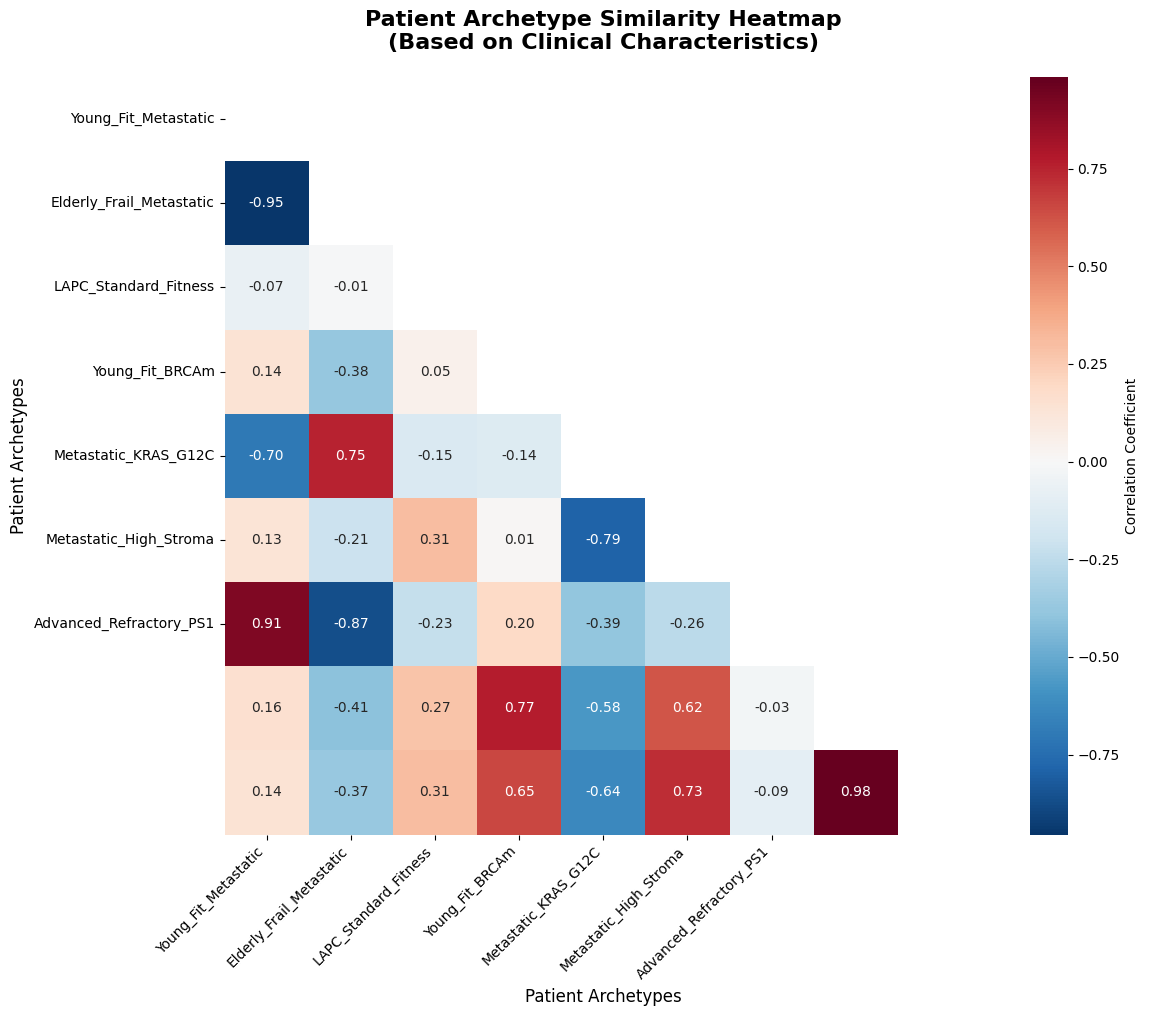

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create the dataset
data = {
    'Archetype_ID': ['ARCH-01', 'ARCH-02', 'ARCH-03', 'ARCH-04', 'ARCH-05', 'ARCH-06', 'ARCH-07'],
    'Archetype_Name': ['Young_Fit_Metastatic', 'Elderly_Frail_Metastatic', 'LAPC_Standard_Fitness',
                       'Young_Fit_BRCAm', 'Metastatic_KRAS_G12C', 'Metastatic_High_Stroma', 'Advanced_Refractory_PS1'],
    'Age_Mean': [61, 76, 64, 60, 64, 65, 66],
    'Age_SD': [9.8, 5.2, 10.1, 10.5, 8.5, 9.0, 8.0],
    'Male_Percent': [58, 51, 54, 45, 60, 55, 52],
    'Mets_Percent': [100, 100, 0, 90, 100, 100, 95],
    'ECOG_0_Percent': [45, 10, 30, 50, 20, 25, 0],
    'ECOG_1_Percent': [55, 60, 70, 50, 80, 75, 100],
    'ECOG_2_Percent': [0, 30, 0, 0, 0, 0, 0],
    'CA19_9_Mean': [5200, 4800, 1500, 3500, 6100, 5500, 7800],
    'CA19_9_SD': [4500, 4100, 2500, 3200, 5000, 4800, 6500]
}

df = pd.DataFrame(data)

# Select numerical columns for correlation
numerical_cols = ['Age_Mean', 'Age_SD', 'Male_Percent', 'Mets_Percent',
                  'ECOG_0_Percent', 'ECOG_1_Percent', 'ECOG_2_Percent',
                  'CA19_9_Mean', 'CA19_9_SD']

correlation_data = df[numerical_cols].T
correlation_matrix = np.corrcoef(correlation_data)

# Create heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,
            xticklabels=df['Archetype_Name'],
            yticklabels=df['Archetype_Name'],
            annot=True,
            cmap='RdBu_r',
            center=0,
            mask=mask,
            square=True,
            fmt='.2f',
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Patient Archetype Similarity Heatmap\n(Based on Clinical Characteristics)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Patient Archetypes', fontsize=12)
plt.ylabel('Patient Archetypes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

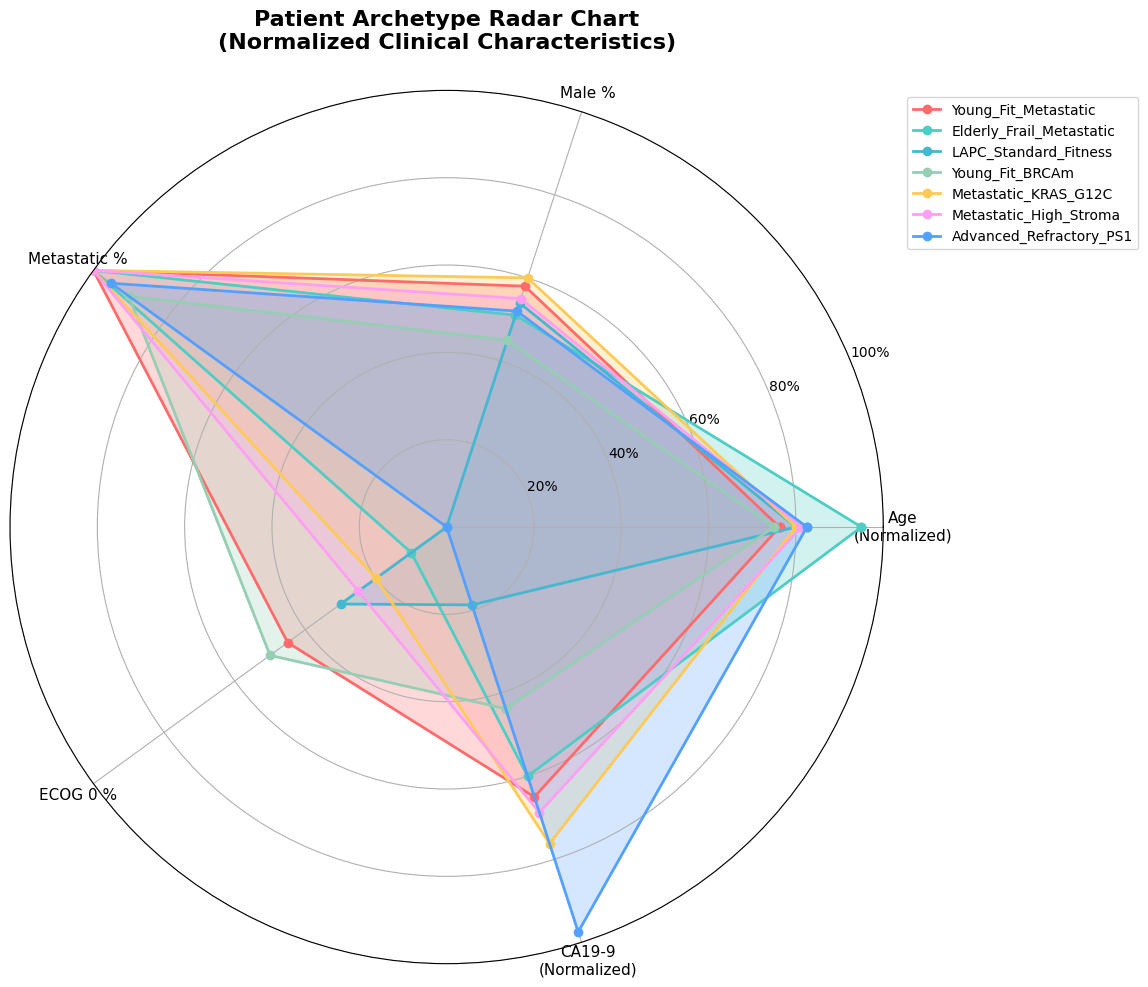

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# Prepare data for radar chart
archetypes_data = {
    'Young_Fit_Metastatic': [61/80, 58/100, 100/100, 45/100, 5200/8000],
    'Elderly_Frail_Metastatic': [76/80, 51/100, 100/100, 10/100, 4800/8000],
    'LAPC_Standard_Fitness': [64/80, 54/100, 0/100, 30/100, 1500/8000],
    'Young_Fit_BRCAm': [60/80, 45/100, 90/100, 50/100, 3500/8000],
    'Metastatic_KRAS_G12C': [64/80, 60/100, 100/100, 20/100, 6100/8000],
    'Metastatic_High_Stroma': [65/80, 55/100, 100/100, 25/100, 5500/8000],
    'Advanced_Refractory_PS1': [66/80, 52/100, 95/100, 0/100, 7800/8000]
}

# Categories
categories = ['Age\n(Normalized)', 'Male %', 'Metastatic %', 'ECOG 0 %', 'CA19-9\n(Normalized)']

# Number of variables
N = len(categories)

# Compute angle for each axis
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Complete the circle

# Create the plot
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(projection='polar'))

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3', '#54A0FF']

for i, (archetype, values) in enumerate(archetypes_data.items()):
    values += values[:1]  # Complete the circle
    ax.plot(angles, values, 'o-', linewidth=2, label=archetype, color=colors[i])
    ax.fill(angles, values, alpha=0.25, color=colors[i])

# Customize the plot
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=11)
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'], fontsize=10)
ax.grid(True)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize=10)
plt.title('Patient Archetype Radar Chart\n(Normalized Clinical Characteristics)',
          size=16, fontweight='bold', pad=30)
plt.tight_layout()
plt.show()

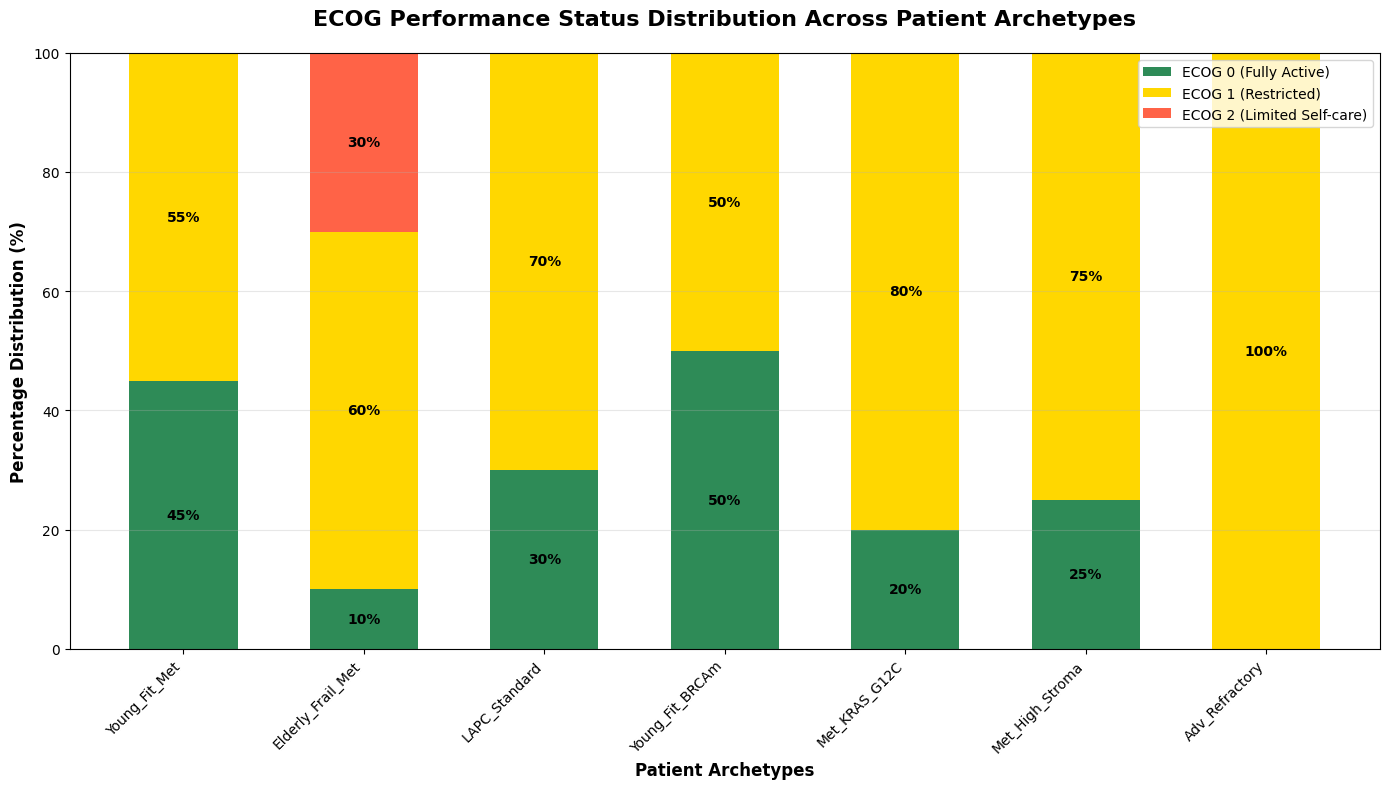

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# ECOG Performance Status data
archetypes = ['Young_Fit_Met', 'Elderly_Frail_Met', 'LAPC_Standard',
              'Young_Fit_BRCAm', 'Met_KRAS_G12C', 'Met_High_Stroma', 'Adv_Refractory']
ecog_0 = [45, 10, 30, 50, 20, 25, 0]
ecog_1 = [55, 60, 70, 50, 80, 75, 100]
ecog_2 = [0, 30, 0, 0, 0, 0, 0]

# Create the stacked bar chart
x = np.arange(len(archetypes))
width = 0.6

fig, ax = plt.subplots(figsize=(14, 8))

p1 = ax.bar(x, ecog_0, width, label='ECOG 0 (Fully Active)', color='#2E8B57')
p2 = ax.bar(x, ecog_1, width, bottom=ecog_0, label='ECOG 1 (Restricted)', color='#FFD700')
p3 = ax.bar(x, ecog_2, width, bottom=np.array(ecog_0) + np.array(ecog_1),
            label='ECOG 2 (Limited Self-care)', color='#FF6347')

# Customize the plot
ax.set_xlabel('Patient Archetypes', fontsize=12, fontweight='bold')
ax.set_ylabel('Percentage Distribution (%)', fontsize=12, fontweight='bold')
ax.set_title('ECOG Performance Status Distribution Across Patient Archetypes',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(archetypes, rotation=45, ha='right')
ax.legend(loc='upper right')
ax.set_ylim(0, 100)

# Add percentage labels on bars
for i, archetype in enumerate(archetypes):
    if ecog_0[i] > 0:
        ax.text(i, ecog_0[i]/2, f'{ecog_0[i]}%', ha='center', va='center', fontweight='bold')
    if ecog_1[i] > 0:
        ax.text(i, ecog_0[i] + ecog_1[i]/2, f'{ecog_1[i]}%', ha='center', va='center', fontweight='bold')
    if ecog_2[i] > 0:
        ax.text(i, ecog_0[i] + ecog_1[i] + ecog_2[i]/2, f'{ecog_2[i]}%', ha='center', va='center', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

<ipython-input-4-1609238179>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df_violin, x='Archetype', y='Age',


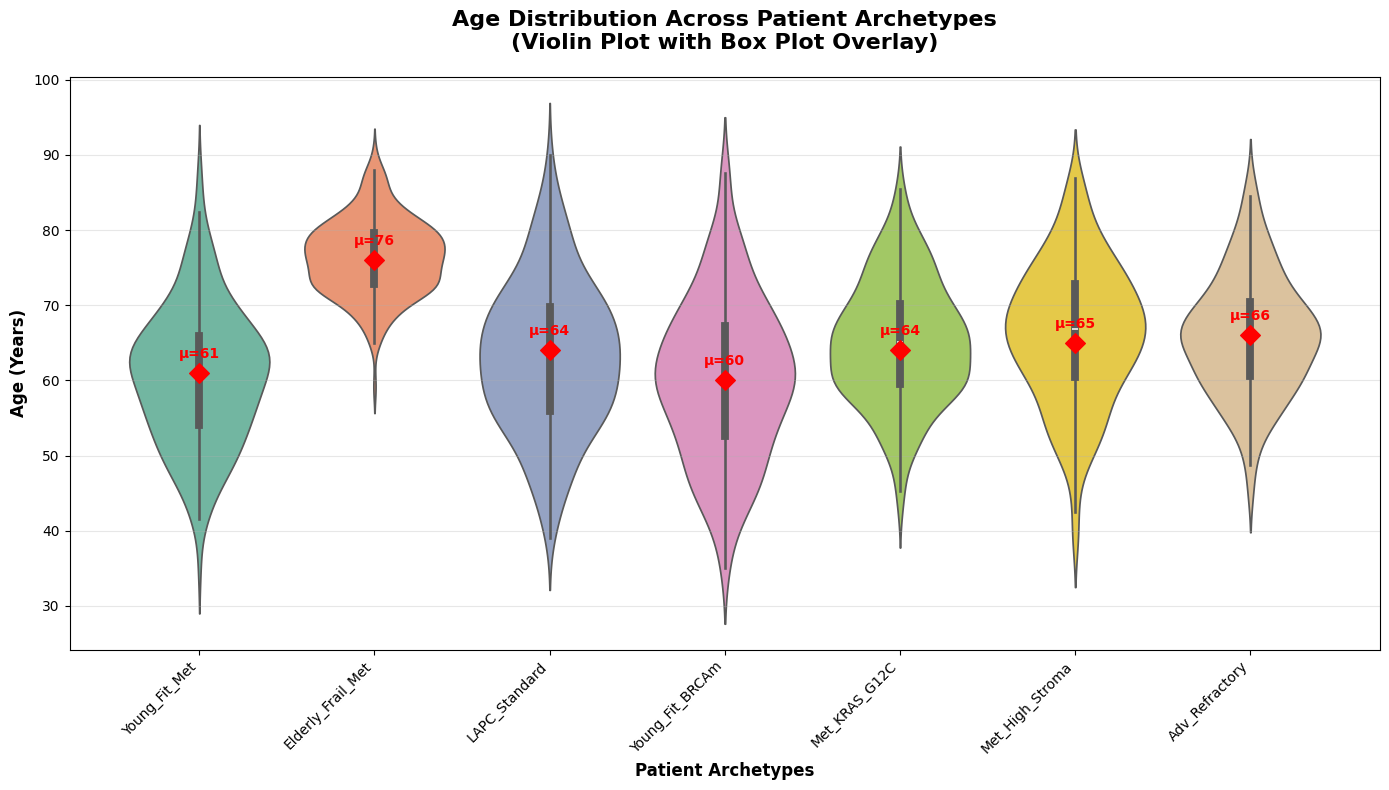

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Generate synthetic age data based on mean and SD for each archetype
np.random.seed(42)
age_data = []
archetype_labels = []

archetypes_info = [
    ('Young_Fit_Met', 61, 9.8),
    ('Elderly_Frail_Met', 76, 5.2),
    ('LAPC_Standard', 64, 10.1),
    ('Young_Fit_BRCAm', 60, 10.5),
    ('Met_KRAS_G12C', 64, 8.5),
    ('Met_High_Stroma', 65, 9.0),
    ('Adv_Refractory', 66, 8.0)
]

for name, mean, sd in archetypes_info:
    # Generate 200 synthetic patients per archetype
    ages = np.random.normal(mean, sd, 200)
    ages = np.clip(ages, 35, 90)  # Reasonable age bounds
    age_data.extend(ages)
    archetype_labels.extend([name] * 200)

# Create DataFrame
import pandas as pd
df_violin = pd.DataFrame({
    'Age': age_data,
    'Archetype': archetype_labels
})

# Create violin plot
plt.figure(figsize=(14, 8))
ax = sns.violinplot(data=df_violin, x='Archetype', y='Age',
                    palette='Set2', inner='box')

# Customize the plot
plt.xlabel('Patient Archetypes', fontsize=12, fontweight='bold')
plt.ylabel('Age (Years)', fontsize=12, fontweight='bold')
plt.title('Age Distribution Across Patient Archetypes\n(Violin Plot with Box Plot Overlay)',
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')

# Add mean markers
for i, (name, mean, sd) in enumerate(archetypes_info):
    plt.scatter(i, mean, color='red', s=100, zorder=5, marker='D')
    plt.text(i, mean + 2, f'μ={mean}', ha='center', fontweight='bold', color='red')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [5]:
import plotly.graph_objects as go
import plotly.offline as pyo

# Define the flow from genomic characteristics to archetypes
# Simplified genomic profile data
genomic_profiles = {
    'KRAS_G12D': ['Young_Fit_Met'],
    'KRAS_G12V': ['Young_Fit_Met'],
    'KRAS_G12C': ['Young_Fit_Met', 'Met_KRAS_G12C'],
    'gBRCA1/2m': ['Young_Fit_BRCAm'],
    'High_HA': ['Met_High_Stroma'],
    'Post_Chemo': ['Adv_Refractory'],
    'Unselected': ['Elderly_Frail_Met', 'LAPC_Standard']
}

# Create nodes
all_nodes = list(genomic_profiles.keys()) + [
    'Young_Fit_Met', 'Elderly_Frail_Met', 'LAPC_Standard',
    'Young_Fit_BRCAm', 'Met_KRAS_G12C', 'Met_High_Stroma', 'Adv_Refractory'
]

node_labels = all_nodes
node_colors = ['lightblue'] * len(genomic_profiles.keys()) + ['lightcoral'] * 7

# Create links
source_indices = []
target_indices = []
values = []

# Define connections and their weights
connections = [
    ('KRAS_G12D', 'Young_Fit_Met', 40),
    ('KRAS_G12V', 'Young_Fit_Met', 30),
    ('KRAS_G12C', 'Young_Fit_Met', 2),
    ('KRAS_G12C', 'Met_KRAS_G12C', 100),
    ('gBRCA1/2m', 'Young_Fit_BRCAm', 100),
    ('High_HA', 'Met_High_Stroma', 100),
    ('Post_Chemo', 'Adv_Refractory', 100),
    ('Unselected', 'Elderly_Frail_Met', 80),
    ('Unselected', 'LAPC_Standard', 80)
]

for source, target, value in connections:
    source_indices.append(all_nodes.index(source))
    target_indices.append(all_nodes.index(target))
    values.append(value)

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=node_labels,
        color=node_colors
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
        color='rgba(255, 0, 255, 0.4)'
    ))])

fig.update_layout(
    title_text="Genomic Profile to Patient Archetype Flow<br><sub>Sankey Diagram showing mutation patterns</sub>",
    font_size=12,
    width=1000,
    height=600
)

fig.show()

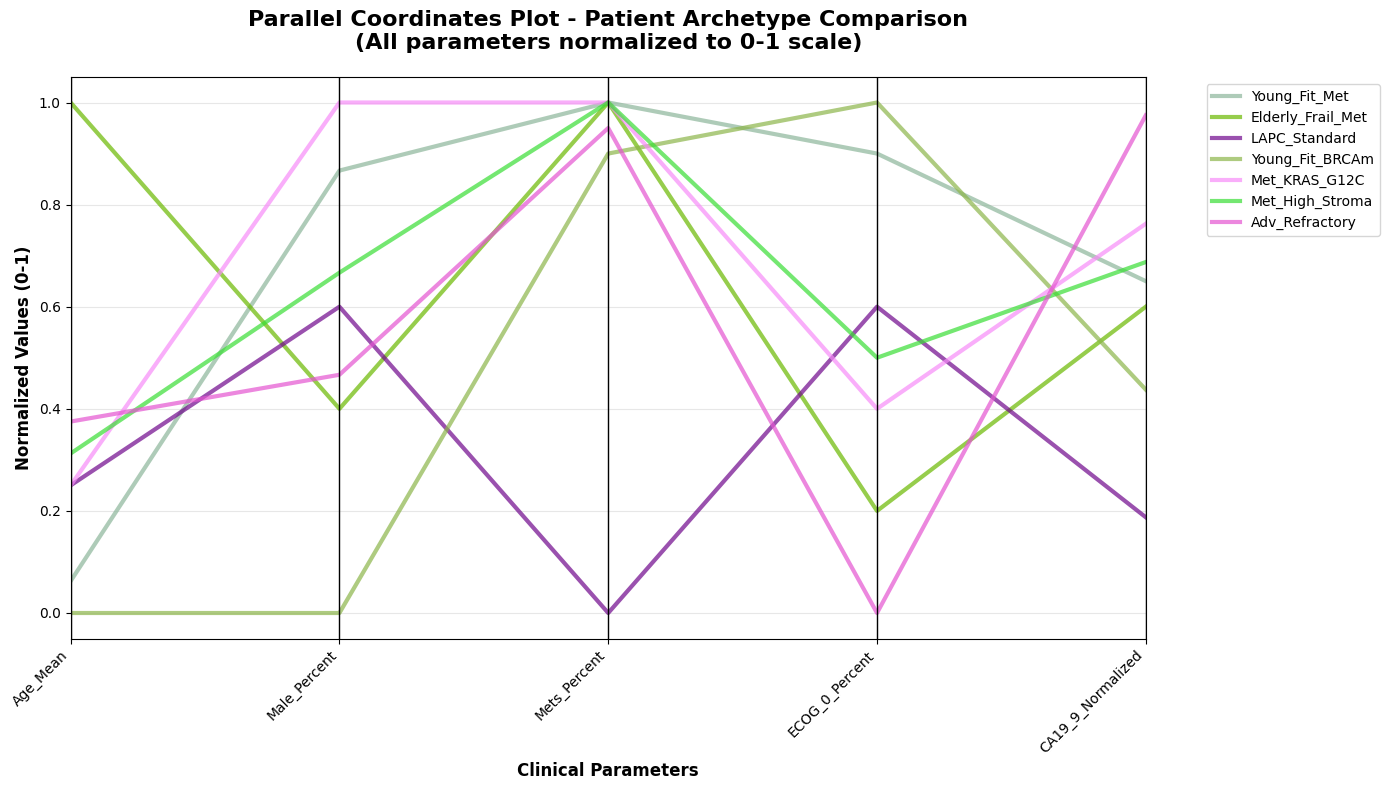

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import numpy as np

# Create comprehensive dataset
data_parallel = {
    'Archetype': ['Young_Fit_Met', 'Elderly_Frail_Met', 'LAPC_Standard',
                  'Young_Fit_BRCAm', 'Met_KRAS_G12C', 'Met_High_Stroma', 'Adv_Refractory'],
    'Age_Mean': [61, 76, 64, 60, 64, 65, 66],
    'Male_Percent': [58, 51, 54, 45, 60, 55, 52],
    'Mets_Percent': [100, 100, 0, 90, 100, 100, 95],
    'ECOG_0_Percent': [45, 10, 30, 50, 20, 25, 0],
    'CA19_9_Normalized': [5200/8000, 4800/8000, 1500/8000, 3500/8000, 6100/8000, 5500/8000, 7800/8000]
}

df_parallel = pd.DataFrame(data_parallel)

# Normalize all numerical columns to 0-1 scale for better visualization
numerical_cols = ['Age_Mean', 'Male_Percent', 'Mets_Percent', 'ECOG_0_Percent', 'CA19_9_Normalized']
for col in numerical_cols:
    if col != 'CA19_9_Normalized':  # Already normalized
        df_parallel[col] = (df_parallel[col] - df_parallel[col].min()) / (df_parallel[col].max() - df_parallel[col].min())

# Create parallel coordinates plot
plt.figure(figsize=(14, 8))
ax = parallel_coordinates(df_parallel, 'Archetype',
                         cols=['Age_Mean', 'Male_Percent', 'Mets_Percent', 'ECOG_0_Percent', 'CA19_9_Normalized'],
                         alpha=0.7, linewidth=3)

# Customize the plot
plt.xlabel('Clinical Parameters', fontsize=12, fontweight='bold')
plt.ylabel('Normalized Values (0-1)', fontsize=12, fontweight='bold')
plt.title('Parallel Coordinates Plot - Patient Archetype Comparison\n(All parameters normalized to 0-1 scale)',
          fontsize=16, fontweight='bold', pad=20)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

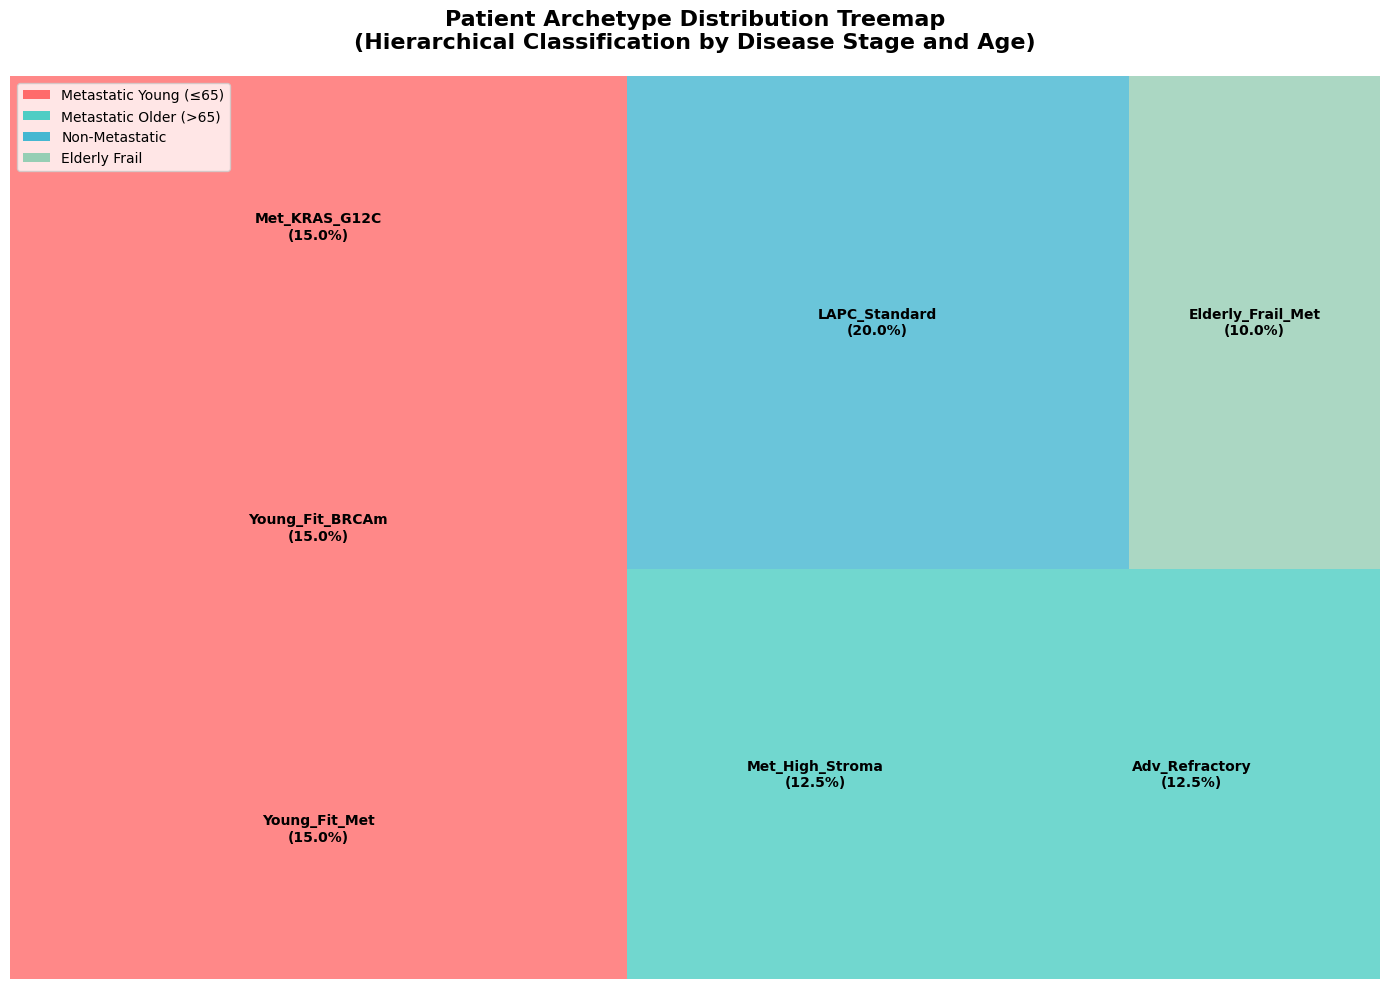

In [11]:
! pip install squarify

import matplotlib.pyplot as plt
import squarify

# Create hierarchical data for treemap
# Group by metastatic status and age groups
treemap_data = {
    'Metastatic Young (≤65)': ['Young_Fit_Met', 'Young_Fit_BRCAm', 'Met_KRAS_G12C'],
    'Metastatic Older (>65)': ['Met_High_Stroma', 'Adv_Refractory'],
    'Non-Metastatic': ['LAPC_Standard'],
    'Elderly Frail': ['Elderly_Frail_Met']
}

# Assign sizes based on relative prevalence (hypothetical)
sizes = []
labels = []
colors = []
color_map = {'Metastatic Young (≤65)': '#FF6B6B', 'Metastatic Older (>65)': '#4ECDC4',
             'Non-Metastatic': '#45B7D1', 'Elderly Frail': '#96CEB4'}

group_sizes = {'Metastatic Young (≤65)': 45, 'Metastatic Older (>65)': 25,
               'Non-Metastatic': 20, 'Elderly Frail': 10}

for group, archetypes in treemap_data.items():
    group_size = group_sizes[group]
    archetype_size = group_size / len(archetypes)

    for archetype in archetypes:
        sizes.append(archetype_size)
        labels.append(f'{archetype}\n({archetype_size:.1f}%)')
        colors.append(color_map[group])

# Create treemap
plt.figure(figsize=(14, 10))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8, text_kwargs={'fontsize': 10, 'weight': 'bold'})

plt.title('Patient Archetype Distribution Treemap\n(Hierarchical Classification by Disease Stage and Age)',
          fontsize=16, fontweight='bold', pad=20)
plt.axis('off')

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=group) for group, color in color_map.items()]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0, 1))

plt.tight_layout()
plt.show()

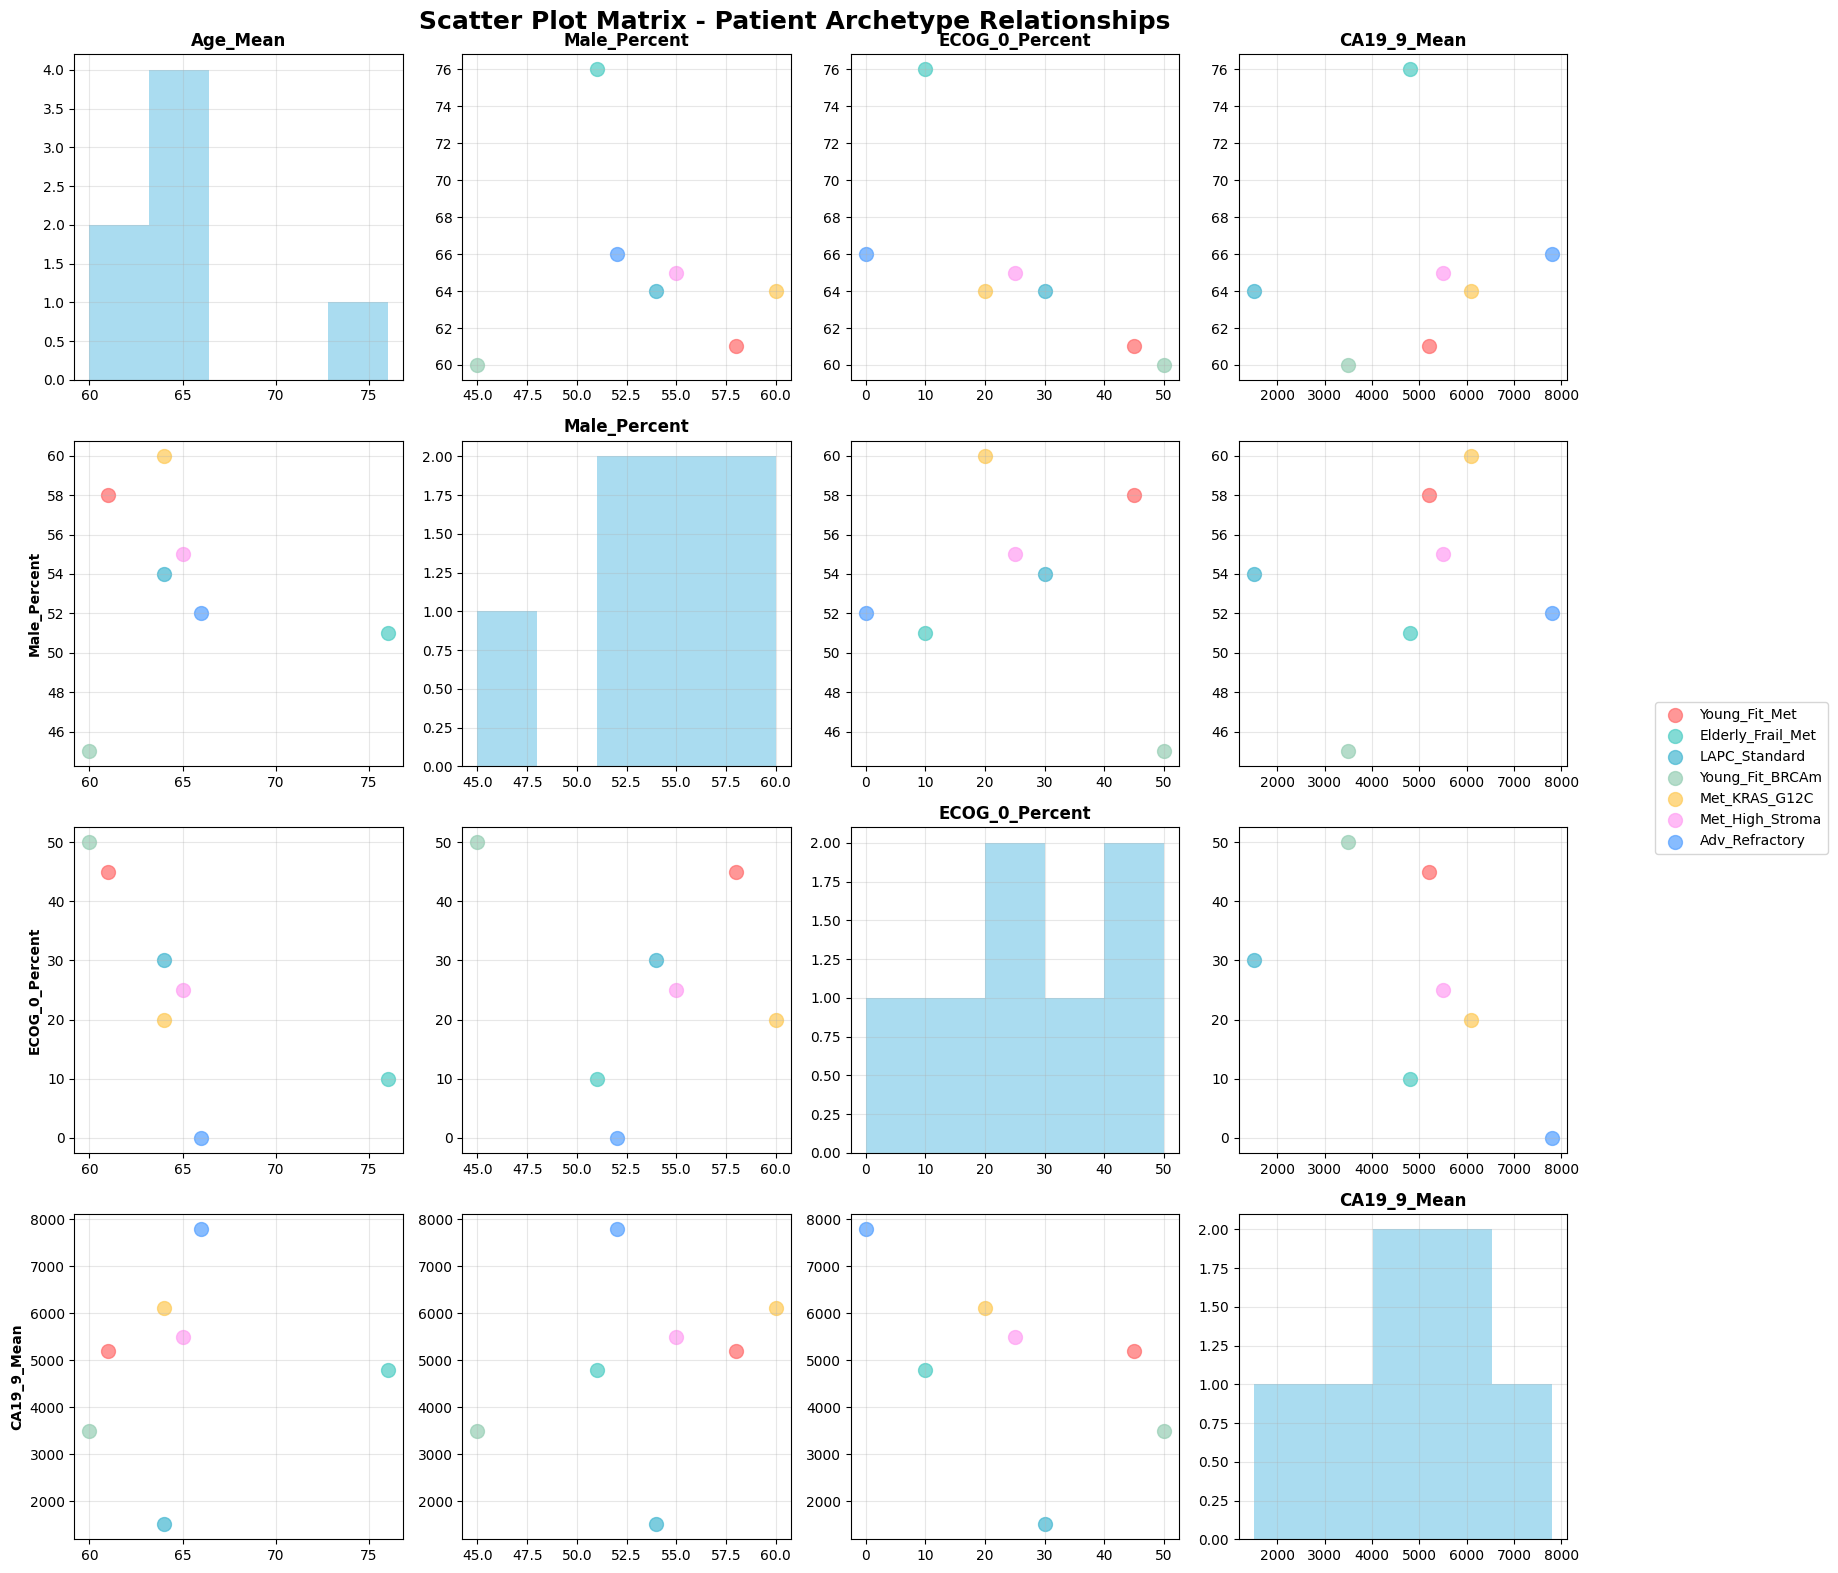

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create dataset for scatter plot matrix
data_scatter = {
    'Age_Mean': [61, 76, 64, 60, 64, 65, 66],
    'Male_Percent': [58, 51, 54, 45, 60, 55, 52],
    'ECOG_0_Percent': [45, 10, 30, 50, 20, 25, 0],
    'CA19_9_Mean': [5200, 4800, 1500, 3500, 6100, 5500, 7800],
    'Mets_Percent': [100, 100, 0, 90, 100, 100, 95],
    'Archetype': ['Young_Fit_Met', 'Elderly_Frail_Met', 'LAPC_Standard',
                  'Young_Fit_BRCAm', 'Met_KRAS_G12C', 'Met_High_Stroma', 'Adv_Refractory']
}

df_scatter = pd.DataFrame(data_scatter)

# Create scatter plot matrix
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
fig.suptitle('Scatter Plot Matrix - Patient Archetype Relationships', fontsize=18, fontweight='bold')

variables = ['Age_Mean', 'Male_Percent', 'ECOG_0_Percent', 'CA19_9_Mean']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3', '#54A0FF']

for i, var1 in enumerate(variables):
    for j, var2 in enumerate(variables):
        ax = axes[i, j]

        if i == j:
            # Diagonal: histogram
            ax.hist(df_scatter[var1], bins=5, alpha=0.7, color='skyblue')
            ax.set_title(f'{var1}', fontweight='bold')
        else:
            # Off-diagonal: scatter plot
            for k, archetype in enumerate(df_scatter['Archetype']):
                ax.scatter(df_scatter[var2].iloc[k], df_scatter[var1].iloc[k],
                          c=colors[k], s=100, alpha=0.7, label=archetype)

            if i == 0:
                ax.set_title(f'{var2}', fontweight='bold')
            if j == 0:
                ax.set_ylabel(f'{var1}', fontweight='bold')

        ax.grid(True, alpha=0.3)

# Add legend
handles, labels = axes[0, 1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.15, 0.5))

plt.tight_layout()
plt.show()

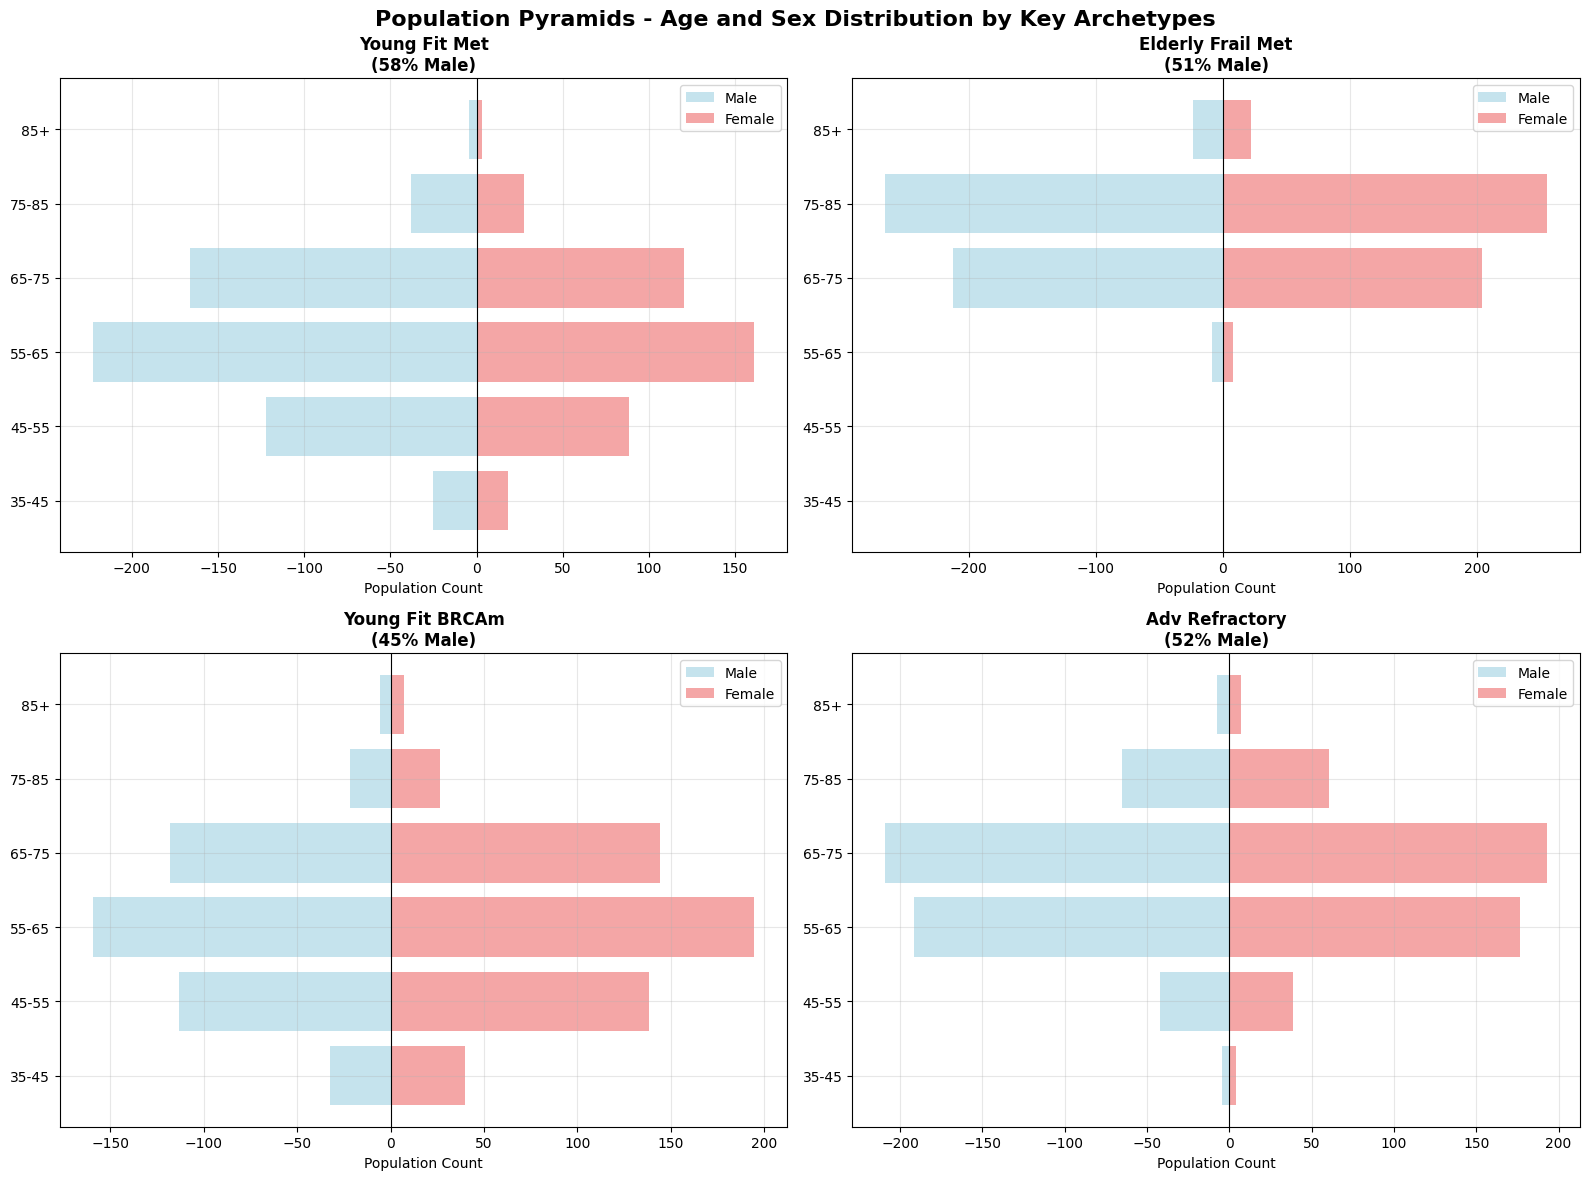

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Create age group data for population pyramid
age_groups = ['35-45', '45-55', '55-65', '65-75', '75-85', '85+']

# Calculate hypothetical age distribution for each archetype based on mean age
archetype_data = []
for name, mean_age, sd_age in [
    ('Young_Fit_Met', 61, 9.8),
    ('Elderly_Frail_Met', 76, 5.2),
    ('LAPC_Standard', 64, 10.1),
    ('Young_Fit_BRCAm', 60, 10.5),
    ('Met_KRAS_G12C', 64, 8.5),
    ('Met_High_Stroma', 65, 9.0),
    ('Adv_Refractory', 66, 8.0)
]:
    # Generate age distribution
    ages = np.random.normal(mean_age, sd_age, 1000)
    ages = np.clip(ages, 35, 90)

    # Categorize into age groups
    age_dist = {
        '35-45': np.sum((ages >= 35) & (ages < 45)),
        '45-55': np.sum((ages >= 45) & (ages < 55)),
        '55-65': np.sum((ages >= 55) & (ages < 65)),
        '65-75': np.sum((ages >= 65) & (ages < 75)),
        '75-85': np.sum((ages >= 75) & (ages < 85)),
        '85+': np.sum(ages >= 85)
    }

    archetype_data.append((name, age_dist))

# Create population pyramids for selected archetypes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Population Pyramids - Age and Sex Distribution by Key Archetypes',
             fontsize=16, fontweight='bold')

selected_archetypes = [
    ('Young_Fit_Met', 58),      # (name, male_percent)
    ('Elderly_Frail_Met', 51),
    ('Young_Fit_BRCAm', 45),
    ('Adv_Refractory', 52)
]

for idx, (archetype_name, male_percent) in enumerate(selected_archetypes):
    row, col = idx // 2, idx % 2
    ax = axes[row, col]

    # Find matching archetype data
    archetype_age_dist = None
    for name, age_dist in archetype_data:
        if name == archetype_name:
            archetype_age_dist = age_dist
            break

    if archetype_age_dist:
        # Calculate male and female distributions
        male_counts = [count * male_percent / 100 for count in archetype_age_dist.values()]
        female_counts = [count * (100 - male_percent) / 100 for count in archetype_age_dist.values()]

        # Create horizontal bar chart
        y_pos = np.arange(len(age_groups))

        ax.barh(y_pos, [-count for count in male_counts], align='center',
                color='lightblue', alpha=0.7, label='Male')
        ax.barh(y_pos, female_counts, align='center',
                color='lightcoral', alpha=0.7, label='Female')

        ax.set_yticks(y_pos)
        ax.set_yticklabels(age_groups)
        ax.set_xlabel('Population Count')
        ax.set_title(f'{archetype_name.replace("_", " ")}\n({male_percent}% Male)', fontweight='bold')
        ax.legend()
        ax.grid(True, alpha=0.3)

        # Add vertical line at x=0
        ax.axvline(x=0, color='black', linewidth=0.8)

plt.tight_layout()
plt.show()

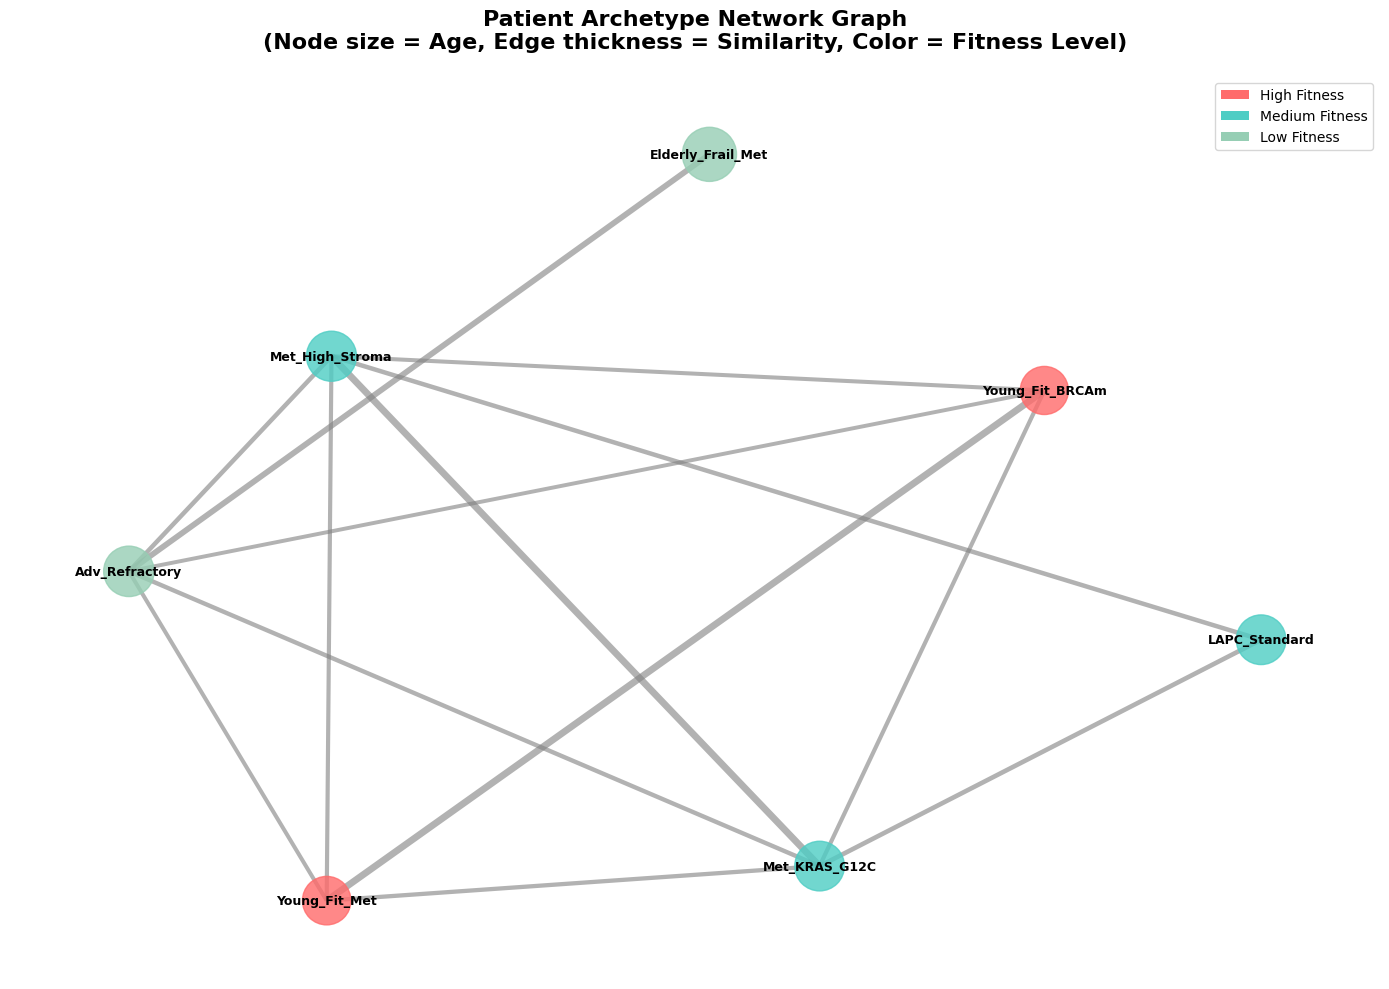

Network Statistics:
Number of nodes: 7
Number of edges: 13
Average clustering coefficient: 0.714
Network density: 0.619


In [10]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Create network graph showing relationships between archetypes
G = nx.Graph()

# Add nodes (archetypes)
archetypes = {
    'Young_Fit_Met': {'age': 61, 'stage': 'Met', 'fitness': 'High'},
    'Elderly_Frail_Met': {'age': 76, 'stage': 'Met', 'fitness': 'Low'},
    'LAPC_Standard': {'age': 64, 'stage': 'LAPC', 'fitness': 'Medium'},
    'Young_Fit_BRCAm': {'age': 60, 'stage': 'Met', 'fitness': 'High'},
    'Met_KRAS_G12C': {'age': 64, 'stage': 'Met', 'fitness': 'Medium'},
    'Met_High_Stroma': {'age': 65, 'stage': 'Met', 'fitness': 'Medium'},
    'Adv_Refractory': {'age': 66, 'stage': 'Met', 'fitness': 'Low'}
}

# Add nodes to graph
for archetype, attributes in archetypes.items():
    G.add_node(archetype, **attributes)

# Add edges based on similarity (age difference < 10 years OR same stage OR same fitness level)
for arch1, attr1 in archetypes.items():
    for arch2, attr2 in archetypes.items():
        if arch1 != arch2:
            # Calculate similarity score
            age_similarity = 1 - abs(attr1['age'] - attr2['age']) / 20  # Normalize by max age difference
            stage_similarity = 1 if attr1['stage'] == attr2['stage'] else 0
            fitness_similarity = 1 if attr1['fitness'] == attr2['fitness'] else 0

            # Combined similarity
            total_similarity = (age_similarity + stage_similarity + fitness_similarity) / 3

            if total_similarity > 0.5:  # Threshold for creating edge
                G.add_edge(arch1, arch2, weight=total_similarity)

# Create the plot
plt.figure(figsize=(14, 10))

# Set up node positions using spring layout
pos = nx.spring_layout(G, k=3, iterations=50)

# Node colors based on fitness level
node_colors = []
fitness_color_map = {'High': '#FF6B6B', 'Medium': '#4ECDC4', 'Low': '#96CEB4'}
for node in G.nodes():
    node_colors.append(fitness_color_map[archetypes[node]['fitness']])

# Node sizes based on age (older = larger)
node_sizes = [archetypes[node]['age'] * 20 for node in G.nodes()]

# Draw the network
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.8)
nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold')

# Draw edges with thickness based on similarity
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]
nx.draw_networkx_edges(G, pos, width=[w*5 for w in weights], alpha=0.6, edge_color='gray')

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#FF6B6B', label='High Fitness'),
    Patch(facecolor='#4ECDC4', label='Medium Fitness'),
    Patch(facecolor='#96CEB4', label='Low Fitness')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.title('Patient Archetype Network Graph\n(Node size = Age, Edge thickness = Similarity, Color = Fitness Level)',
          fontsize=16, fontweight='bold', pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

# Print network statistics
print("Network Statistics:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Average clustering coefficient: {nx.average_clustering(G):.3f}")
print(f"Network density: {nx.density(G):.3f}")

# Report 06 Table 2

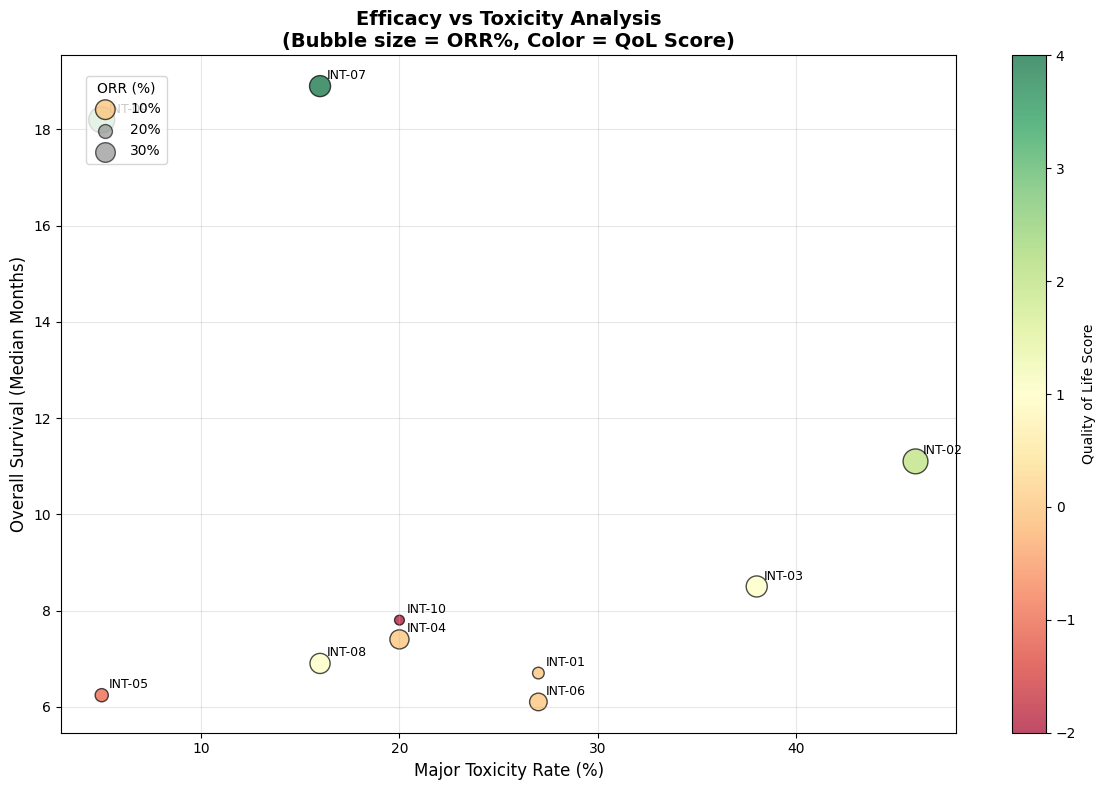

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data preparation
data = {
    'Intervention_ID': ['INT-01', 'INT-02', 'INT-03', 'INT-04', 'INT-05', 'INT-06', 'INT-07', 'INT-08', 'INT-09', 'INT-10'],
    'Regimen_Name': ['Gemcitabine Monotherapy', 'FOLFIRINOX', 'Gemcitabine + nab-Paclitaxel', 'Gemcitabine + Capecitabine',
                     'Gemcitabine + Erlotinib', 'nal-IRI + 5-FU/LV (2L)', 'Olaparib (Maintenance, gBRCAm)',
                     'Sotorasib (KRAS G12C)', 'SBRT + Chemo (Oligometastatic)', 'FAK Inhibitor Combo (Defactinib)'],
    'OS_Rate': [0.103, 0.062, 0.082, 0.094, 0.111, 0.114, 0.037, 0.100, 0.038, 0.089],
    'OS_Median': [6.7, 11.1, 8.5, 7.4, 6.24, 6.1, 18.9, 6.9, 18.2, 7.8],
    'ORR': [7, 32, 23, 19, 9, 16, 23, 21, 35, 5],
    'QoL_Score': [0, 2, 1, 0, -1, 0, 4, 1, 3, -2],
    'Major_Toxicity': [27, 46, 38, 20, 5, 27, 16, 16, 5, 20]  # Highest toxicity percentage for each
}

df = pd.DataFrame(data)

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Major_Toxicity'], df['OS_Median'],
                     s=df['ORR']*10, c=df['QoL_Score'],
                     cmap='RdYlGn', alpha=0.7, edgecolors='black')

# Add labels for each point
for i, txt in enumerate(df['Intervention_ID']):
    plt.annotate(txt, (df['Major_Toxicity'][i], df['OS_Median'][i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.xlabel('Major Toxicity Rate (%)', fontsize=12)
plt.ylabel('Overall Survival (Median Months)', fontsize=12)
plt.title('Efficacy vs Toxicity Analysis\n(Bubble size = ORR%, Color = QoL Score)', fontsize=14, fontweight='bold')

# Add colorbar for QoL Score
cbar = plt.colorbar(scatter)
cbar.set_label('Quality of Life Score', fontsize=10)

# Add legend for bubble size
bubble_sizes = [10, 20, 30]
bubble_labels = ['10%', '20%', '30%']
for size, label in zip(bubble_sizes, bubble_labels):
    plt.scatter([], [], s=size*10, c='gray', alpha=0.6, edgecolors='black')
plt.legend(bubble_labels, title='ORR (%)', loc='upper left', bbox_to_anchor=(0.02, 0.98))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

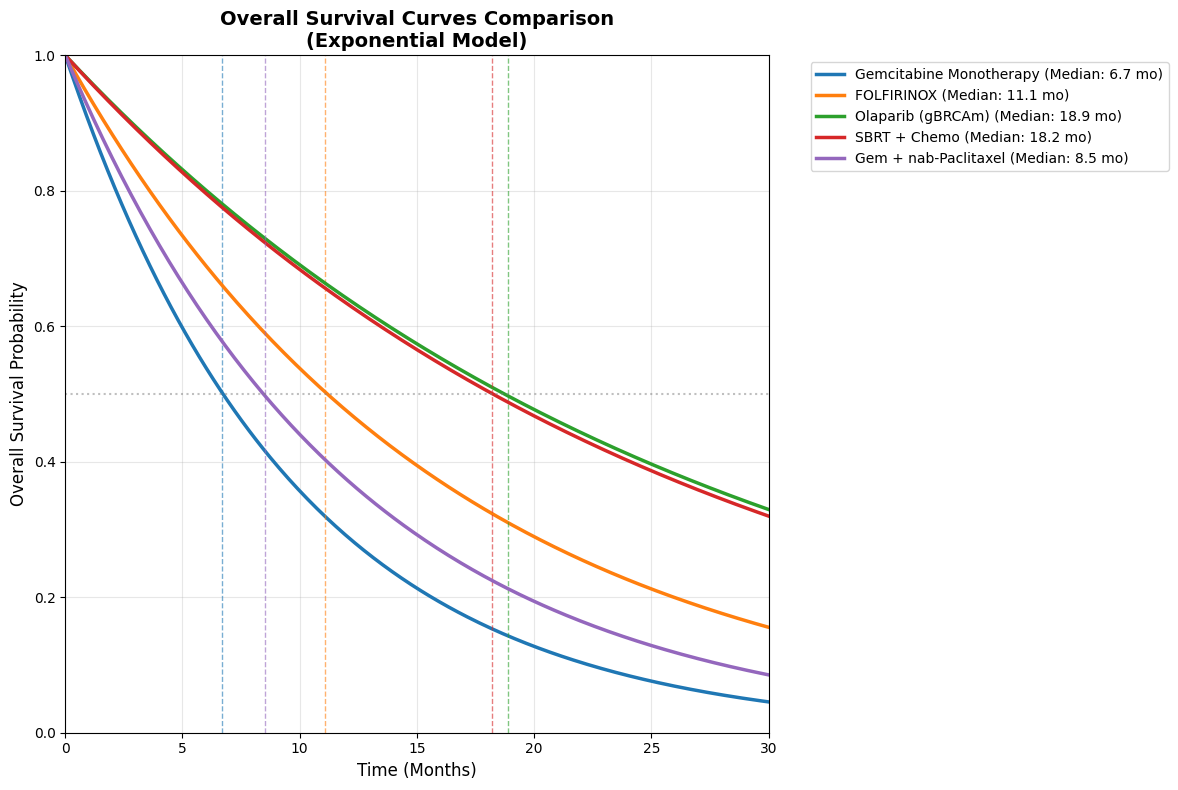

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
treatments = {
    'Gemcitabine Monotherapy': {'rate': 0.103, 'median': 6.7, 'color': '#1f77b4'},
    'FOLFIRINOX': {'rate': 0.062, 'median': 11.1, 'color': '#ff7f0e'},
    'Olaparib (gBRCAm)': {'rate': 0.037, 'median': 18.9, 'color': '#2ca02c'},
    'SBRT + Chemo': {'rate': 0.038, 'median': 18.2, 'color': '#d62728'},
    'Gem + nab-Paclitaxel': {'rate': 0.082, 'median': 8.5, 'color': '#9467bd'}
}

# Generate survival curves
time_points = np.linspace(0, 30, 300)

plt.figure(figsize=(12, 8))

for treatment, params in treatments.items():
    # Exponential survival function: S(t) = exp(-rate * t)
    survival_prob = np.exp(-params['rate'] * time_points)
    plt.plot(time_points, survival_prob,
             label=f"{treatment} (Median: {params['median']} mo)",
             color=params['color'], linewidth=2.5)

    # Add median survival line
    median_time = params['median']
    if median_time <= 30:
        plt.axvline(x=median_time, color=params['color'],
                   linestyle='--', alpha=0.6, linewidth=1)

plt.xlabel('Time (Months)', fontsize=12)
plt.ylabel('Overall Survival Probability', fontsize=12)
plt.title('Overall Survival Curves Comparison\n(Exponential Model)', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xlim(0, 30)
plt.ylim(0, 1)

# Add median survival reference line
plt.axhline(y=0.5, color='gray', linestyle=':', alpha=0.5, label='50% Survival')

plt.tight_layout()
plt.show()

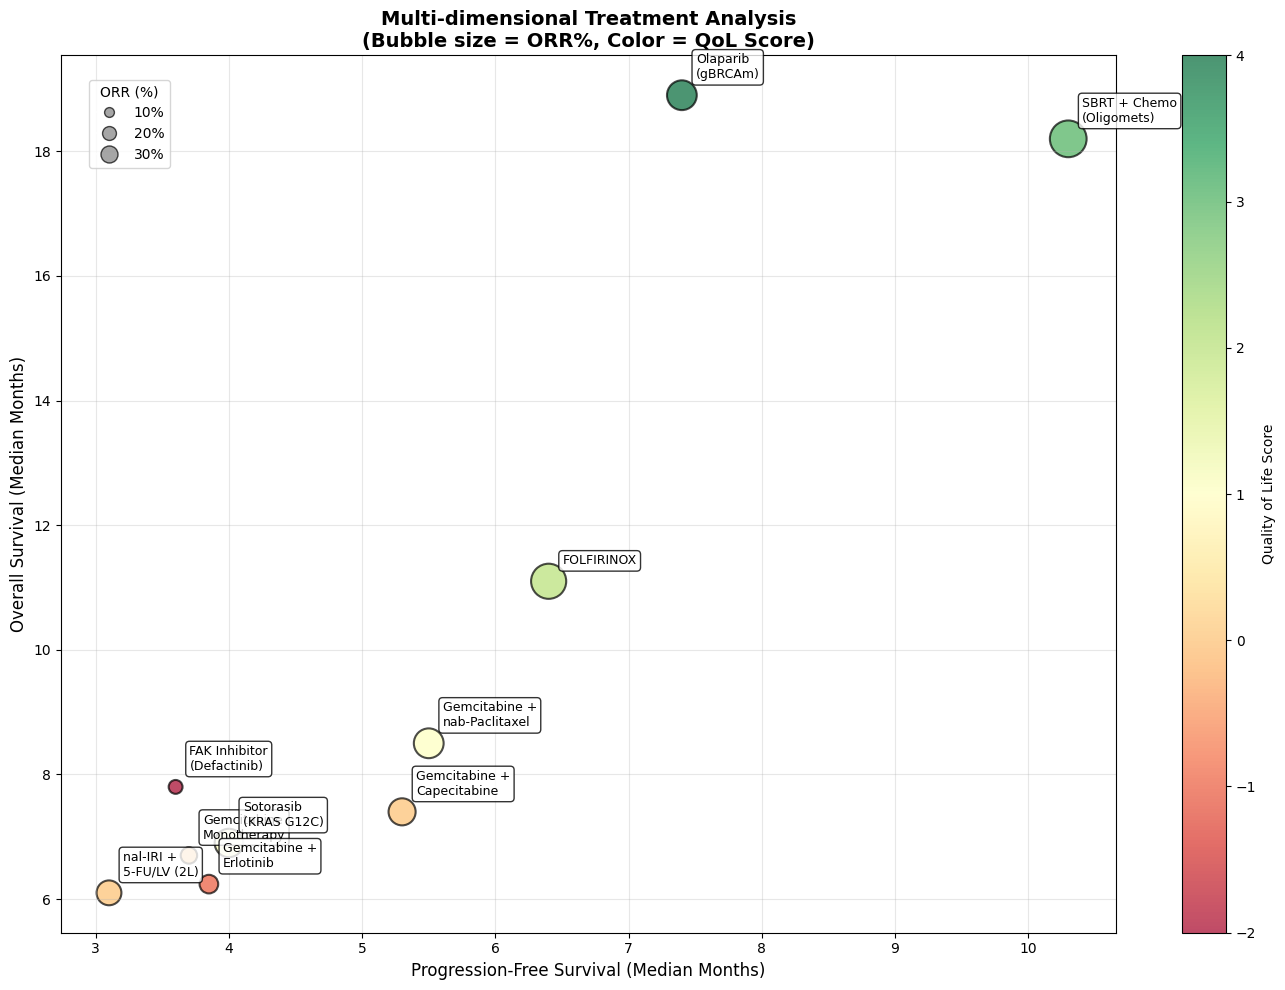

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Complete dataset
data = {
    'Intervention_ID': ['INT-01', 'INT-02', 'INT-03', 'INT-04', 'INT-05', 'INT-06', 'INT-07', 'INT-08', 'INT-09', 'INT-10'],
    'Regimen_Name': ['Gemcitabine\nMonotherapy', 'FOLFIRINOX', 'Gemcitabine +\nnab-Paclitaxel', 'Gemcitabine +\nCapecitabine',
                     'Gemcitabine +\nErlotinib', 'nal-IRI +\n5-FU/LV (2L)', 'Olaparib\n(gBRCAm)',
                     'Sotorasib\n(KRAS G12C)', 'SBRT + Chemo\n(Oligomets)', 'FAK Inhibitor\n(Defactinib)'],
    'PFS_Median': [3.7, 6.4, 5.5, 5.3, 3.85, 3.1, 7.4, 4.0, 10.3, 3.6],
    'OS_Median': [6.7, 11.1, 8.5, 7.4, 6.24, 6.1, 18.9, 6.9, 18.2, 7.8],
    'ORR': [7, 32, 23, 19, 9, 16, 23, 21, 35, 5],
    'QoL_Score': [0, 2, 1, 0, -1, 0, 4, 1, 3, -2],
    'Major_Toxicity': [27, 46, 38, 20, 5, 27, 16, 16, 5, 20]
}

df = pd.DataFrame(data)

# Create the bubble chart
fig, ax = plt.subplots(figsize=(14, 10))

# Create bubbles
scatter = ax.scatter(df['PFS_Median'], df['OS_Median'],
                    s=df['ORR']*20, c=df['QoL_Score'],
                    cmap='RdYlGn', alpha=0.7, edgecolors='black', linewidth=1.5)

# Add treatment labels
for i, (x, y, label) in enumerate(zip(df['PFS_Median'], df['OS_Median'], df['Regimen_Name'])):
    ax.annotate(label, (x, y), xytext=(10, 10), textcoords='offset points',
                fontsize=9, ha='left', va='bottom',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

ax.set_xlabel('Progression-Free Survival (Median Months)', fontsize=12)
ax.set_ylabel('Overall Survival (Median Months)', fontsize=12)
ax.set_title('Multi-dimensional Treatment Analysis\n(Bubble size = ORR%, Color = QoL Score)',
             fontsize=14, fontweight='bold')

# Colorbar for QoL Score
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Quality of Life Score', fontsize=10)

# Legend for bubble sizes
legend_sizes = [10, 20, 30]
legend_labels = ['10%', '20%', '30%']
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray',
                             markersize=np.sqrt(size*20)/2, alpha=0.7, markeredgecolor='black')
                  for size in legend_sizes]
ax.legend(legend_elements, legend_labels, title='ORR (%)',
         loc='upper left', bbox_to_anchor=(0.02, 0.98))

ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

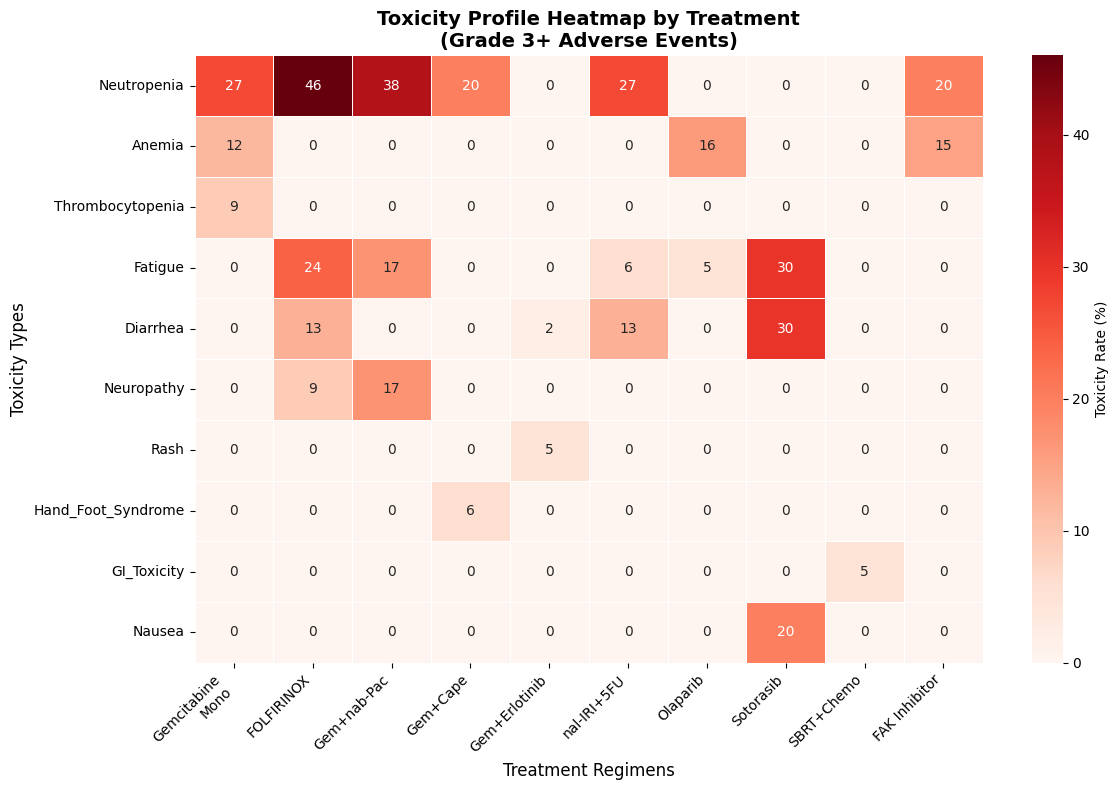

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract toxicity data
toxicity_data = {
    'Intervention_ID': ['INT-01', 'INT-02', 'INT-03', 'INT-04', 'INT-05', 'INT-06', 'INT-07', 'INT-08', 'INT-09', 'INT-10'],
    'Treatment': ['Gemcitabine\nMono', 'FOLFIRINOX', 'Gem+nab-Pac', 'Gem+Cape', 'Gem+Erlotinib',
                  'nal-IRI+5FU', 'Olaparib', 'Sotorasib', 'SBRT+Chemo', 'FAK Inhibitor'],
    'Neutropenia': [27, 46, 38, 20, 0, 27, 0, 0, 0, 20],
    'Anemia': [12, 0, 0, 0, 0, 0, 16, 0, 0, 15],
    'Thrombocytopenia': [9, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'Fatigue': [0, 24, 17, 0, 0, 6, 5, 30, 0, 0],
    'Diarrhea': [0, 13, 0, 0, 2, 13, 0, 30, 0, 0],
    'Neuropathy': [0, 9, 17, 0, 0, 0, 0, 0, 0, 0],
    'Rash': [0, 0, 0, 0, 5, 0, 0, 0, 0, 0],
    'Hand_Foot_Syndrome': [0, 0, 0, 6, 0, 0, 0, 0, 0, 0],
    'GI_Toxicity': [0, 0, 0, 0, 0, 0, 0, 0, 5, 0],
    'Nausea': [0, 0, 0, 0, 0, 0, 0, 20, 0, 0]
}

df = pd.DataFrame(toxicity_data)
df_heatmap = df.set_index('Treatment')
df_heatmap = df_heatmap.drop('Intervention_ID', axis=1)

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_heatmap.T, annot=True, cmap='Reds', fmt='g',
            cbar_kws={'label': 'Toxicity Rate (%)'},
            linewidths=0.5, linecolor='white')

plt.title('Toxicity Profile Heatmap by Treatment\n(Grade 3+ Adverse Events)',
          fontsize=14, fontweight='bold')
plt.xlabel('Treatment Regimens', fontsize=12)
plt.ylabel('Toxicity Types', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

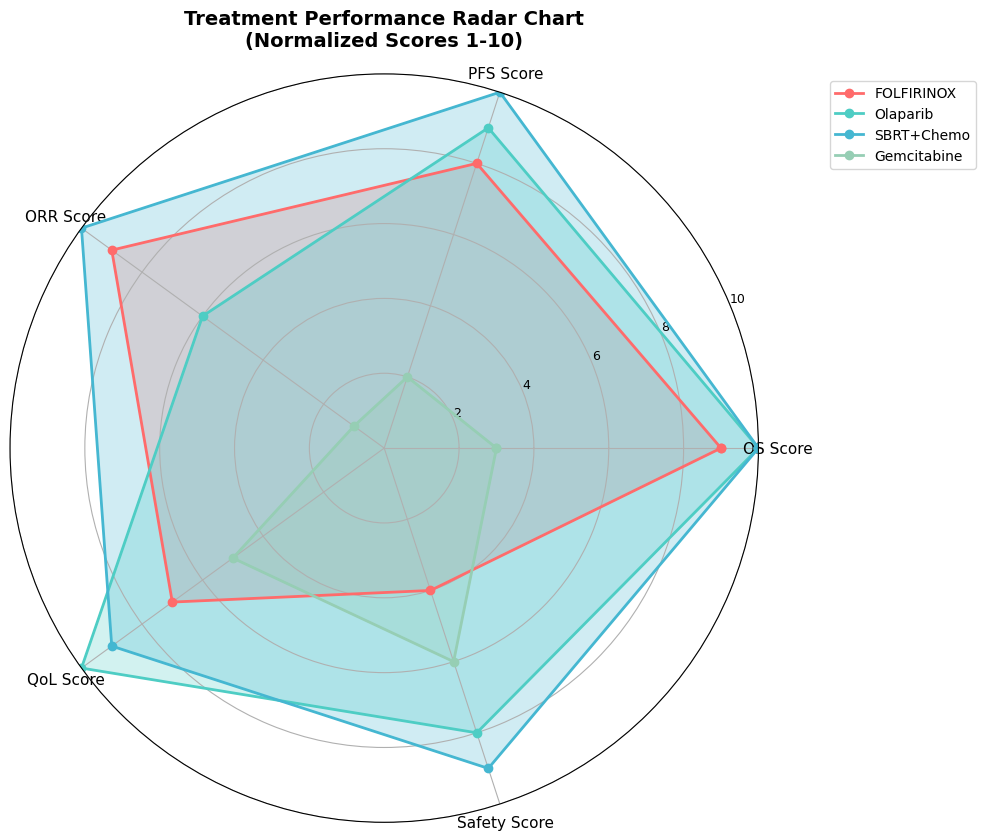

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# Select key treatments for radar chart
treatments_data = {
    'FOLFIRINOX': {'OS_Score': 9, 'PFS_Score': 8, 'ORR_Score': 9, 'QoL_Score': 7, 'Safety_Score': 4},
    'Olaparib': {'OS_Score': 10, 'PFS_Score': 9, 'ORR_Score': 6, 'QoL_Score': 10, 'Safety_Score': 8},
    'SBRT+Chemo': {'OS_Score': 10, 'PFS_Score': 10, 'ORR_Score': 10, 'QoL_Score': 9, 'Safety_Score': 9},
    'Gemcitabine': {'OS_Score': 3, 'PFS_Score': 2, 'ORR_Score': 1, 'QoL_Score': 5, 'Safety_Score': 6}
}

# Categories for radar chart
categories = ['OS Score', 'PFS Score', 'ORR Score', 'QoL Score', 'Safety Score']
N = len(categories)

# Create radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Angles for each category
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Complete the circle

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

for i, (treatment, scores) in enumerate(treatments_data.items()):
    values = list(scores.values())
    values += values[:1]  # Complete the circle

    ax.plot(angles, values, 'o-', linewidth=2, label=treatment, color=colors[i])
    ax.fill(angles, values, alpha=0.25, color=colors[i])

# Customize the chart
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=11)
ax.set_ylim(0, 10)
ax.set_yticks([2, 4, 6, 8, 10])
ax.set_yticklabels(['2', '4', '6', '8', '10'], fontsize=9)
ax.grid(True)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.title('Treatment Performance Radar Chart\n(Normalized Scores 1-10)',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

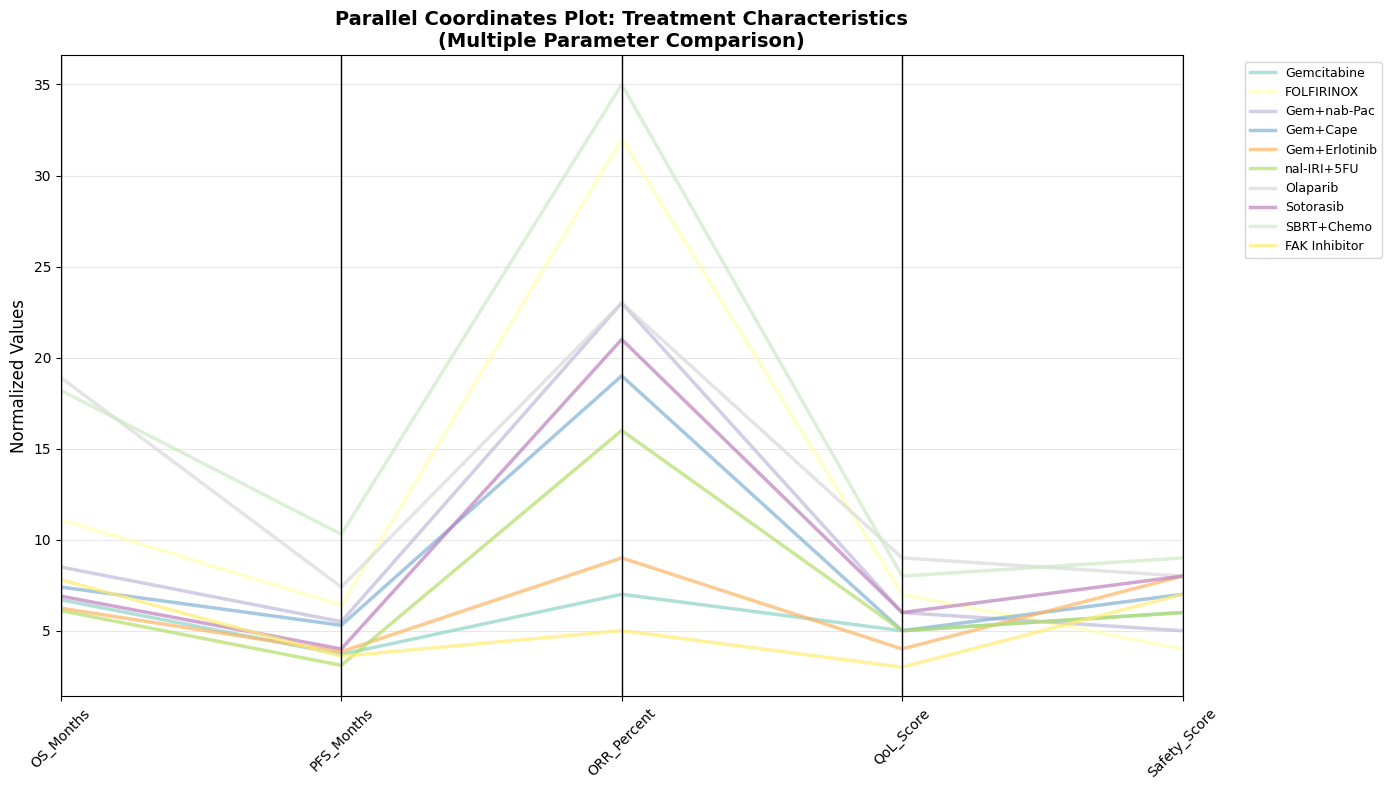

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import numpy as np

# Prepare data for parallel coordinates
data = {
    'Treatment': ['Gemcitabine', 'FOLFIRINOX', 'Gem+nab-Pac', 'Gem+Cape', 'Gem+Erlotinib',
                  'nal-IRI+5FU', 'Olaparib', 'Sotorasib', 'SBRT+Chemo', 'FAK Inhibitor'],
    'OS_Months': [6.7, 11.1, 8.5, 7.4, 6.24, 6.1, 18.9, 6.9, 18.2, 7.8],
    'PFS_Months': [3.7, 6.4, 5.5, 5.3, 3.85, 3.1, 7.4, 4.0, 10.3, 3.6],
    'ORR_Percent': [7, 32, 23, 19, 9, 16, 23, 21, 35, 5],
    'QoL_Score': [5, 7, 6, 5, 4, 5, 9, 6, 8, 3],  # Normalized to 1-10
    'Safety_Score': [6, 4, 5, 7, 8, 6, 8, 8, 9, 7]  # Inverse of toxicity, normalized
}

df = pd.DataFrame(data)

# Create parallel coordinates plot
plt.figure(figsize=(14, 8))

# Define colors for each treatment
colors = plt.cm.Set3(np.linspace(0, 1, len(df)))
treatment_colors = dict(zip(df['Treatment'], colors))

# Create the plot
parallel_coordinates(df, 'Treatment', colormap='Set3', alpha=0.7, linewidth=2.5)

plt.title('Parallel Coordinates Plot: Treatment Characteristics\n(Multiple Parameter Comparison)',
          fontsize=14, fontweight='bold')
plt.ylabel('Normalized Values', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()

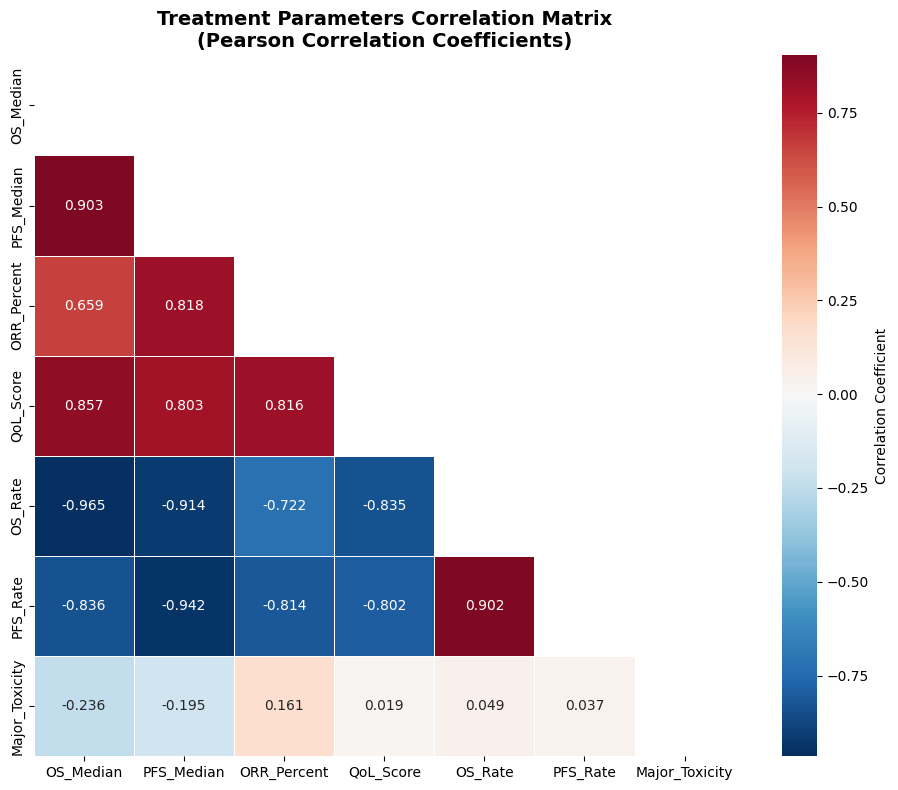

Strongest Positive Correlations:
OS_Median vs OS_Rate: -0.965
PFS_Median vs PFS_Rate: -0.942
PFS_Median vs OS_Rate: -0.914
OS_Median vs PFS_Median: 0.903
OS_Rate vs PFS_Rate: 0.902


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prepare numerical data for correlation analysis
data = {
    'OS_Median': [6.7, 11.1, 8.5, 7.4, 6.24, 6.1, 18.9, 6.9, 18.2, 7.8],
    'PFS_Median': [3.7, 6.4, 5.5, 5.3, 3.85, 3.1, 7.4, 4.0, 10.3, 3.6],
    'ORR_Percent': [7, 32, 23, 19, 9, 16, 23, 21, 35, 5],
    'QoL_Score': [0, 2, 1, 0, -1, 0, 4, 1, 3, -2],
    'OS_Rate': [0.103, 0.062, 0.082, 0.094, 0.111, 0.114, 0.037, 0.100, 0.038, 0.089],
    'PFS_Rate': [0.187, 0.108, 0.126, 0.131, 0.180, 0.224, 0.094, 0.173, 0.067, 0.192],
    'Major_Toxicity': [27, 46, 38, 20, 5, 27, 16, 16, 5, 20]
}

df = pd.DataFrame(data)

# Calculate correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.3f', linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'},
            mask=mask)

plt.title('Treatment Parameters Correlation Matrix\n(Pearson Correlation Coefficients)',
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print strongest correlations
print("Strongest Positive Correlations:")
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_pairs.append((correlation_matrix.columns[i],
                          correlation_matrix.columns[j],
                          correlation_matrix.iloc[i,j]))

corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
for pair in corr_pairs[:5]:
    print(f"{pair[0]} vs {pair[1]}: {pair[2]:.3f}")

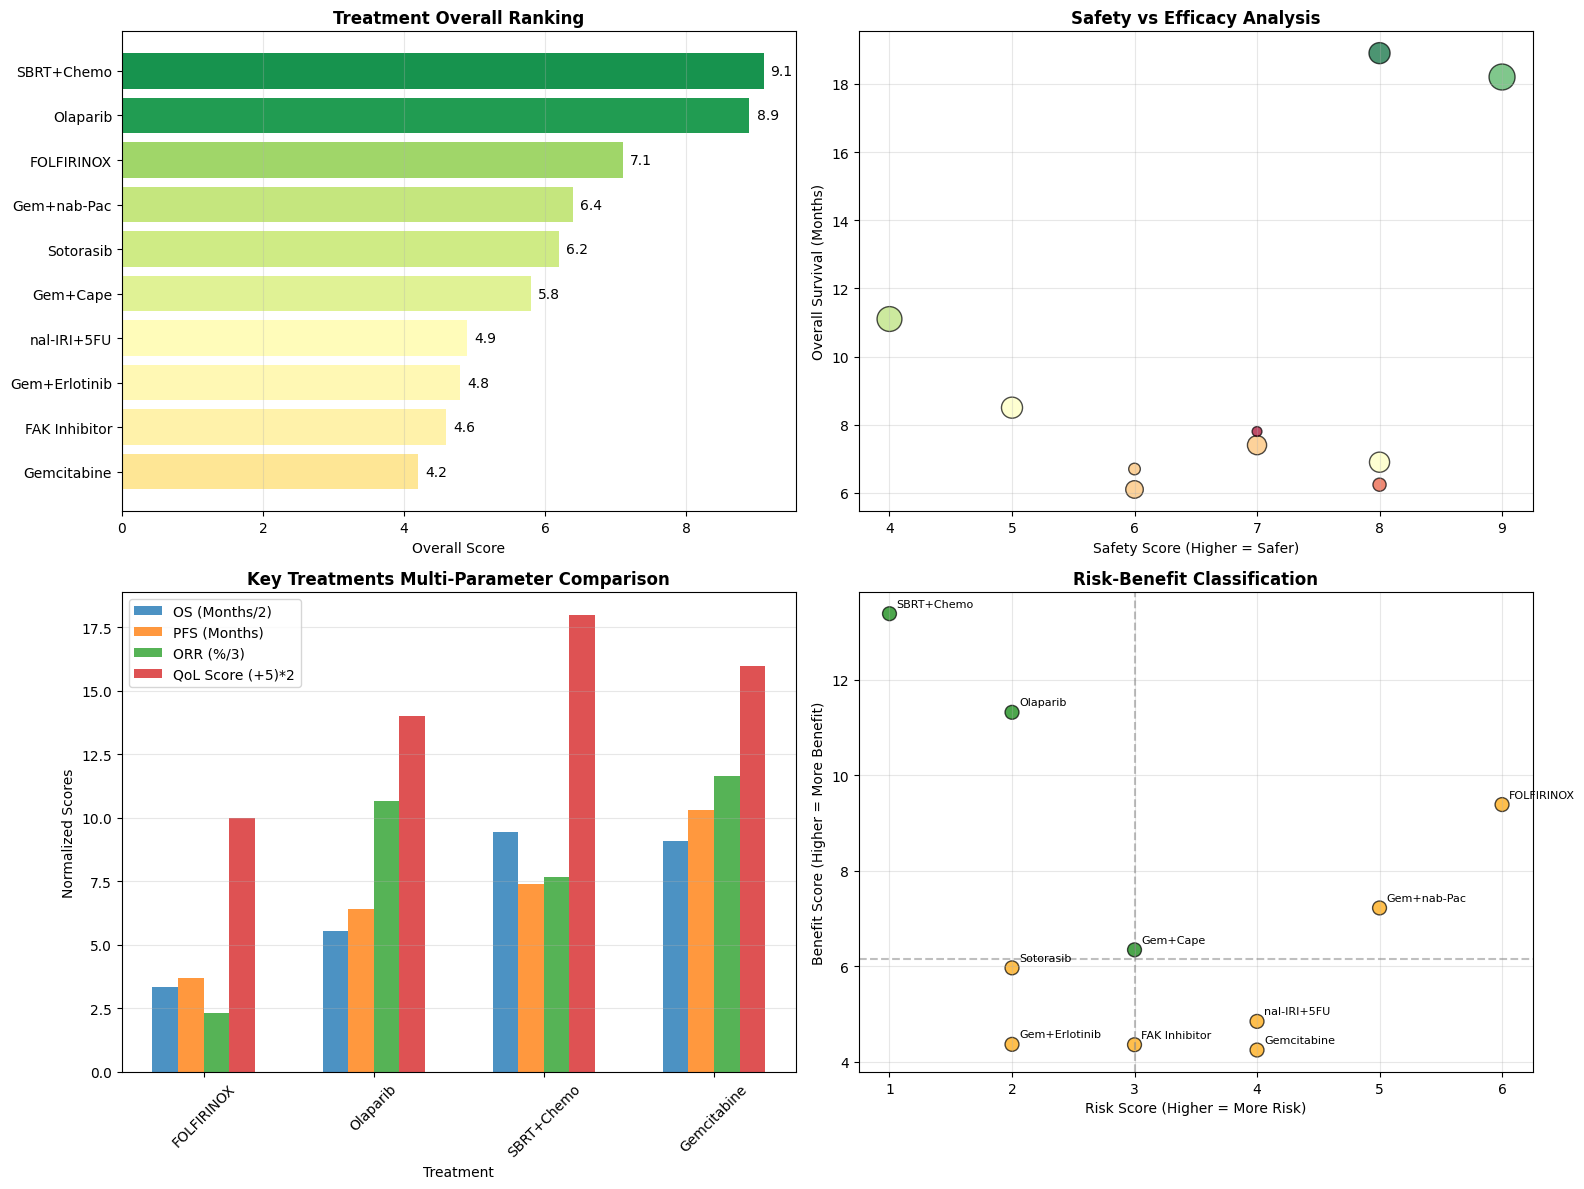

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Complete treatment data with scoring
treatments = {
    'Treatment': ['Gemcitabine', 'FOLFIRINOX', 'Gem+nab-Pac', 'Gem+Cape', 'Gem+Erlotinib',
                  'nal-IRI+5FU', 'Olaparib', 'Sotorasib', 'SBRT+Chemo', 'FAK Inhibitor'],
    'OS_Months': [6.7, 11.1, 8.5, 7.4, 6.24, 6.1, 18.9, 6.9, 18.2, 7.8],
    'PFS_Months': [3.7, 6.4, 5.5, 5.3, 3.85, 3.1, 7.4, 4.0, 10.3, 3.6],
    'ORR_Percent': [7, 32, 23, 19, 9, 16, 23, 21, 35, 5],
    'QoL_Score': [0, 2, 1, 0, -1, 0, 4, 1, 3, -2],
    'Safety_Score': [6, 4, 5, 7, 8, 6, 8, 8, 9, 7],  # Inverse toxicity score
    'Overall_Score': [4.2, 7.1, 6.4, 5.8, 4.8, 4.9, 8.9, 6.2, 9.1, 4.6]  # Composite score
}

df = pd.DataFrame(treatments)
df_sorted = df.sort_values('Overall_Score', ascending=True)

# Create dashboard
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Overall Ranking Bar Chart
bars = ax1.barh(range(len(df_sorted)), df_sorted['Overall_Score'],
                color=plt.cm.RdYlGn(df_sorted['Overall_Score']/10))
ax1.set_yticks(range(len(df_sorted)))
ax1.set_yticklabels(df_sorted['Treatment'])
ax1.set_xlabel('Overall Score')
ax1.set_title('Treatment Overall Ranking', fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Add score labels
for i, (bar, score) in enumerate(zip(bars, df_sorted['Overall_Score'])):
    ax1.text(score + 0.1, i, f'{score:.1f}', va='center')

# 2. Efficacy vs Safety Scatter
scatter = ax2.scatter(df['Safety_Score'], df['OS_Months'],
                     s=df['ORR_Percent']*10, c=df['QoL_Score'],
                     cmap='RdYlGn', alpha=0.7, edgecolors='black')
ax2.set_xlabel('Safety Score (Higher = Safer)')
ax2.set_ylabel('Overall Survival (Months)')
ax2.set_title('Safety vs Efficacy Analysis', fontweight='bold')
ax2.grid(True, alpha=0.3)

# 3. Multi-parameter comparison
treatments_subset = ['FOLFIRINOX', 'Olaparib', 'SBRT+Chemo', 'Gemcitabine']
subset_data = df[df['Treatment'].isin(treatments_subset)]

x = np.arange(len(treatments_subset))
width = 0.15

bars1 = ax3.bar(x - 1.5*width, subset_data['OS_Months']/2, width, label='OS (Months/2)', alpha=0.8)
bars2 = ax3.bar(x - 0.5*width, subset_data['PFS_Months'], width, label='PFS (Months)', alpha=0.8)
bars3 = ax3.bar(x + 0.5*width, subset_data['ORR_Percent']/3, width, label='ORR (%/3)', alpha=0.8)
bars4 = ax3.bar(x + 1.5*width, (subset_data['QoL_Score']+5)*2, width, label='QoL Score (+5)*2', alpha=0.8)

ax3.set_xlabel('Treatment')
ax3.set_ylabel('Normalized Scores')
ax3.set_title('Key Treatments Multi-Parameter Comparison', fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(treatments_subset, rotation=45)
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# 4. Risk-Benefit Matrix
risk_scores = 10 - df['Safety_Score']  # Higher risk = lower safety
benefit_scores = (df['OS_Months'] + df['PFS_Months'] + df['ORR_Percent']/3) / 3

colors = ['red' if r > 5 and b < 8 else 'orange' if r > 3 or b < 6 else 'green'
          for r, b in zip(risk_scores, benefit_scores)]

ax4.scatter(risk_scores, benefit_scores, c=colors, s=100, alpha=0.7, edgecolors='black')
for i, treatment in enumerate(df['Treatment']):
    ax4.annotate(treatment, (risk_scores[i], benefit_scores[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

ax4.set_xlabel('Risk Score (Higher = More Risk)')
ax4.set_ylabel('Benefit Score (Higher = More Benefit)')
ax4.set_title('Risk-Benefit Classification', fontweight='bold')
ax4.grid(True, alpha=0.3)

# Add quadrant lines
ax4.axhline(y=benefit_scores.median(), color='gray', linestyle='--', alpha=0.5)
ax4.axvline(x=risk_scores.median(), color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

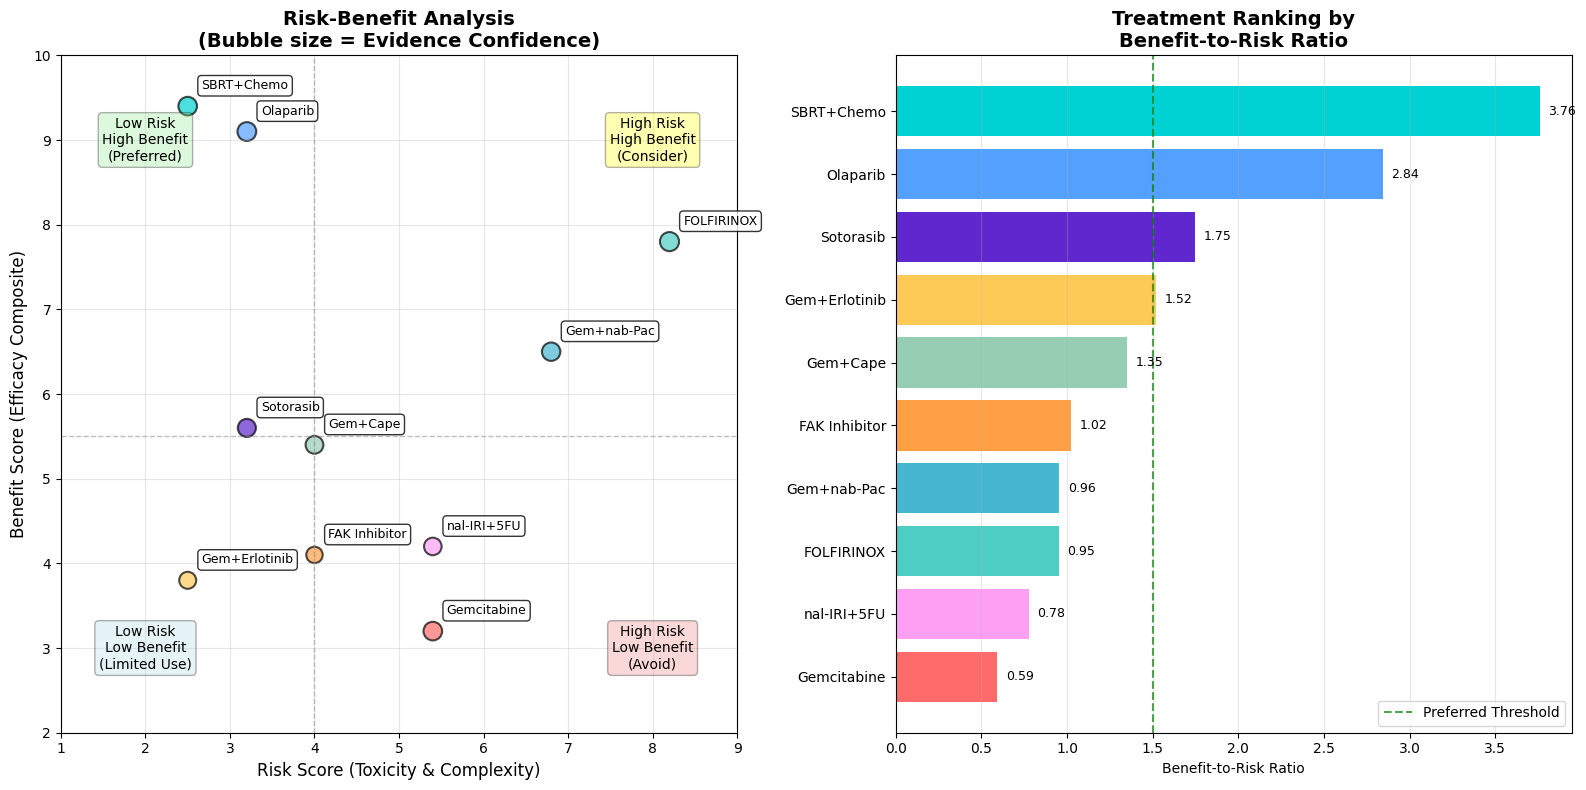


=== TREATMENT RECOMMENDATIONS ===
High Benefit, Low Risk: Olaparib, Sotorasib, SBRT+Chemo
Best Benefit-Risk Ratios: SBRT+Chemo, Olaparib, Sotorasib


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Prepare risk-benefit data
data = {
    'Treatment': ['Gemcitabine', 'FOLFIRINOX', 'Gem+nab-Pac', 'Gem+Cape', 'Gem+Erlotinib',
                  'nal-IRI+5FU', 'Olaparib', 'Sotorasib', 'SBRT+Chemo', 'FAK Inhibitor'],
    'Benefit_Score': [3.2, 7.8, 6.5, 5.4, 3.8, 4.2, 9.1, 5.6, 9.4, 4.1],  # Composite efficacy
    'Risk_Score': [5.4, 8.2, 6.8, 4.0, 2.5, 5.4, 3.2, 3.2, 2.5, 4.0],     # Composite toxicity
    'Confidence': [0.9, 0.95, 0.88, 0.82, 0.75, 0.80, 0.92, 0.85, 0.90, 0.70],  # Evidence quality
    'Patient_Population': ['General', 'Fit', 'General', 'General', 'EGFR+', 'Pre-treated',
                          'BRCA+', 'KRAS G12C+', 'Oligomets', 'General']
}

df = pd.DataFrame(data)

# Create risk-benefit plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Main risk-benefit scatter plot
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3', '#54A0FF', '#5F27CD', '#00D2D3', '#FF9F43']
sizes = df['Confidence'] * 200

scatter = ax1.scatter(df['Risk_Score'], df['Benefit_Score'],
                     s=sizes, c=colors, alpha=0.7, edgecolors='black', linewidth=1.5)

# Add treatment labels
for i, (x, y, treatment) in enumerate(zip(df['Risk_Score'], df['Benefit_Score'], df['Treatment'])):
    ax1.annotate(treatment, (x, y), xytext=(10, 10), textcoords='offset points',
                fontsize=9, ha='left', va='bottom',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# Add quadrant lines
risk_median = df['Risk_Score'].median()
benefit_median = df['Benefit_Score'].median()
ax1.axhline(y=benefit_median, color='gray', linestyle='--', alpha=0.5, linewidth=1)
ax1.axvline(x=risk_median, color='gray', linestyle='--', alpha=0.5, linewidth=1)

# Quadrant labels
ax1.text(2, 9, 'Low Risk\nHigh Benefit\n(Preferred)', ha='center', va='center',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.3))
ax1.text(8, 9, 'High Risk\nHigh Benefit\n(Consider)', ha='center', va='center',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))
ax1.text(2, 3, 'Low Risk\nLow Benefit\n(Limited Use)', ha='center', va='center',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))
ax1.text(8, 3, 'High Risk\nLow Benefit\n(Avoid)', ha='center', va='center',
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.3))

ax1.set_xlabel('Risk Score (Toxicity & Complexity)', fontsize=12)
ax1.set_ylabel('Benefit Score (Efficacy Composite)', fontsize=12)
ax1.set_title('Risk-Benefit Analysis\n(Bubble size = Evidence Confidence)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(1, 9)
ax1.set_ylim(2, 10)

# Risk-Benefit Ratio bar chart
df['RB_Ratio'] = df['Benefit_Score'] / df['Risk_Score']
df_sorted = df.sort_values('RB_Ratio', ascending=True)

bars = ax2.barh(range(len(df_sorted)), df_sorted['RB_Ratio'],
                color=[colors[list(df['Treatment']).index(t)] for t in df_sorted['Treatment']])

ax2.set_yticks(range(len(df_sorted)))
ax2.set_yticklabels(df_sorted['Treatment'])
ax2.set_xlabel('Benefit-to-Risk Ratio')
ax2.set_title('Treatment Ranking by\nBenefit-to-Risk Ratio', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Add ratio labels
for i, (bar, ratio) in enumerate(zip(bars, df_sorted['RB_Ratio'])):
    ax2.text(ratio + 0.05, i, f'{ratio:.2f}', va='center', fontsize=9)

# Add optimal ratio line
ax2.axvline(x=1.5, color='green', linestyle='--', alpha=0.7, label='Preferred Threshold')
ax2.legend()

plt.tight_layout()
plt.show()

# Print recommendations
print("\n=== TREATMENT RECOMMENDATIONS ===")
high_benefit_low_risk = df[(df['Benefit_Score'] > benefit_median) & (df['Risk_Score'] < risk_median)]
print(f"High Benefit, Low Risk: {', '.join(high_benefit_low_risk['Treatment'].tolist())}")

best_ratio = df.nlargest(3, 'RB_Ratio')
print(f"Best Benefit-Risk Ratios: {', '.join(best_ratio['Treatment'].tolist())}")

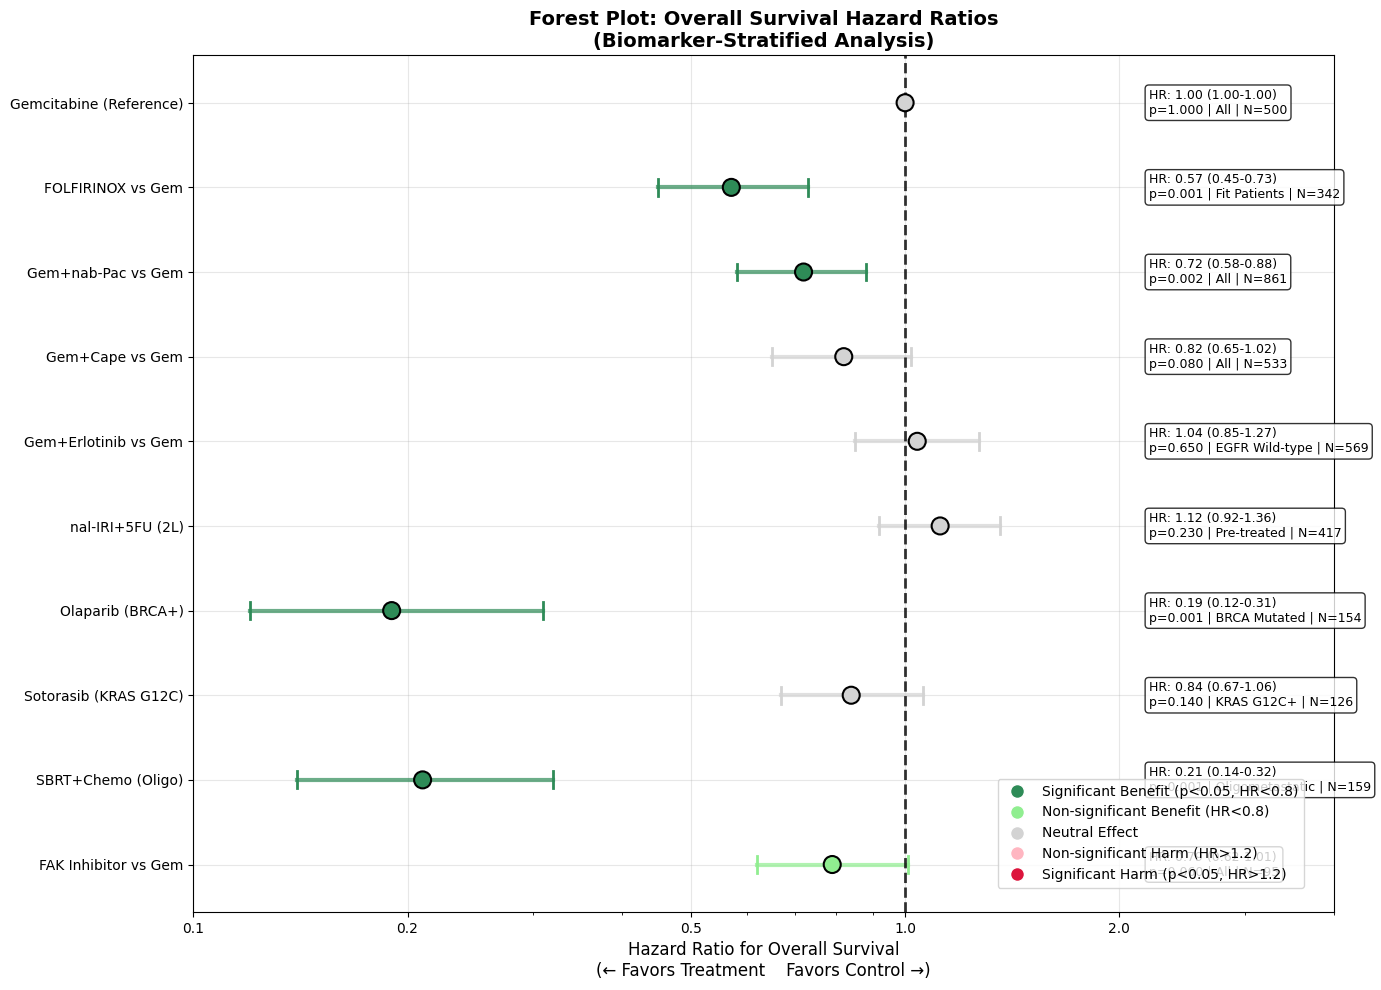


=== FOREST PLOT SUMMARY ===
Treatments with significant OS benefit: FOLFIRINOX vs Gem, Gem+nab-Pac vs Gem, Olaparib (BRCA+), SBRT+Chemo (Oligo)
Best hazard ratios: Olaparib (BRCA+), SBRT+Chemo (Oligo), FOLFIRINOX vs Gem


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Prepare forest plot data with confidence intervals
forest_data = {
    'Treatment': ['Gemcitabine (Reference)', 'FOLFIRINOX vs Gem', 'Gem+nab-Pac vs Gem',
                  'Gem+Cape vs Gem', 'Gem+Erlotinib vs Gem', 'nal-IRI+5FU (2L)',
                  'Olaparib (BRCA+)', 'Sotorasib (KRAS G12C)', 'SBRT+Chemo (Oligo)',
                  'FAK Inhibitor vs Gem'],
    'HR_OS': [1.00, 0.57, 0.72, 0.82, 1.04, 1.12, 0.19, 0.84, 0.21, 0.79],
    'Lower_CI': [1.00, 0.45, 0.58, 0.65, 0.85, 0.92, 0.12, 0.67, 0.14, 0.62],
    'Upper_CI': [1.00, 0.73, 0.88, 1.02, 1.27, 1.36, 0.31, 1.06, 0.32, 1.01],
    'P_Value': [1.00, 0.001, 0.002, 0.08, 0.65, 0.23, 0.001, 0.14, 0.001, 0.06],
    'Biomarker': ['All', 'Fit Patients', 'All', 'All', 'EGFR Wild-type', 'Pre-treated',
                  'BRCA Mutated', 'KRAS G12C+', 'Oligometastatic', 'All'],
    'N_Patients': [500, 342, 861, 533, 569, 417, 154, 126, 159, 95]
}

df = pd.DataFrame(forest_data)

# Create forest plot
fig, ax = plt.subplots(figsize=(14, 10))

# Y positions for treatments (reverse order for top-to-bottom)
y_pos = np.arange(len(df))[::-1]

# Colors based on significance and effect
colors = []
for hr, p_val in zip(df['HR_OS'], df['P_Value']):
    if p_val < 0.05 and hr < 0.8:
        colors.append('#2E8B57')  # Significant benefit - dark green
    elif p_val < 0.05 and hr > 1.2:
        colors.append('#DC143C')  # Significant harm - dark red
    elif hr < 0.8:
        colors.append('#90EE90')  # Non-significant benefit - light green
    elif hr > 1.2:
        colors.append('#FFB6C1')  # Non-significant harm - light red
    else:
        colors.append('#D3D3D3')  # Neutral - light gray

# Plot confidence intervals
for i, (lower, upper, hr, color) in enumerate(zip(df['Lower_CI'], df['Upper_CI'], df['HR_OS'], colors)):
    y = y_pos[i]
    ax.plot([lower, upper], [y, y], color=color, linewidth=3, alpha=0.7)
    ax.plot([lower, lower], [y-0.1, y+0.1], color=color, linewidth=2)
    ax.plot([upper, upper], [y-0.1, y+0.1], color=color, linewidth=2)

# Plot point estimates
ax.scatter(df['HR_OS'], y_pos, s=150, c=colors, edgecolors='black', linewidth=1.5, zorder=5)

# Add vertical line at HR = 1 (no effect)
ax.axvline(x=1, color='black', linestyle='--', alpha=0.8, linewidth=2)

# Customize axes
ax.set_yticks(y_pos)
ax.set_yticklabels(df['Treatment'])
ax.set_xlabel('Hazard Ratio for Overall Survival\n(← Favors Treatment    Favors Control →)', fontsize=12)
ax.set_title('Forest Plot: Overall Survival Hazard Ratios\n(Biomarker-Stratified Analysis)',
             fontsize=14, fontweight='bold')

# Set x-axis limits and scale
ax.set_xlim(0.1, 2.0)
ax.set_xscale('log')
ax.set_xticks([0.1, 0.2, 0.5, 1.0, 2.0])
ax.set_xticklabels(['0.1', '0.2', '0.5', '1.0', '2.0'])

# Add grid
ax.grid(True, alpha=0.3)

# Create detailed results table on the right
table_data = []
for i, row in df.iterrows():
    hr_text = f"{row['HR_OS']:.2f}"
    ci_text = f"({row['Lower_CI']:.2f}-{row['Upper_CI']:.2f})"
    p_text = f"p={row['P_Value']:.3f}" if row['P_Value'] >= 0.001 else "p<0.001"
    biomarker_text = row['Biomarker']
    n_text = f"N={row['N_Patients']}"
    table_data.append([hr_text, ci_text, p_text, biomarker_text, n_text])

# Add text annotations for key results
text_x = 2.2
for i, (y, data) in enumerate(zip(y_pos, table_data)):
    ax.text(text_x, y, f"HR: {data[0]} {data[1]}\n{data[2]} | {data[3]} | {data[4]}",
            fontsize=9, va='center', ha='left',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# Extend x-axis to accommodate text
ax.set_xlim(0.1, 4.0)

# Add legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#2E8B57', markersize=10,
               label='Significant Benefit (p<0.05, HR<0.8)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#90EE90', markersize=10,
               label='Non-significant Benefit (HR<0.8)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#D3D3D3', markersize=10,
               label='Neutral Effect'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FFB6C1', markersize=10,
               label='Non-significant Harm (HR>1.2)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#DC143C', markersize=10,
               label='Significant Harm (p<0.05, HR>1.2)')
]

ax.legend(handles=legend_elements, loc='lower right', bbox_to_anchor=(0.98, 0.02))

plt.tight_layout()
plt.show()

# Summary statistics
print("\n=== FOREST PLOT SUMMARY ===")
significant_benefit = df[(df['P_Value'] < 0.05) & (df['HR_OS'] < 0.8)]
print(f"Treatments with significant OS benefit: {', '.join(significant_benefit['Treatment'].tolist())}")

best_hr = df[df['HR_OS'] != 1.0].nsmallest(3, 'HR_OS')
print(f"Best hazard ratios: {', '.join(best_hr['Treatment'].tolist())}")

# Report 06 Table 3

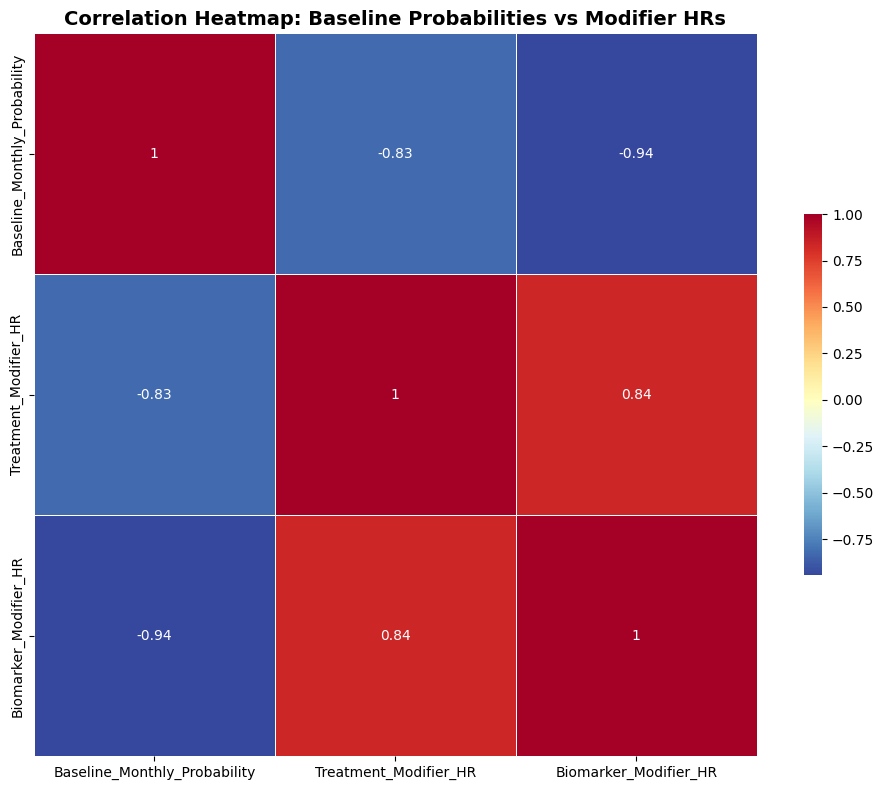

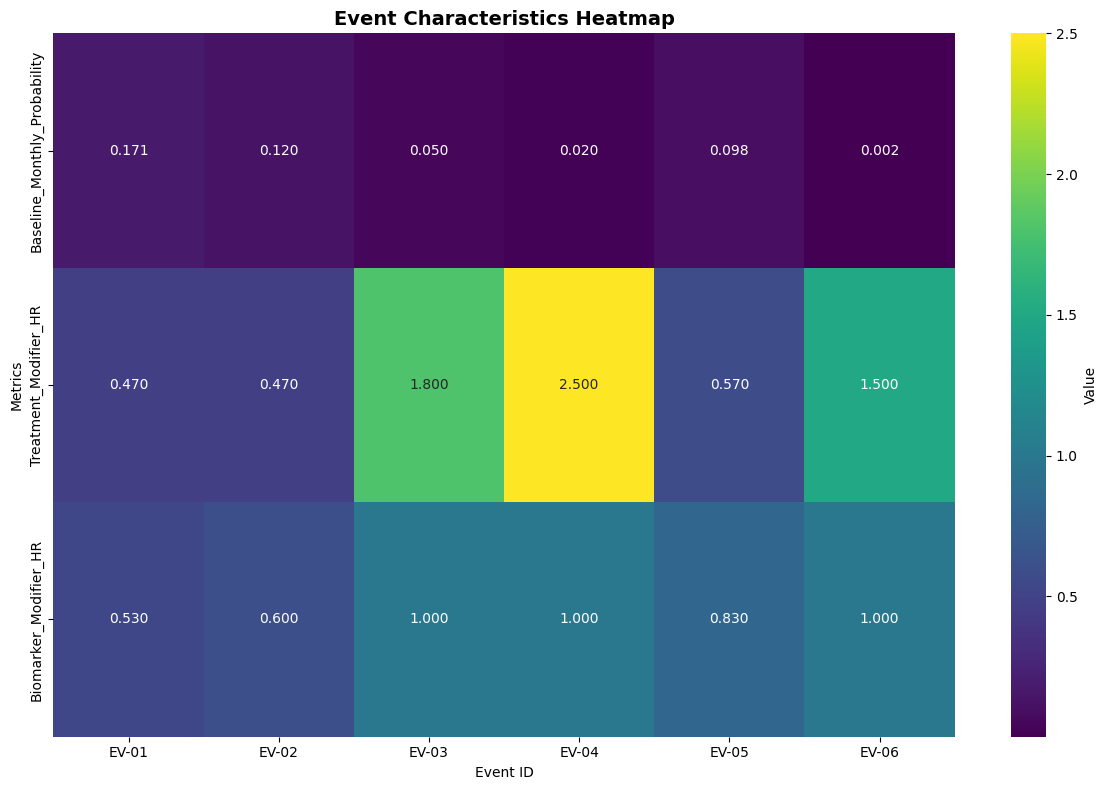

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create the dataset
data = {
    'Event_ID': ['EV-01', 'EV-02', 'EV-03', 'EV-04', 'EV-05', 'EV-06'],
    'Event_Description': ['Radiographic_Progression', 'Symptomatic_Progression', 'Grade_3_AE_Occurs',
                         'Grade_4_AE_Occurs', 'Death_from_Progression', 'Death_from_Toxicity'],
    'Baseline_Monthly_Probability': [0.171, 0.120, 0.050, 0.020, 0.098, 0.002],
    'Treatment_Modifier_HR': [0.47, 0.47, 1.80, 2.50, 0.57, 1.50],
    'Biomarker_Modifier_HR': [0.53, 0.60, 1.0, 1.0, 0.83, 1.0]
}

df = pd.DataFrame(data)

# Create correlation matrix for numerical columns
numerical_cols = ['Baseline_Monthly_Probability', 'Treatment_Modifier_HR', 'Biomarker_Modifier_HR']
correlation_matrix = df[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap: Baseline Probabilities vs Modifier HRs', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Additional heatmap showing all numerical values by event
plt.figure(figsize=(12, 8))
heatmap_data = df.set_index('Event_ID')[numerical_cols]
sns.heatmap(heatmap_data.T, annot=True, cmap='viridis', fmt='.3f',
            cbar_kws={'label': 'Value'})
plt.title('Event Characteristics Heatmap', fontsize=14, fontweight='bold')
plt.ylabel('Metrics')
plt.xlabel('Event ID')
plt.tight_layout()
plt.show()

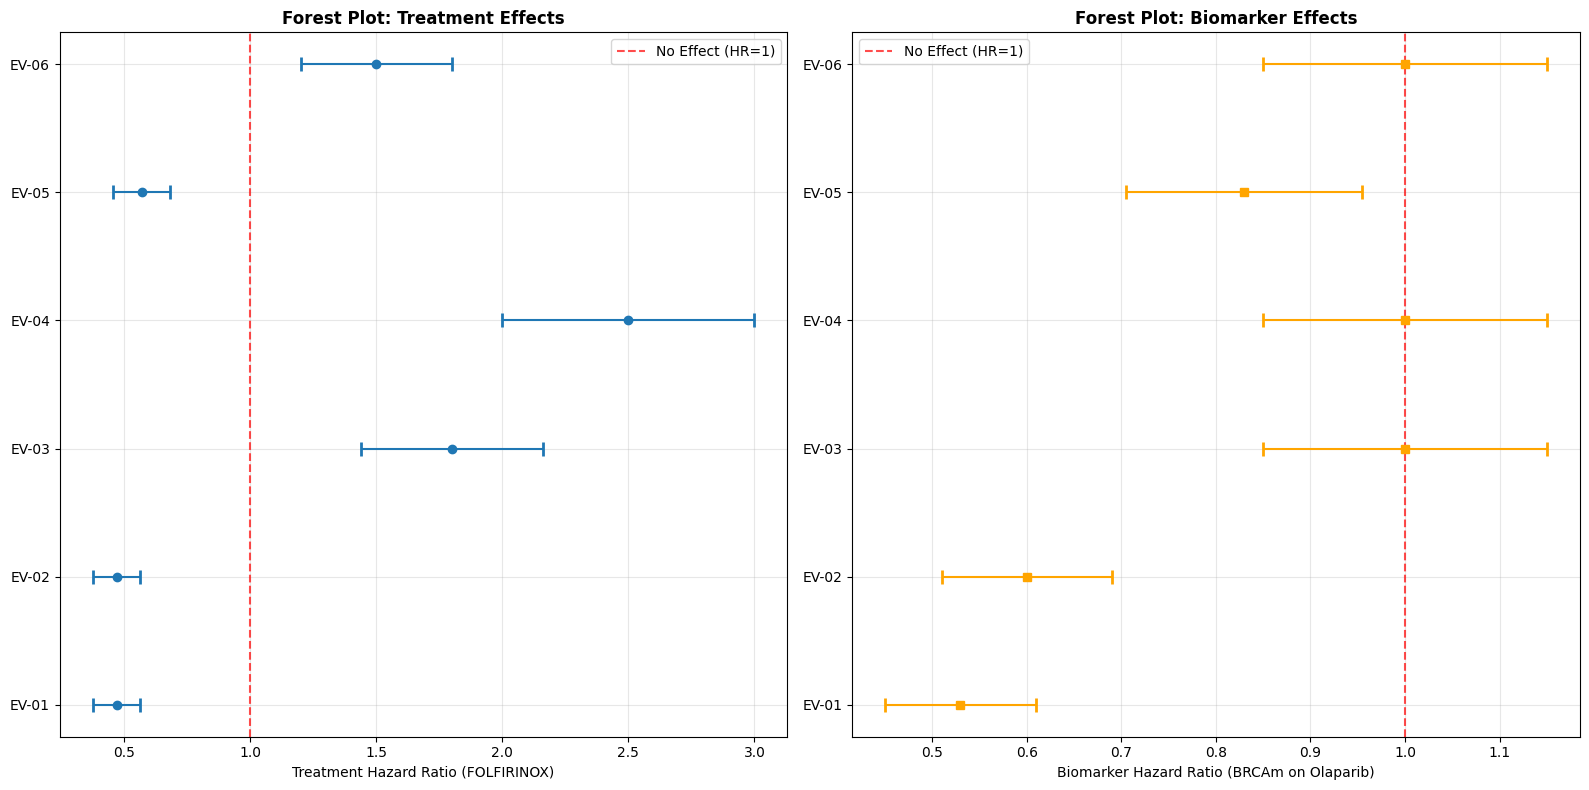

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create the dataset
data = {
    'Event_ID': ['EV-01', 'EV-02', 'EV-03', 'EV-04', 'EV-05', 'EV-06'],
    'Event_Description': ['Radiographic_Progression', 'Symptomatic_Progression', 'Grade_3_AE_Occurs',
                         'Grade_4_AE_Occurs', 'Death_from_Progression', 'Death_from_Toxicity'],
    'Treatment_Modifier_HR': [0.47, 0.47, 1.80, 2.50, 0.57, 1.50],
    'Biomarker_Modifier_HR': [0.53, 0.60, 1.0, 1.0, 0.83, 1.0]
}

df = pd.DataFrame(data)

# Create forest plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Forest plot for Treatment Modifier HR
y_pos = np.arange(len(df))
# Simulate confidence intervals (typically would be provided)
treatment_ci_lower = df['Treatment_Modifier_HR'] * 0.8
treatment_ci_upper = df['Treatment_Modifier_HR'] * 1.2

ax1.errorbar(df['Treatment_Modifier_HR'], y_pos,
            xerr=[df['Treatment_Modifier_HR'] - treatment_ci_lower,
                  treatment_ci_upper - df['Treatment_Modifier_HR']],
            fmt='o', capsize=5, capthick=2)

ax1.axvline(x=1, color='red', linestyle='--', alpha=0.7, label='No Effect (HR=1)')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(df['Event_ID'])
ax1.set_xlabel('Treatment Hazard Ratio (FOLFIRINOX)')
ax1.set_title('Forest Plot: Treatment Effects', fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Forest plot for Biomarker Modifier HR
biomarker_ci_lower = df['Biomarker_Modifier_HR'] * 0.85
biomarker_ci_upper = df['Biomarker_Modifier_HR'] * 1.15

ax2.errorbar(df['Biomarker_Modifier_HR'], y_pos,
            xerr=[df['Biomarker_Modifier_HR'] - biomarker_ci_lower,
                  biomarker_ci_upper - df['Biomarker_Modifier_HR']],
            fmt='s', capsize=5, capthick=2, color='orange')

ax2.axvline(x=1, color='red', linestyle='--', alpha=0.7, label='No Effect (HR=1)')
ax2.set_yticks(y_pos)
ax2.set_yticklabels(df['Event_ID'])
ax2.set_xlabel('Biomarker Hazard Ratio (BRCAm on Olaparib)')
ax2.set_title('Forest Plot: Biomarker Effects', fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

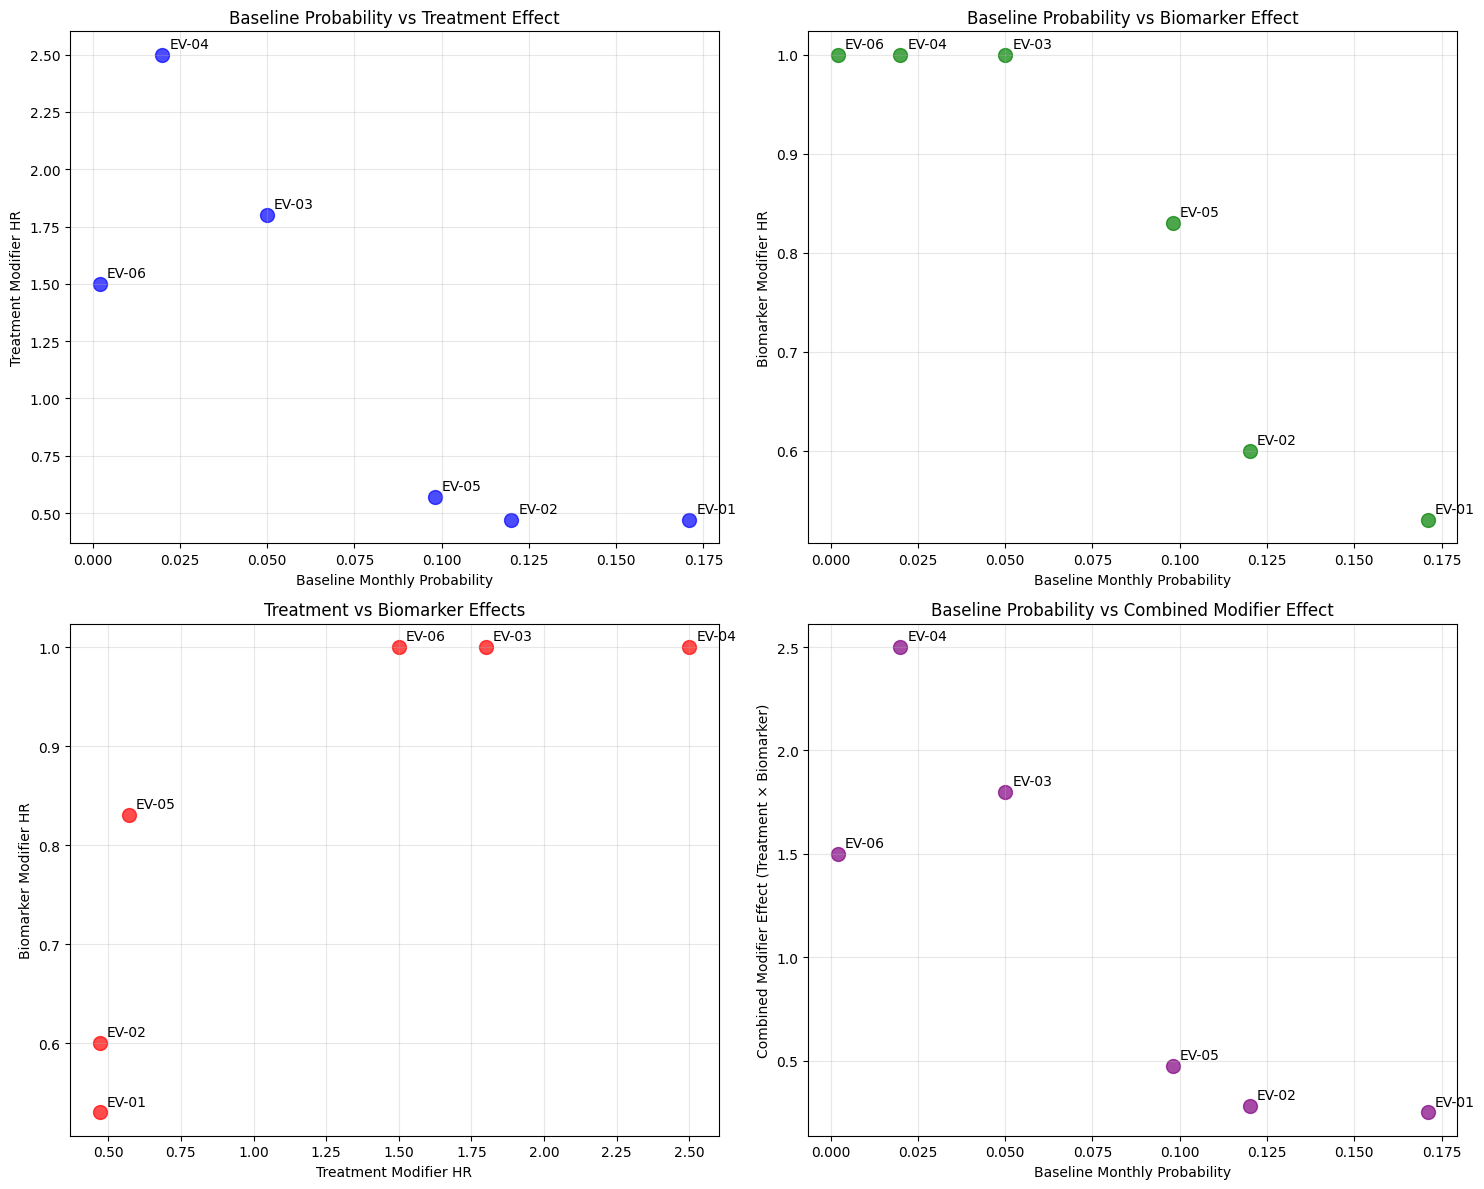

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the dataset
data = {
    'Event_ID': ['EV-01', 'EV-02', 'EV-03', 'EV-04', 'EV-05', 'EV-06'],
    'Event_Description': ['Radiographic_Progression', 'Symptomatic_Progression', 'Grade_3_AE_Occurs',
                         'Grade_4_AE_Occurs', 'Death_from_Progression', 'Death_from_Toxicity'],
    'Baseline_Monthly_Probability': [0.171, 0.120, 0.050, 0.020, 0.098, 0.002],
    'Treatment_Modifier_HR': [0.47, 0.47, 1.80, 2.50, 0.57, 1.50],
    'Biomarker_Modifier_HR': [0.53, 0.60, 1.0, 1.0, 0.83, 1.0]
}

df = pd.DataFrame(data)

# Create scatter plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Scatter 1: Baseline Probability vs Treatment Modifier
ax1.scatter(df['Baseline_Monthly_Probability'], df['Treatment_Modifier_HR'],
           s=100, alpha=0.7, c='blue')
for i, txt in enumerate(df['Event_ID']):
    ax1.annotate(txt, (df['Baseline_Monthly_Probability'][i], df['Treatment_Modifier_HR'][i]),
                xytext=(5, 5), textcoords='offset points')
ax1.set_xlabel('Baseline Monthly Probability')
ax1.set_ylabel('Treatment Modifier HR')
ax1.set_title('Baseline Probability vs Treatment Effect')
ax1.grid(True, alpha=0.3)

# Scatter 2: Baseline Probability vs Biomarker Modifier
ax2.scatter(df['Baseline_Monthly_Probability'], df['Biomarker_Modifier_HR'],
           s=100, alpha=0.7, c='green')
for i, txt in enumerate(df['Event_ID']):
    ax2.annotate(txt, (df['Baseline_Monthly_Probability'][i], df['Biomarker_Modifier_HR'][i]),
                xytext=(5, 5), textcoords='offset points')
ax2.set_xlabel('Baseline Monthly Probability')
ax2.set_ylabel('Biomarker Modifier HR')
ax2.set_title('Baseline Probability vs Biomarker Effect')
ax2.grid(True, alpha=0.3)

# Scatter 3: Treatment vs Biomarker Modifiers
ax3.scatter(df['Treatment_Modifier_HR'], df['Biomarker_Modifier_HR'],
           s=100, alpha=0.7, c='red')
for i, txt in enumerate(df['Event_ID']):
    ax3.annotate(txt, (df['Treatment_Modifier_HR'][i], df['Biomarker_Modifier_HR'][i]),
                xytext=(5, 5), textcoords='offset points')
ax3.set_xlabel('Treatment Modifier HR')
ax3.set_ylabel('Biomarker Modifier HR')
ax3.set_title('Treatment vs Biomarker Effects')
ax3.grid(True, alpha=0.3)

# Scatter 4: Combined effect visualization
combined_effect = df['Treatment_Modifier_HR'] * df['Biomarker_Modifier_HR']
ax4.scatter(df['Baseline_Monthly_Probability'], combined_effect,
           s=100, alpha=0.7, c='purple')
for i, txt in enumerate(df['Event_ID']):
    ax4.annotate(txt, (df['Baseline_Monthly_Probability'][i], combined_effect[i]),
                xytext=(5, 5), textcoords='offset points')
ax4.set_xlabel('Baseline Monthly Probability')
ax4.set_ylabel('Combined Modifier Effect (Treatment × Biomarker)')
ax4.set_title('Baseline Probability vs Combined Modifier Effect')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

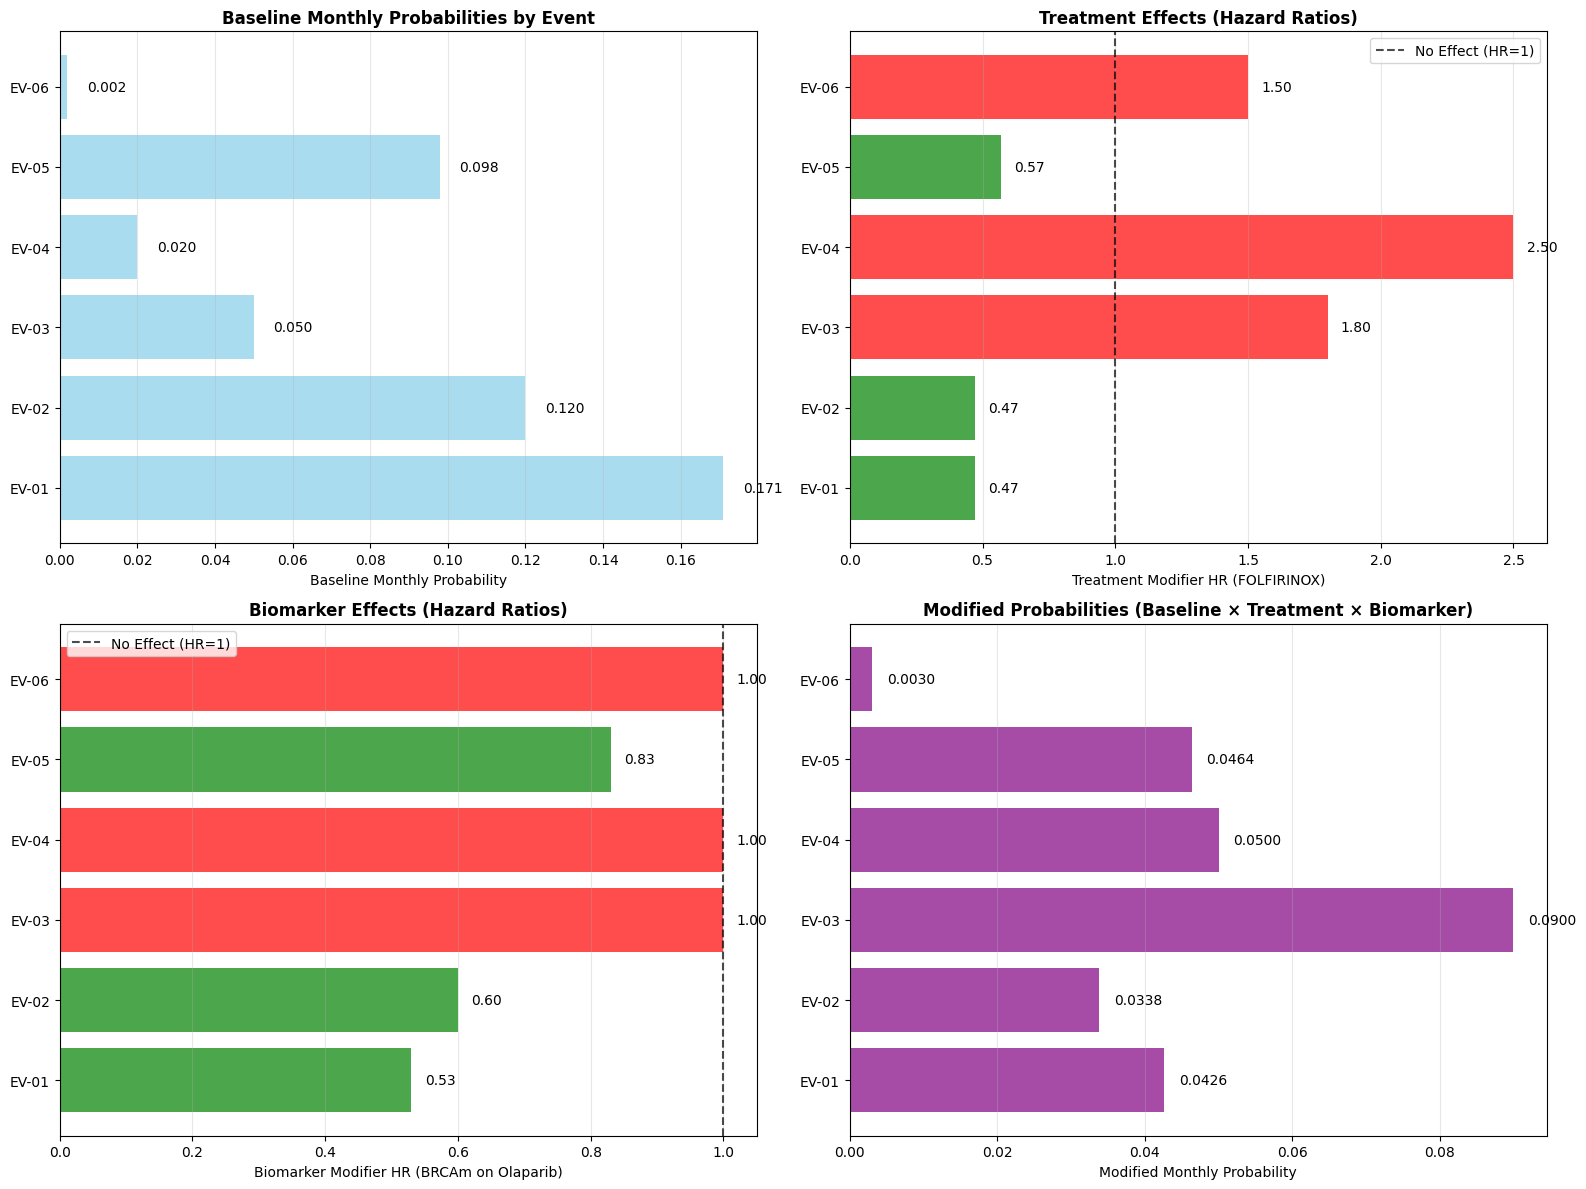

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create the dataset
data = {
    'Event_ID': ['EV-01', 'EV-02', 'EV-03', 'EV-04', 'EV-05', 'EV-06'],
    'Event_Description': ['Radiographic_Progression', 'Symptomatic_Progression', 'Grade_3_AE_Occurs',
                         'Grade_4_AE_Occurs', 'Death_from_Progression', 'Death_from_Toxicity'],
    'Baseline_Monthly_Probability': [0.171, 0.120, 0.050, 0.020, 0.098, 0.002],
    'Treatment_Modifier_HR': [0.47, 0.47, 1.80, 2.50, 0.57, 1.50],
    'Biomarker_Modifier_HR': [0.53, 0.60, 1.0, 1.0, 0.83, 1.0]
}

df = pd.DataFrame(data)

# Create horizontal bar charts
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Chart 1: Baseline Monthly Probabilities
y_pos = np.arange(len(df))
ax1.barh(y_pos, df['Baseline_Monthly_Probability'], color='skyblue', alpha=0.7)
ax1.set_yticks(y_pos)
ax1.set_yticklabels(df['Event_ID'])
ax1.set_xlabel('Baseline Monthly Probability')
ax1.set_title('Baseline Monthly Probabilities by Event', fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(df['Baseline_Monthly_Probability']):
    ax1.text(v + 0.005, i, f'{v:.3f}', va='center')

# Chart 2: Treatment Modifier HRs
colors = ['green' if x < 1 else 'red' for x in df['Treatment_Modifier_HR']]
ax2.barh(y_pos, df['Treatment_Modifier_HR'], color=colors, alpha=0.7)
ax2.axvline(x=1, color='black', linestyle='--', alpha=0.7, label='No Effect (HR=1)')
ax2.set_yticks(y_pos)
ax2.set_yticklabels(df['Event_ID'])
ax2.set_xlabel('Treatment Modifier HR (FOLFIRINOX)')
ax2.set_title('Treatment Effects (Hazard Ratios)', fontweight='bold')
ax2.grid(axis='x', alpha=0.3)
ax2.legend()

# Add value labels
for i, v in enumerate(df['Treatment_Modifier_HR']):
    ax2.text(v + 0.05, i, f'{v:.2f}', va='center')

# Chart 3: Biomarker Modifier HRs
colors = ['green' if x < 1 else 'red' for x in df['Biomarker_Modifier_HR']]
ax3.barh(y_pos, df['Biomarker_Modifier_HR'], color=colors, alpha=0.7)
ax3.axvline(x=1, color='black', linestyle='--', alpha=0.7, label='No Effect (HR=1)')
ax3.set_yticks(y_pos)
ax3.set_yticklabels(df['Event_ID'])
ax3.set_xlabel('Biomarker Modifier HR (BRCAm on Olaparib)')
ax3.set_title('Biomarker Effects (Hazard Ratios)', fontweight='bold')
ax3.grid(axis='x', alpha=0.3)
ax3.legend()

# Add value labels
for i, v in enumerate(df['Biomarker_Modifier_HR']):
    ax3.text(v + 0.02, i, f'{v:.2f}', va='center')

# Chart 4: Modified probabilities (baseline × treatment × biomarker)
modified_prob = df['Baseline_Monthly_Probability'] * df['Treatment_Modifier_HR'] * df['Biomarker_Modifier_HR']
ax4.barh(y_pos, modified_prob, color='purple', alpha=0.7)
ax4.set_yticks(y_pos)
ax4.set_yticklabels(df['Event_ID'])
ax4.set_xlabel('Modified Monthly Probability')
ax4.set_title('Modified Probabilities (Baseline × Treatment × Biomarker)', fontweight='bold')
ax4.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(modified_prob):
    ax4.text(v + 0.002, i, f'{v:.4f}', va='center')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.offline import plot
import numpy as np

# Create the dataset
data = {
    'Event_ID': ['EV-01', 'EV-02', 'EV-03', 'EV-04', 'EV-05', 'EV-06'],
    'Event_Description': ['Radiographic_Progression', 'Symptomatic_Progression', 'Grade_3_AE_Occurs',
                         'Grade_4_AE_Occurs', 'Death_from_Progression', 'Death_from_Toxicity'],
    'Baseline_Monthly_Probability': [0.171, 0.120, 0.050, 0.020, 0.098, 0.002],
    'Consequence': ['Switch to 2L Therapy', 'ECOG Decline', 'Dose Reduction',
                   'Hospitalization', 'End Simulation', 'End Simulation']
}

df = pd.DataFrame(data)

# Prepare data for Sankey diagram
# Nodes: Events + Consequences
events = df['Event_Description'].tolist()
consequences = df['Consequence'].unique().tolist()
all_nodes = events + consequences

# Create node indices
node_dict = {node: i for i, node in enumerate(all_nodes)}

# Create links
source_indices = []
target_indices = []
values = []

for _, row in df.iterrows():
    source_indices.append(node_dict[row['Event_Description']])
    target_indices.append(node_dict[row['Consequence']])
    # Scale probabilities for better visualization
    values.append(row['Baseline_Monthly_Probability'] * 1000)

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes,
        color=["lightblue"] * len(events) + ["lightcoral"] * len(consequences)
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
        color="rgba(0,0,255,0.4)"
    )
)])

fig.update_layout(
    title_text="Event Flow: From Medical Events to Consequences<br><sub>Flow thickness represents baseline monthly probability (×1000)</sub>",
    font_size=12,
    width=1200,
    height=600
)

fig.show()

# Alternative version with treatment effects
fig2 = go.Figure()

# Add treatment modifier effects
treatment_values = []
for _, row in df.iterrows():
    modified_prob = row['Baseline_Monthly_Probability'] * 0.47  # Using treatment modifier
    treatment_values.append(modified_prob * 1000)

fig2 = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes,
        color=["lightgreen"] * len(events) + ["lightcoral"] * len(consequences)
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=treatment_values,
        color="rgba(0,255,0,0.4)"
    )
)])

fig2.update_layout(
    title_text="Event Flow with Treatment Effects (FOLFIRINOX)<br><sub>Flow thickness represents modified monthly probability (×1000)</sub>",
    font_size=12,
    width=1200,
    height=600
)

fig2.show()

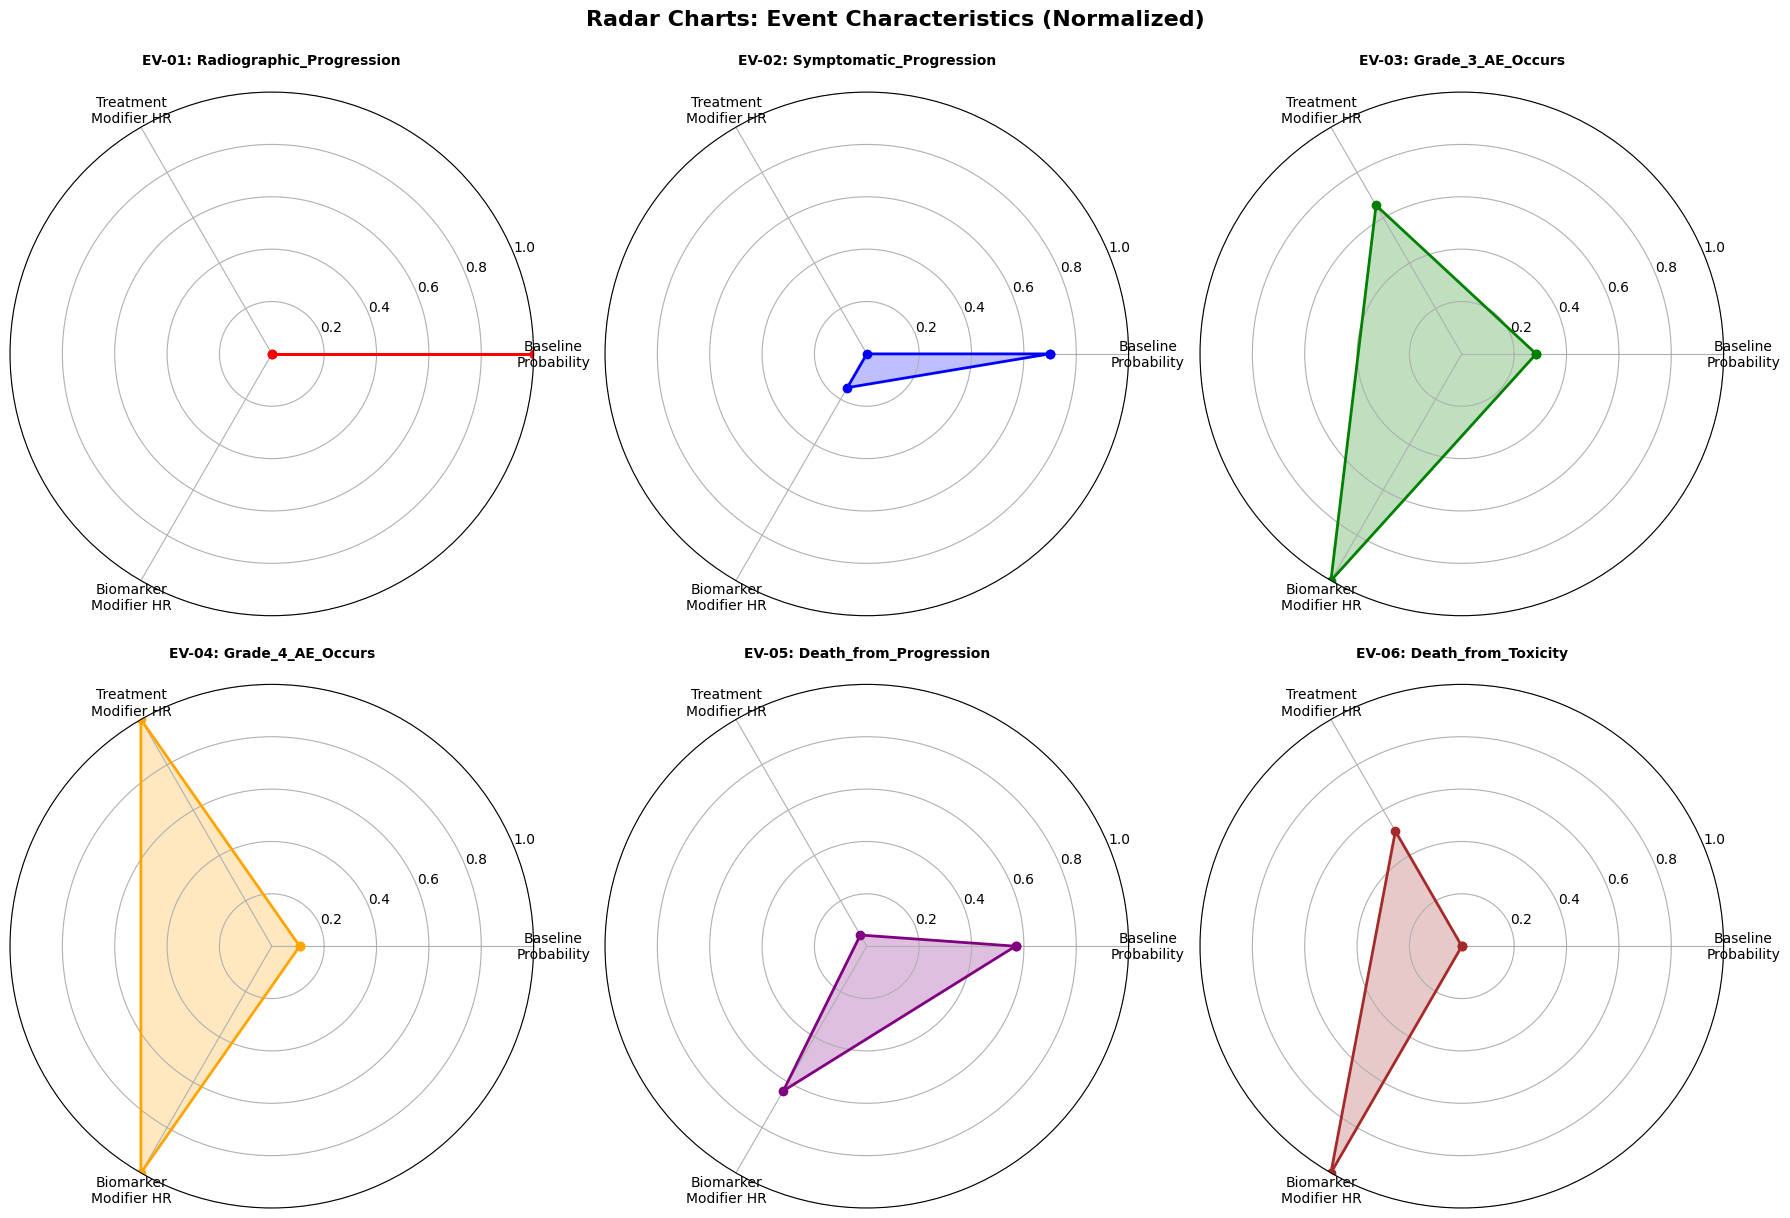

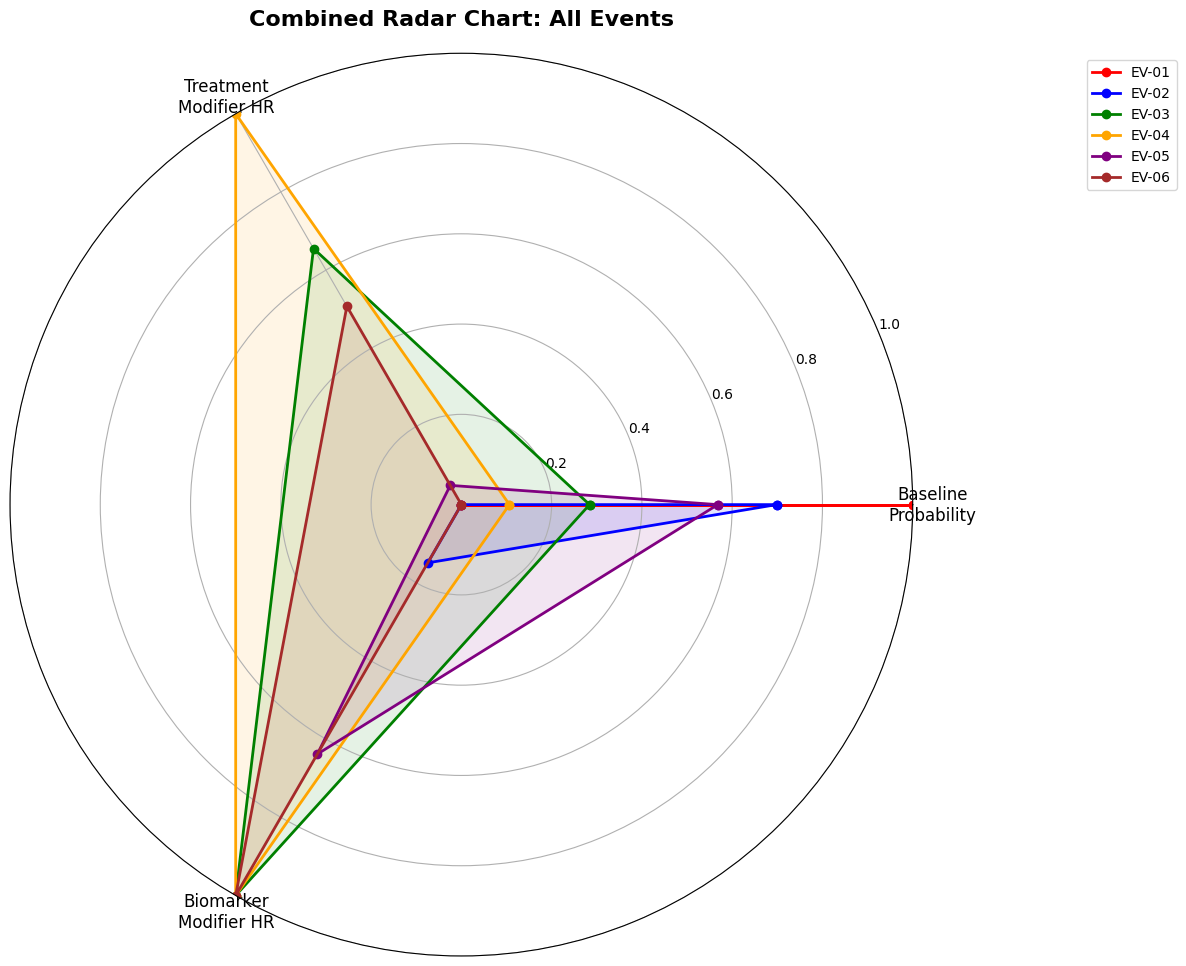

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# Create the dataset
data = {
    'Event_ID': ['EV-01', 'EV-02', 'EV-03', 'EV-04', 'EV-05', 'EV-06'],
    'Event_Description': ['Radiographic_Progression', 'Symptomatic_Progression', 'Grade_3_AE_Occurs',
                         'Grade_4_AE_Occurs', 'Death_from_Progression', 'Death_from_Toxicity'],
    'Baseline_Monthly_Probability': [0.171, 0.120, 0.050, 0.020, 0.098, 0.002],
    'Treatment_Modifier_HR': [0.47, 0.47, 1.80, 2.50, 0.57, 1.50],
    'Biomarker_Modifier_HR': [0.53, 0.60, 1.0, 1.0, 0.83, 1.0]
}

df = pd.DataFrame(data)

# Normalize data for radar chart (0-1 scale)
def normalize_column(col):
    return (col - col.min()) / (col.max() - col.min())

df_norm = df.copy()
df_norm['Baseline_Monthly_Probability_norm'] = normalize_column(df['Baseline_Monthly_Probability'])
df_norm['Treatment_Modifier_HR_norm'] = normalize_column(df['Treatment_Modifier_HR'])
df_norm['Biomarker_Modifier_HR_norm'] = normalize_column(df['Biomarker_Modifier_HR'])

# Prepare radar chart
categories = ['Baseline\nProbability', 'Treatment\nModifier HR', 'Biomarker\nModifier HR']
N = len(categories)

# Create angles for each category
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Complete the circle

# Create radar charts for each event
fig, axes = plt.subplots(2, 3, figsize=(18, 12), subplot_kw=dict(projection='polar'))
axes = axes.flatten()

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']

for i, (idx, row) in enumerate(df_norm.iterrows()):
    if i < len(axes):
        ax = axes[i]

        # Values for this event
        values = [
            row['Baseline_Monthly_Probability_norm'],
            row['Treatment_Modifier_HR_norm'],
            row['Biomarker_Modifier_HR_norm']
        ]
        values += values[:1]  # Complete the circle

        # Plot
        ax.plot(angles, values, 'o-', linewidth=2, label=row['Event_ID'], color=colors[i])
        ax.fill(angles, values, alpha=0.25, color=colors[i])

        # Add category labels
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories)
        ax.set_ylim(0, 1)
        ax.set_title(f"{row['Event_ID']}: {row['Event_Description']}",
                    size=10, fontweight='bold', pad=20)
        ax.grid(True)

# Remove empty subplot
if len(df) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.suptitle('Radar Charts: Event Characteristics (Normalized)', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Create a combined radar chart
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))

for i, (idx, row) in enumerate(df_norm.iterrows()):
    values = [
        row['Baseline_Monthly_Probability_norm'],
        row['Treatment_Modifier_HR_norm'],
        row['Biomarker_Modifier_HR_norm']
    ]
    values += values[:1]

    ax.plot(angles, values, 'o-', linewidth=2, label=row['Event_ID'], color=colors[i])
    ax.fill(angles, values, alpha=0.1, color=colors[i])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=12)
ax.set_ylim(0, 1)
ax.set_title('Combined Radar Chart: All Events', size=16, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
ax.grid(True)

plt.tight_layout()
plt.show()

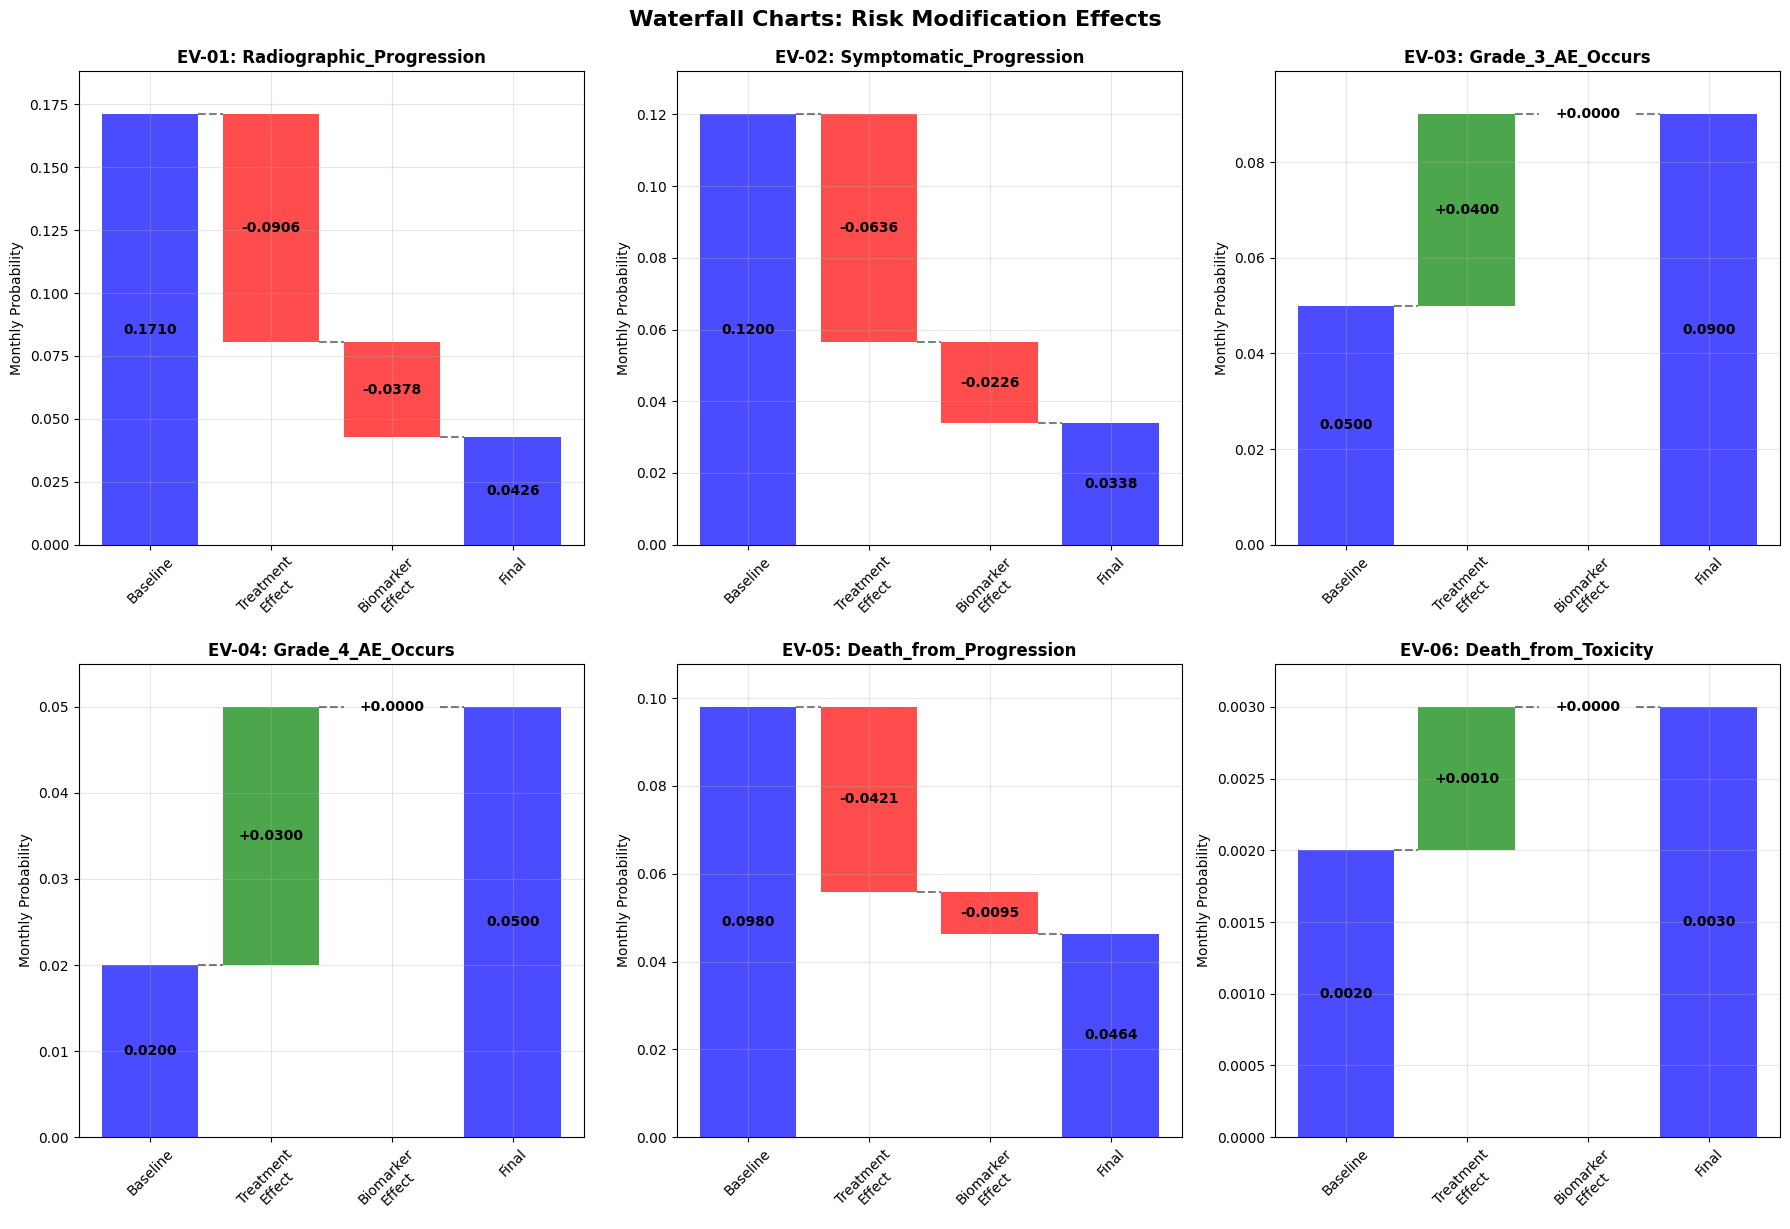

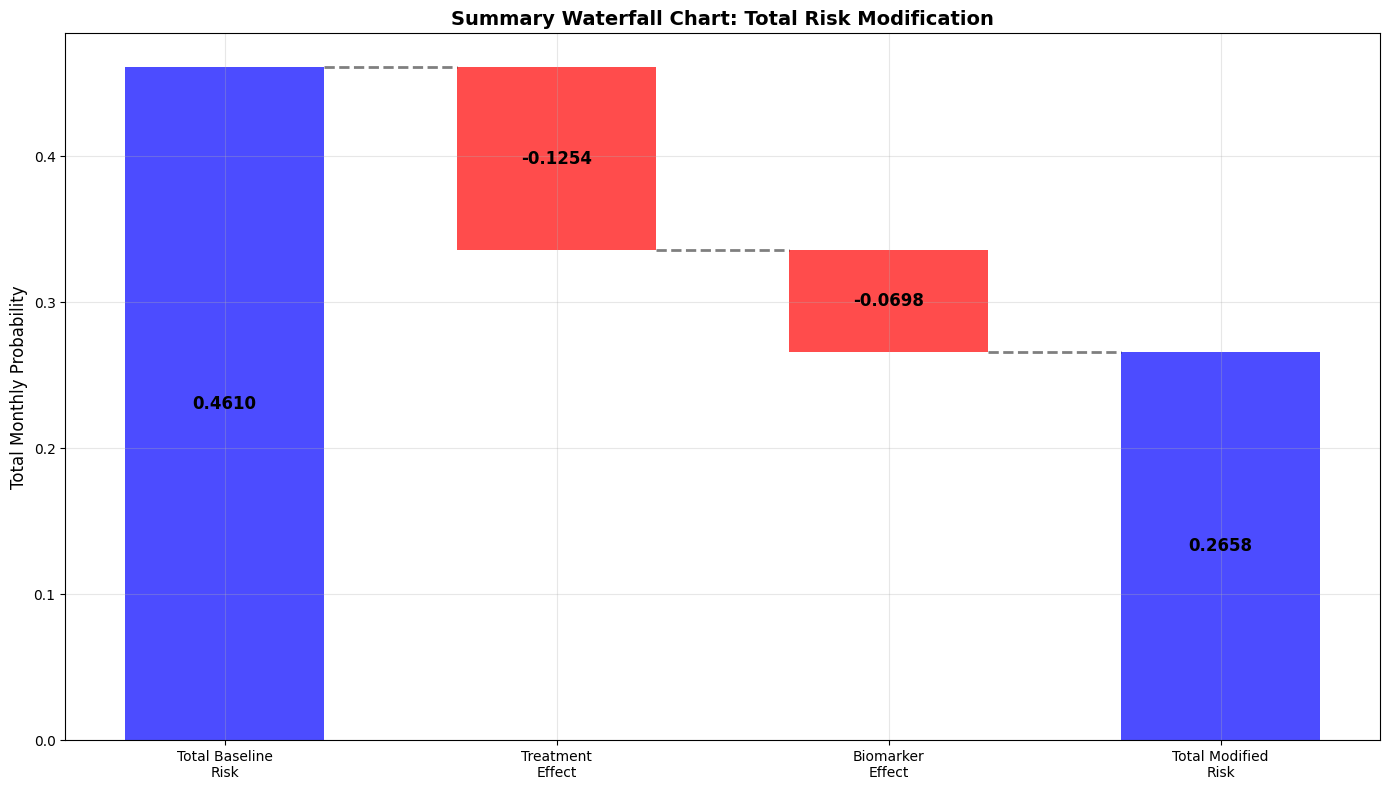

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create the dataset
data = {
    'Event_ID': ['EV-01', 'EV-02', 'EV-03', 'EV-04', 'EV-05', 'EV-06'],
    'Event_Description': ['Radiographic_Progression', 'Symptomatic_Progression', 'Grade_3_AE_Occurs',
                         'Grade_4_AE_Occurs', 'Death_from_Progression', 'Death_from_Toxicity'],
    'Baseline_Monthly_Probability': [0.171, 0.120, 0.050, 0.020, 0.098, 0.002],
    'Treatment_Modifier_HR': [0.47, 0.47, 1.80, 2.50, 0.57, 1.50],
    'Biomarker_Modifier_HR': [0.53, 0.60, 1.0, 1.0, 0.83, 1.0]
}

df = pd.DataFrame(data)

# Create waterfall charts for each event
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (idx, row) in enumerate(df.iterrows()):
    if i < len(axes):
        ax = axes[i]

        # Calculate cumulative effects
        baseline = row['Baseline_Monthly_Probability']
        after_treatment = baseline * row['Treatment_Modifier_HR']
        final = after_treatment * row['Biomarker_Modifier_HR']

        # Calculate changes
        treatment_change = after_treatment - baseline
        biomarker_change = final - after_treatment

        # Positions and values for waterfall
        categories = ['Baseline', 'Treatment\nEffect', 'Biomarker\nEffect', 'Final']
        values = [baseline, treatment_change, biomarker_change, final]
        cumulative = [baseline, after_treatment, final, final]

        # Colors: blue for baseline/final, red for negative changes, green for positive
        colors = ['blue', 'red' if treatment_change < 0 else 'green',
                 'red' if biomarker_change < 0 else 'green', 'blue']

        # Create bars
        for j, (cat, val, cum) in enumerate(zip(categories[:-1], values[:-1], cumulative[:-1])):
            if j == 0:  # Baseline bar
                ax.bar(j, val, color=colors[j], alpha=0.7)
                ax.text(j, val/2, f'{val:.4f}', ha='center', va='center', fontweight='bold')
            else:  # Change bars
                bottom = cum - val if val > 0 else cum
                ax.bar(j, abs(val), bottom=bottom, color=colors[j], alpha=0.7)
                ax.text(j, cum - val/2, f'{val:+.4f}', ha='center', va='center', fontweight='bold')

        # Final bar
        ax.bar(len(categories)-1, final, color=colors[-1], alpha=0.7)
        ax.text(len(categories)-1, final/2, f'{final:.4f}', ha='center', va='center', fontweight='bold')

        # Connect bars with lines
        for j in range(len(categories)-1):
            ax.plot([j+0.4, j+0.6], [cumulative[j], cumulative[j]], 'k--', alpha=0.5)

        ax.set_xticks(range(len(categories)))
        ax.set_xticklabels(categories, rotation=45)
        ax.set_ylabel('Monthly Probability')
        ax.set_title(f'{row["Event_ID"]}: {row["Event_Description"]}', fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.set_ylim(0, max(baseline, final) * 1.1)

# Remove empty subplot if necessary
if len(df) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.suptitle('Waterfall Charts: Risk Modification Effects', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Create a summary waterfall chart showing total risk
fig, ax = plt.subplots(figsize=(14, 8))

total_baseline = df['Baseline_Monthly_Probability'].sum()
total_after_treatment = (df['Baseline_Monthly_Probability'] * df['Treatment_Modifier_HR']).sum()
total_final = (df['Baseline_Monthly_Probability'] * df['Treatment_Modifier_HR'] * df['Biomarker_Modifier_HR']).sum()

treatment_effect = total_after_treatment - total_baseline
biomarker_effect = total_final - total_after_treatment

categories = ['Total Baseline\nRisk', 'Treatment\nEffect', 'Biomarker\nEffect', 'Total Modified\nRisk']
values = [total_baseline, treatment_effect, biomarker_effect, total_final]
cumulative = [total_baseline, total_after_treatment, total_final, total_final]

colors = ['blue', 'red' if treatment_effect < 0 else 'green',
         'red' if biomarker_effect < 0 else 'green', 'blue']

# Create bars
for j, (cat, val, cum) in enumerate(zip(categories[:-1], values[:-1], cumulative[:-1])):
    if j == 0:
        ax.bar(j, val, color=colors[j], alpha=0.7, width=0.6)
        ax.text(j, val/2, f'{val:.4f}', ha='center', va='center', fontweight='bold', fontsize=12)
    else:
        bottom = cum - val if val > 0 else cum
        ax.bar(j, abs(val), bottom=bottom, color=colors[j], alpha=0.7, width=0.6)
        ax.text(j, cum - val/2, f'{val:+.4f}', ha='center', va='center', fontweight='bold', fontsize=12)

# Final bar
ax.bar(len(categories)-1, total_final, color=colors[-1], alpha=0.7, width=0.6)
ax.text(len(categories)-1, total_final/2, f'{total_final:.4f}', ha='center', va='center', fontweight='bold', fontsize=12)

# Connect bars
for j in range(len(categories)-1):
    ax.plot([j+0.3, j+0.7], [cumulative[j], cumulative[j]], 'k--', alpha=0.5, linewidth=2)

ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories)
ax.set_ylabel('Total Monthly Probability', fontsize=12)
ax.set_title('Summary Waterfall Chart: Total Risk Modification', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

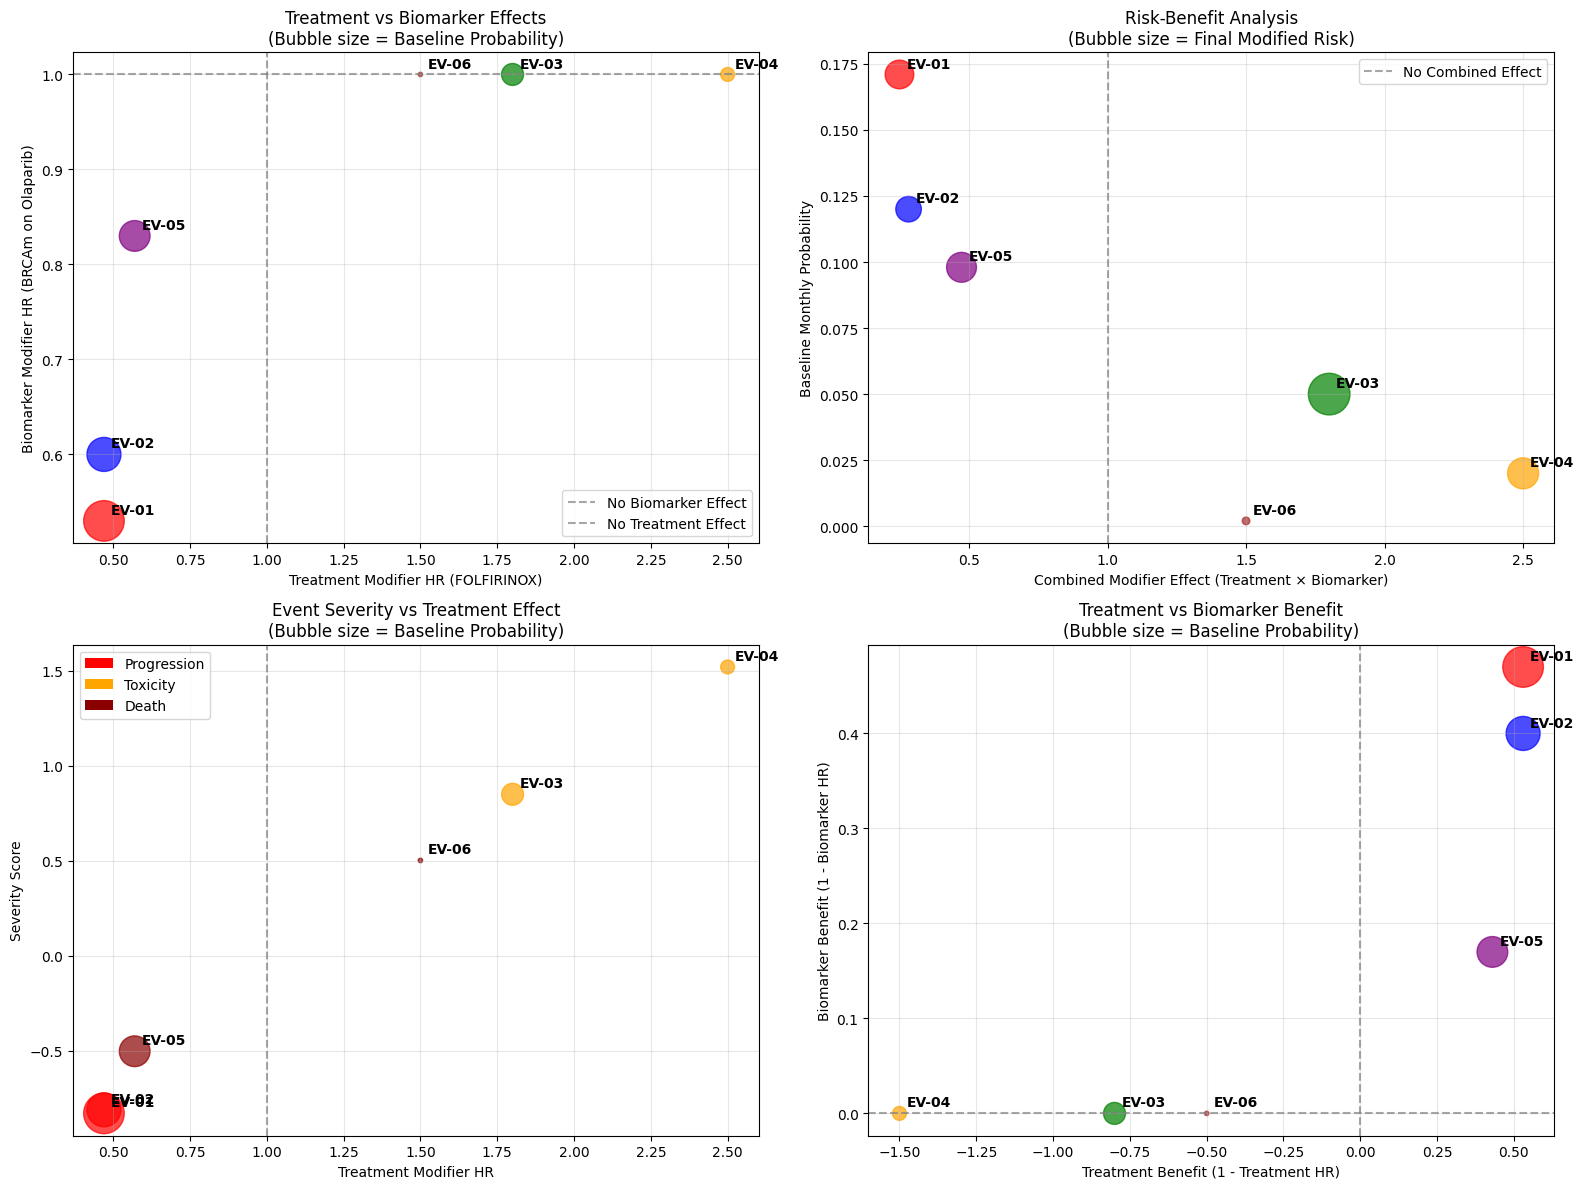

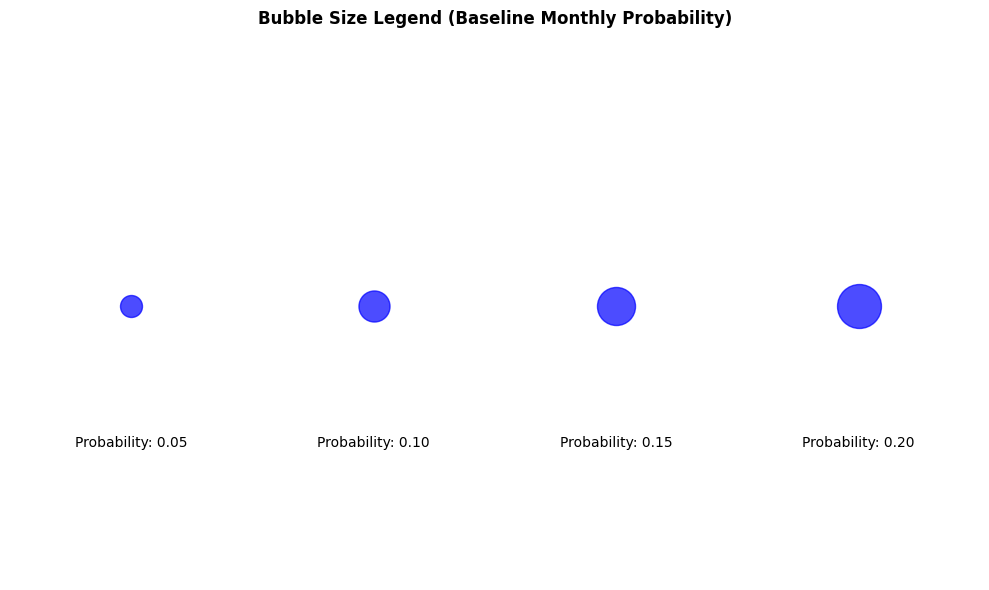

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create the dataset
data = {
    'Event_ID': ['EV-01', 'EV-02', 'EV-03', 'EV-04', 'EV-05', 'EV-06'],
    'Event_Description': ['Radiographic_Progression', 'Symptomatic_Progression', 'Grade_3_AE_Occurs',
                         'Grade_4_AE_Occurs', 'Death_from_Progression', 'Death_from_Toxicity'],
    'Baseline_Monthly_Probability': [0.171, 0.120, 0.050, 0.020, 0.098, 0.002],
    'Treatment_Modifier_HR': [0.47, 0.47, 1.80, 2.50, 0.57, 1.50],
    'Biomarker_Modifier_HR': [0.53, 0.60, 1.0, 1.0, 0.83, 1.0]
}

df = pd.DataFrame(data)

# Create bubble charts
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Bubble Chart 1: Treatment HR vs Biomarker HR, size = Baseline Probability
bubble_sizes = df['Baseline_Monthly_Probability'] * 5000  # Scale for visibility
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']

scatter1 = ax1.scatter(df['Treatment_Modifier_HR'], df['Biomarker_Modifier_HR'],
                      s=bubble_sizes, alpha=0.7, c=colors)

for i, txt in enumerate(df['Event_ID']):
    ax1.annotate(txt, (df['Treatment_Modifier_HR'][i], df['Biomarker_Modifier_HR'][i]),
                xytext=(5, 5), textcoords='offset points', fontweight='bold')

ax1.axhline(y=1, color='gray', linestyle='--', alpha=0.7, label='No Biomarker Effect')
ax1.axvline(x=1, color='gray', linestyle='--', alpha=0.7, label='No Treatment Effect')
ax1.set_xlabel('Treatment Modifier HR (FOLFIRINOX)')
ax1.set_ylabel('Biomarker Modifier HR (BRCAm on Olaparib)')
ax1.set_title('Treatment vs Biomarker Effects\n(Bubble size = Baseline Probability)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Bubble Chart 2: Risk-Benefit Analysis
# X-axis: Combined modifier effect, Y-axis: Baseline risk, Size: Final modified risk
combined_modifier = df['Treatment_Modifier_HR'] * df['Biomarker_Modifier_HR']
final_risk = df['Baseline_Monthly_Probability'] * combined_modifier
bubble_sizes2 = final_risk * 10000

scatter2 = ax2.scatter(combined_modifier, df['Baseline_Monthly_Probability'],
                      s=bubble_sizes2, alpha=0.7, c=colors)

for i, txt in enumerate(df['Event_ID']):
    ax2.annotate(txt, (combined_modifier[i], df['Baseline_Monthly_Probability'][i]),
                xytext=(5, 5), textcoords='offset points', fontweight='bold')

ax2.axvline(x=1, color='gray', linestyle='--', alpha=0.7, label='No Combined Effect')
ax2.set_xlabel('Combined Modifier Effect (Treatment × Biomarker)')
ax2.set_ylabel('Baseline Monthly Probability')
ax2.set_title('Risk-Benefit Analysis\n(Bubble size = Final Modified Risk)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Bubble Chart 3: Event Severity Analysis
# Categorize events by type
event_types = ['Progression', 'Progression', 'Toxicity', 'Toxicity', 'Death', 'Death']
df['Event_Type'] = event_types

# Create severity score (higher baseline prob + higher modifier effects = more concerning)
severity_score = df['Baseline_Monthly_Probability'] + (df['Treatment_Modifier_HR'] - 1) + (df['Biomarker_Modifier_HR'] - 1)

type_colors = {'Progression': 'red', 'Toxicity': 'orange', 'Death': 'darkred'}
scatter_colors = [type_colors[t] for t in event_types]

scatter3 = ax3.scatter(df['Treatment_Modifier_HR'], severity_score,
                      s=bubble_sizes, alpha=0.7, c=scatter_colors)

for i, txt in enumerate(df['Event_ID']):
    ax3.annotate(txt, (df['Treatment_Modifier_HR'][i], severity_score[i]),
                xytext=(5, 5), textcoords='offset points', fontweight='bold')

# Create legend for event types
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=event_type)
                  for event_type, color in type_colors.items()]
ax3.legend(handles=legend_elements)

ax3.axvline(x=1, color='gray', linestyle='--', alpha=0.7)
ax3.set_xlabel('Treatment Modifier HR')
ax3.set_ylabel('Severity Score')
ax3.set_title('Event Severity vs Treatment Effect\n(Bubble size = Baseline Probability)')
ax3.grid(True, alpha=0.3)

# Bubble Chart 4: Treatment Benefit Analysis
# Focus on events where treatment is beneficial (HR < 1)
treatment_benefit = 1 - df['Treatment_Modifier_HR']  # Higher values = more benefit
biomarker_benefit = 1 - df['Biomarker_Modifier_HR']

scatter4 = ax4.scatter(treatment_benefit, biomarker_benefit,
                      s=bubble_sizes, alpha=0.7, c=colors)

for i, txt in enumerate(df['Event_ID']):
    ax4.annotate(txt, (treatment_benefit[i], biomarker_benefit[i]),
                xytext=(5, 5), textcoords='offset points', fontweight='bold')

ax4.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
ax4.axvline(x=0, color='gray', linestyle='--', alpha=0.7)
ax4.set_xlabel('Treatment Benefit (1 - Treatment HR)')
ax4.set_ylabel('Biomarker Benefit (1 - Biomarker HR)')
ax4.set_title('Treatment vs Biomarker Benefit\n(Bubble size = Baseline Probability)')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Add size legend
fig2, ax = plt.subplots(figsize=(10, 6))
sizes = [0.05, 0.10, 0.15, 0.20]
size_labels = ['0.05', '0.10', '0.15', '0.20']
bubble_legend_sizes = [s * 5000 for s in sizes]

for i, (size, label) in enumerate(zip(bubble_legend_sizes, size_labels)):
    ax.scatter(i, 0, s=size, alpha=0.7, c='blue')
    ax.text(i, -0.5, f'Probability: {label}', ha='center', va='center')

ax.set_xlim(-0.5, len(sizes)-0.5)
ax.set_ylim(-1, 1)
ax.set_title('Bubble Size Legend (Baseline Monthly Probability)', fontweight='bold')
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

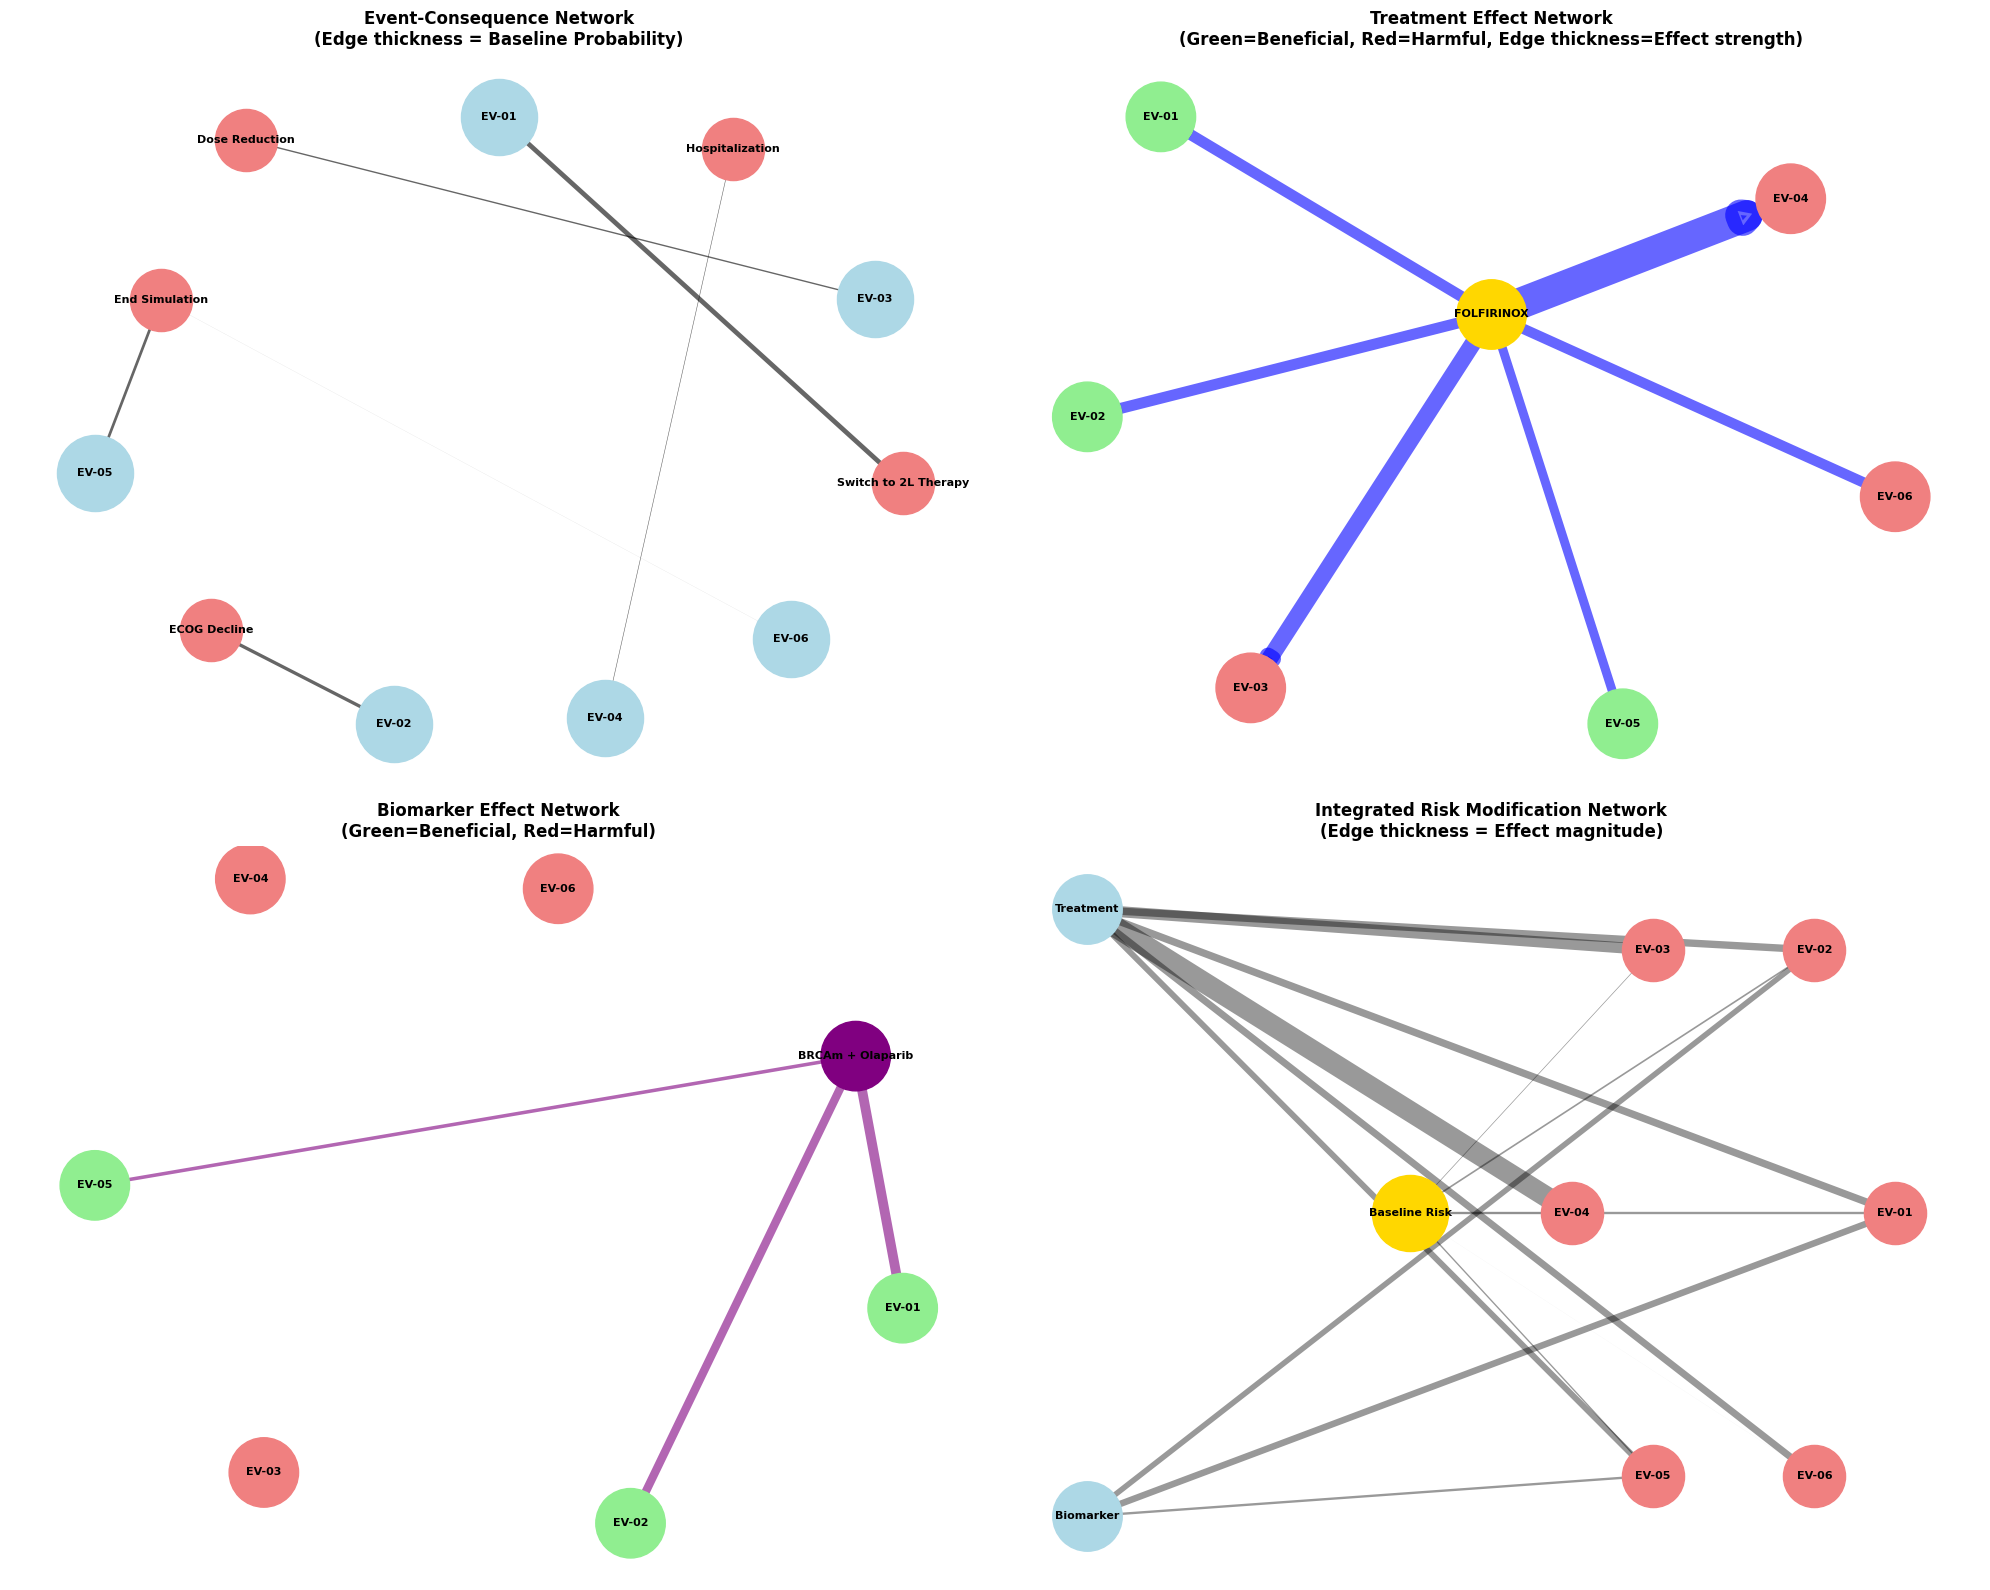

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Create the dataset
data = {
    'Event_ID': ['EV-01', 'EV-02', 'EV-03', 'EV-04', 'EV-05', 'EV-06'],
    'Event_Description': ['Radiographic_Progression', 'Symptomatic_Progression', 'Grade_3_AE_Occurs',
                         'Grade_4_AE_Occurs', 'Death_from_Progression', 'Death_from_Toxicity'],
    'Baseline_Monthly_Probability': [0.171, 0.120, 0.050, 0.020, 0.098, 0.002],
    'Treatment_Modifier_HR': [0.47, 0.47, 1.80, 2.50, 0.57, 1.50],
    'Biomarker_Modifier_HR': [0.53, 0.60, 1.0, 1.0, 0.83, 1.0],
    'Consequence': ['Switch to 2L Therapy', 'ECOG Decline', 'Dose Reduction',
                   'Hospitalization', 'End Simulation', 'End Simulation']
}

df = pd.DataFrame(data)

# Create network diagram
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# Network 1: Event-Consequence Network
G1 = nx.Graph()

# Add nodes
events = df['Event_ID'].tolist()
consequences = df['Consequence'].unique().tolist()

# Add event nodes
for event in events:
    G1.add_node(event, node_type='event')

# Add consequence nodes
for consequence in consequences:
    G1.add_node(consequence, node_type='consequence')

# Add edges with weights based on baseline probability
for _, row in df.iterrows():
    G1.add_edge(row['Event_ID'], row['Consequence'],
                weight=row['Baseline_Monthly_Probability'])

# Layout and draw
pos1 = nx.spring_layout(G1, k=3, iterations=50)

# Draw nodes
event_nodes = [n for n, d in G1.nodes(data=True) if d['node_type'] == 'event']
consequence_nodes = [n for n, d in G1.nodes(data=True) if d['node_type'] == 'consequence']

nx.draw_networkx_nodes(G1, pos1, nodelist=event_nodes, node_color='lightblue',
                      node_size=3000, ax=ax1)
nx.draw_networkx_nodes(G1, pos1, nodelist=consequence_nodes, node_color='lightcoral',
                      node_size=2000, ax=ax1)

# Draw edges with thickness based on probability
edges = G1.edges()
weights = [G1[u][v]['weight'] * 20 for u, v in edges]
nx.draw_networkx_edges(G1, pos1, width=weights, alpha=0.6, ax=ax1)

# Draw labels
nx.draw_networkx_labels(G1, pos1, font_size=8, font_weight='bold', ax=ax1)

ax1.set_title('Event-Consequence Network\n(Edge thickness = Baseline Probability)',
             fontweight='bold')
ax1.axis('off')

# Network 2: Treatment Effect Network
G2 = nx.DiGraph()

# Add treatment node
G2.add_node('FOLFIRINOX', node_type='treatment')

# Add event nodes with treatment effects
for _, row in df.iterrows():
    G2.add_node(row['Event_ID'], node_type='event')
    # Edge weight represents the treatment effect (inverse of HR for beneficial effects)
    effect_strength = abs(1 - row['Treatment_Modifier_HR'])
    G2.add_edge('FOLFIRINOX', row['Event_ID'], weight=effect_strength)

pos2 = nx.spring_layout(G2, k=2, iterations=50)

# Color nodes based on treatment benefit/harm
node_colors = []
for node in G2.nodes():
    if node == 'FOLFIRINOX':
        node_colors.append('gold')
    else:
        # Find the HR for this event
        hr = df[df['Event_ID'] == node]['Treatment_Modifier_HR'].iloc[0]
        if hr < 1:
            node_colors.append('lightgreen')  # Beneficial
        else:
            node_colors.append('lightcoral')  # Harmful

nx.draw_networkx_nodes(G2, pos2, node_color=node_colors, node_size=2500, ax=ax2)

# Draw edges with thickness based on effect strength
edges = G2.edges()
weights = [G2[u][v]['weight'] * 15 for u, v in edges]
nx.draw_networkx_edges(G2, pos2, width=weights, alpha=0.6, edge_color='blue', ax=ax2)

nx.draw_networkx_labels(G2, pos2, font_size=8, font_weight='bold', ax=ax2)

ax2.set_title('Treatment Effect Network\n(Green=Beneficial, Red=Harmful, Edge thickness=Effect strength)',
             fontweight='bold')
ax2.axis('off')

# Network 3: Biomarker Effect Network
G3 = nx.DiGraph()

G3.add_node('BRCAm + Olaparib', node_type='biomarker')

for _, row in df.iterrows():
    G3.add_node(row['Event_ID'], node_type='event')
    effect_strength = abs(1 - row['Biomarker_Modifier_HR'])
    if effect_strength > 0:  # Only add edges where there's an effect
        G3.add_edge('BRCAm + Olaparib', row['Event_ID'], weight=effect_strength)

pos3 = nx.spring_layout(G3, k=2, iterations=50)

# Color nodes based on biomarker benefit/harm
node_colors = []
for node in G3.nodes():
    if node == 'BRCAm + Olaparib':
        node_colors.append('purple')
    else:
        hr = df[df['Event_ID'] == node]['Biomarker_Modifier_HR'].iloc[0]
        if hr < 1:
            node_colors.append('lightgreen')
        else:
            node_colors.append('lightcoral')

nx.draw_networkx_nodes(G3, pos3, node_color=node_colors, node_size=2500, ax=ax3)

edges = G3.edges()
if edges:
    weights = [G3[u][v]['weight'] * 15 for u, v in edges]
    nx.draw_networkx_edges(G3, pos3, width=weights, alpha=0.6, edge_color='purple', ax=ax3)

nx.draw_networkx_labels(G3, pos3, font_size=8, font_weight='bold', ax=ax3)

ax3.set_title('Biomarker Effect Network\n(Green=Beneficial, Red=Harmful)',
             fontweight='bold')
ax3.axis('off')

# Network 4: Integrated Risk Network
G4 = nx.Graph()

# Add all nodes
G4.add_node('Baseline Risk', node_type='baseline')
G4.add_node('Treatment', node_type='modifier')
G4.add_node('Biomarker', node_type='modifier')

for _, row in df.iterrows():
    G4.add_node(row['Event_ID'], node_type='event')

# Add edges
for _, row in df.iterrows():
    # Connect baseline to events
    G4.add_edge('Baseline Risk', row['Event_ID'],
                weight=row['Baseline_Monthly_Probability'])
    # Connect modifiers to events
    G4.add_edge('Treatment', row['Event_ID'],
                weight=abs(1 - row['Treatment_Modifier_HR']))
    G4.add_edge('Biomarker', row['Event_ID'],
                weight=abs(1 - row['Biomarker_Modifier_HR']))

# Custom layout
pos4 = {}
pos4['Baseline Risk'] = (0, 0)
pos4['Treatment'] = (-2, 1)
pos4['Biomarker'] = (-2, -1)

# Position events in a circle
n_events = len(events)
for i, event in enumerate(events):
    angle = 2 * np.pi * i / n_events
    pos4[event] = (2 + np.cos(angle), np.sin(angle))

# Draw with different colors for different node types
baseline_nodes = [n for n, d in G4.nodes(data=True) if d['node_type'] == 'baseline']
modifier_nodes = [n for n, d in G4.nodes(data=True) if d['node_type'] == 'modifier']
event_nodes = [n for n, d in G4.nodes(data=True) if d['node_type'] == 'event']

nx.draw_networkx_nodes(G4, pos4, nodelist=baseline_nodes, node_color='gold',
                      node_size=3000, ax=ax4)
nx.draw_networkx_nodes(G4, pos4, nodelist=modifier_nodes, node_color='lightblue',
                      node_size=2500, ax=ax4)
nx.draw_networkx_nodes(G4, pos4, nodelist=event_nodes, node_color='lightcoral',
                      node_size=2000, ax=ax4)

# Draw edges with varying thickness
edges = G4.edges()
weights = [G4[u][v]['weight'] * 10 for u, v in edges]
nx.draw_networkx_edges(G4, pos4, width=weights, alpha=0.4, ax=ax4)

nx.draw_networkx_labels(G4, pos4, font_size=8, font_weight='bold', ax=ax4)

ax4.set_title('Integrated Risk Modification Network\n(Edge thickness = Effect magnitude)',
             fontweight='bold')
ax4.axis('off')

plt.tight_layout()
plt.show()

AttributeError: Rectangle.set() got an unexpected keyword argument 'labels'

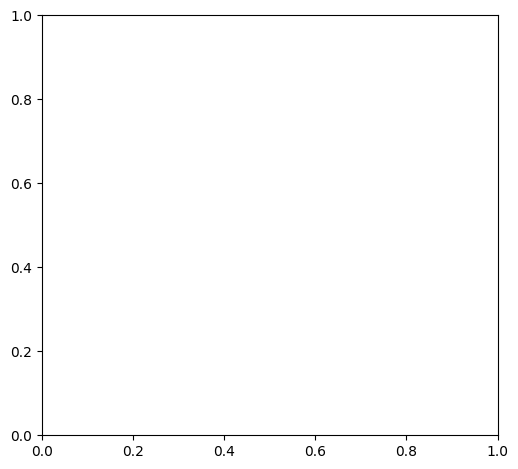

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import numpy as np

# Create the dataset
data = {
    'Event_ID': ['EV-01', 'EV-02', 'EV-03', 'EV-04', 'EV-05', 'EV-06'],
    'Event_Description': ['Radiographic_Progression', 'Symptomatic_Progression', 'Grade_3_AE_Occurs',
                         'Grade_4_AE_Occurs', 'Death_from_Progression', 'Death_from_Toxicity'],
    'Baseline_Monthly_Probability': [0.171, 0.120, 0.050, 0.020, 0.098, 0.002],
    'Treatment_Modifier_HR': [0.47, 0.47, 1.80, 2.50, 0.57, 1.50],
    'Biomarker_Modifier_HR': [0.53, 0.60, 1.0, 1.0, 0.83, 1.0]
}

df = pd.DataFrame(data)

# Create tree maps
fig = plt.figure(figsize=(20, 12))

# Tree Map 1: Baseline Risk Distribution
ax1 = plt.subplot(2, 3, 1)
sizes = df['Baseline_Monthly_Probability']
labels = [f"{row['Event_ID']}\n{row['Baseline_Monthly_Probability']:.3f}"
          for _, row in df.iterrows()]

# Color map based on risk level
colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(sizes)))

squarify.plot(sizes=sizes, labels=labels, alpha=0.8, color=colors, ax=ax1)
ax1.set_title('Tree Map: Baseline Monthly Probabilities', fontweight='bold')
ax1.axis('off')

# Tree Map 2: Treatment Effects
ax2 = plt.subplot(2, 3, 2)
# Use absolute difference from 1 to show effect magnitude
treatment_effects = abs(df['Treatment_Modifier_HR'] - 1)
labels_treat = [f"{row['Event_ID']}\nHR: {row['Treatment_Modifier_HR']:.2f}"
                for _, row in df.iterrows()]

# Color based on beneficial (green) vs harmful (red) effects
colors_treat = ['green' if hr < 1 else 'red' for hr in df['Treatment_Modifier_HR']]
colors_treat = [plt.cm.RdYlGn_r(0.2) if c == 'red' else plt.cm.RdYlGn(0.8) for c in colors_treat]

squarify.plot(sizes=treatment_effects, labels=labels_treat, alpha=0.8, color=colors_treat, ax=ax2)
ax2.set_title('Tree Map: Treatment Effects (FOLFIRINOX)\nSize = Effect Magnitude', fontweight='bold')
ax2.axis('off')

# Tree Map 3: Biomarker Effects
ax3 = plt.subplot(2, 3, 3)
biomarker_effects = abs(df['Biomarker_Modifier_HR'] - 1)
# Only include events with biomarker effects > 0
biomarker_effects_filtered = biomarker_effects[biomarker_effects > 0]
if len(biomarker_effects_filtered) > 0:
    df_biomarker = df[biomarker_effects > 0]
    labels_bio = [f"{row['Event_ID']}\nHR: {row['Biomarker_Modifier_HR']:.2f}"
                  for _, row in df_biomarker.iterrows()]
    colors_bio = ['green' if hr < 1 else 'red' for hr in df_biomarker['Biomarker_Modifier_HR']]
    colors_bio = [plt.cm.RdYlGn_r(0.2) if c == 'red' else plt.cm.RdYlGn(0.8) for c in colors_bio]

    squarify.plot(sizes=biomarker_effects_filtered, labels=labels_bio, alpha=0.8, color=colors_bio, ax=ax3)
else:
    ax3.text(0.5, 0.5, 'No Significant\nBiomarker Effects', ha='center', va='center', transform=ax3.transAxes)

ax3.set_title('Tree Map: Biomarker Effects (BRCAm on Olaparib)\nSize = Effect Magnitude', fontweight='bold')
ax3.axis('off')

# Tree Map 4: Modified Risk (Baseline × Treatment × Biomarker)
ax4 = plt.subplot(2, 3, 4)
modified_risk = df['Baseline_Monthly_Probability'] * df['Treatment_Modifier_HR'] * df['Biomarker_Modifier_HR']
labels_mod = [f"{row['Event_ID']}\n{modified_risk.iloc[i]:.4f}"
              for i, (_, row) in enumerate(df.iterrows())]

colors_mod = plt.cm.Blues(np.linspace(0.3, 0.9, len(modified_risk)))

squarify.plot(sizes=modified_risk, labels=labels_mod, alpha=0.8, color=colors_mod, ax=ax4)
ax4.set_title('Tree Map: Modified Risk\n(Baseline × Treatment × Biomarker)', fontweight='bold')
ax4.axis('off')

# Tree Map 5: Risk Categories
ax5 = plt.subplot(2, 3, 5)
# Categorize events
categories = {
    'Progression Events': ['EV-01', 'EV-02'],
    'Toxicity Events': ['EV-03', 'EV-04'],
    'Death Events': ['EV-05', 'EV-06']
}

category_risks = []
category_labels = []
category_colors = ['lightcoral', 'orange', 'darkred']

for i, (category, event_ids) in enumerate(categories.items()):
    total_risk = df[df['Event_ID'].isin(event_ids)]['Baseline_Monthly_Probability'].sum()
    category_risks.append(total_risk)
    category_labels.append(f"{category}\n{total_risk:.3f}")

squarify.plot(sizes=category_risks, labels=category_labels, alpha=0.8, color=category_colors, ax=ax5)
ax5.set_title('Tree Map: Risk by Event Category', fontweight='bold')
ax5.axis('off')

# Tree Map 6: Treatment Benefit Analysis
ax6 = plt.subplot(2, 3, 6)
# Calculate risk reduction (positive values mean benefit)
risk_reduction = df['Baseline_Monthly_Probability'] * (1 - df['Treatment_Modifier_HR'])
# For events where treatment increases risk, show as negative benefit
risk_reduction = np.where(df['Treatment_Modifier_HR'] > 1,
                         -df['Baseline_Monthly_Probability'] * (df['Treatment_Modifier_HR'] - 1),
                         risk_reduction)

# Only show positive benefits for tree map
beneficial_events = risk_reduction > 0
if beneficial_events.sum() > 0:
    beneficial_risk_reduction = risk_reduction[beneficial_events]
    beneficial_df = df[beneficial_events]
    labels_benefit = [f"{row['Event_ID']}\nBenefit: {risk_reduction[i]:.4f}"
                     for i, (_, row) in enumerate(beneficial_df.iterrows())]

    colors_benefit = plt.cm.Greens(np.linspace(0.4, 0.9, len(beneficial_risk_reduction)))

    squarify.plot(sizes=beneficial_risk_reduction, labels=labels_benefit, alpha=0.8,
                 color=colors_benefit, ax=ax6)
    ax6.set_title('Tree Map: Treatment Benefits\n(Risk Reduction)', fontweight='bold')
else:
    ax6.text(0.5, 0.5, 'No Clear\nTreatment Benefits', ha='center', va='center', transform=ax6.transAxes)
    ax6.set_title('Tree Map: Treatment Benefits', fontweight='bold')

ax6.axis('off')

plt.tight_layout()
plt.show()

# Additional hierarchical tree map
fig, ax = plt.subplots(figsize=(16, 10))

# Create hierarchical data structure
# Level 1: Event categories
# Level 2: Individual events within categories

hierarchical_data = []
hierarchical_labels = []
hierarchical_colors = []

base_colors = {'Progression': 'Reds', 'Toxicity': 'Oranges', 'Death': 'Purples'}

for category, color_map in base_colors.items():
    if category == 'Progression':
        events = ['EV-01', 'EV-02']
    elif category == 'Toxicity':
        events = ['EV-03', 'EV-04']
    else:  # Death
        events = ['EV-05', 'EV-06']

    category_events = df[df['Event_ID'].isin(events)]

    for _, row in category_events.iterrows():
        hierarchical_data.append(row['Baseline_Monthly_Probability'])
        hierarchical_labels.append(f"{category}\n{row['Event_ID']}\n{row['Baseline_Monthly_Probability']:.3f}")

        # Get color from colormap
        cmap = plt.cm.get_cmap(color_map)
        hierarchical_colors.append(cmap(0.6))

squarify.plot(sizes=hierarchical_data, labels=hierarchical_labels, alpha=0.8,
             color=hierarchical_colors, ax=ax)
ax.set_title('Hierarchical Tree Map: Events by Category and Risk Level', fontsize=16, fontweight='bold')
ax.axis('off')

plt.tight_layout()
plt.show()

# Grok 3 Fix 12Jun25
The error occurs because squarify.plot doesn't support a labels parameter directly in the way it's being used, and Matplotlib's Rectangle objects don't accept a labels keyword argument. To fix this, you need to handle the labeling manually by adding text annotations after plotting the tree map. Here's the corrected code for the first tree map (Baseline Risk Distribution) as an example, and you can apply similar changes to the others:

Key Changes:
Manual Labeling: Instead of passing labels to squarify.plot, the function returns a list of rectangle objects. You can iterate over these rectangles and use ax1.text to place labels at the center of each rectangle.
Text Positioning: The x + dx/2 and y + dy/2 calculate the center of each rectangle for label placement.
Font Size and Wrapping: Added fontsize=8 and wrap=True to ensure labels fit within the rectangles.
Applying to Other Tree Maps:
You can apply the same approach to the other tree maps (Treatment Effects, Biomarker Effects, etc.) by replacing the squarify.plot call with a similar structure. For example, for Tree Map 2 (Treatment Effects):

python

Collapse

Wrap

Run

Copy
# Tree Map 2: Treatment Effects
ax2 = plt.subplot(2, 3, 2)
treatment_effects = abs(df['Treatment_Modifier_HR'] - 1)
labels_treat = [f"{row['Event_ID']}\nHR: {row['Treatment_Modifier_HR']:.2f}"
                for _, row in df.iterrows()]

colors_treat = ['green' if hr < 1 else 'red' for hr in df['Treatment_Modifier_HR']]
colors_treat = [plt.cm.RdYlGn_r(0.2) if c == 'red' else plt.cm.RdYlGn(0.8) for c in colors_treat]

rects = squarify.plot(sizes=treatment_effects, alpha=0.8, color=colors_treat, ax=ax2)

for rect, label in zip(rects, labels_treat):
    x, y, dx, dy = rect['x'], rect['y'], rect['dx'], rect['dy']
    ax2.text(x + dx/2, y + dy/2, label, ha='center', va='center', fontsize=8, wrap=True)

ax2.set_title('Tree Map: Treatment Effects (FOLFIRINOX)\nSize = Effect Magnitude', fontweight='bold')
ax2.axis('off')
Notes:
Label Overlap: If labels are too large or rectangles are too small, you may need to adjust fontsize or use squarify.normalize_sizes to scale the sizes for better visualization.
Color Maps: Ensure your color maps (e.g., plt.cm.Reds) are compatible with your Matplotlib version. If you encounter issues, you can use explicit color lists.
Hierarchical Tree Map: The same fix applies to the hierarchical tree map at the end. Replace the squarify.plot call with manual labeling as shown above.
If you need the full corrected code for all tree maps or have specific issues with any section, let me know!

The error occurs because squarify.plot in the squarify library (version 0.4.4) does not return a list of rectangle objects like you might expect from some plotting libraries. Instead, it returns the Axes object itself, which is not iterable, causing the TypeError. To fix this, you need to compute the rectangle positions manually using squarify’s layout functions and then add labels accordingly.

Here’s the corrected code for the first tree map (Baseline Risk Distribution). The approach uses squarify.normalize_sizes and squarify.squarify to calculate the rectangle positions and then adds labels manually.

Key Changes:
Rectangle Positions: Use squarify.normalize_sizes(sizes, 100, 100) to scale the sizes to a 100x100 area (arbitrary units for the plot). Then, use squarify.squarify(normed_sizes, 0, 0, 100, 100) to compute the rectangle positions, which returns a list of dictionaries containing x, y, dx, and dy for each rectangle.
Manual Labeling: Iterate over the rects list (from squarify.squarify) and labels to add text at the center of each rectangle using ax1.text.
Plotting: Call squarify.plot to draw the tree map, but rely on the separately computed rects for labeling.
Applying to Other Tree Maps:
You can apply the same approach to the other tree maps. For example, for Tree Map 2 (Treatment Effects):

python

Collapse

Wrap

Run

Copy
# Tree Map 2: Treatment Effects
ax2 = plt.subplot(2, 3, 2)
treatment_effects = abs(df['Treatment_Modifier_HR'] - 1)
labels_treat = [f"{row['Event_ID']}\nHR: {row['Treatment_Modifier_HR']:.2f}"
                for _, row in df.iterrows()]

colors_treat = ['green' if hr < 1 else 'red' for hr in df['Treatment_Modifier_HR']]
colors_treat = [plt.cm.RdYlGn_r(0.2) if c == 'red' else plt.cm.RdYlGn(0.8) for c in colors_treat]

# Normalize sizes
normed_sizes = squarify.normalize_sizes(treatment_effects, 100, 100)
rects = squarify.squarify(normed_sizes, 0, 0, 100, 100)

# Plot the tree map
squarify.plot(sizes=treatment_effects, alpha=0.8, color=colors_treat, ax=ax2)

# Add labels manually
for rect, label in zip(rects, labels_treat):
    x, y, dx, dy = rect['x'], rect['y'], rect['dx'], rect['dy']
    ax2.text(x + dx/2, y + dy/2, label, ha='center', va='center', fontsize=8, wrap=True)

ax2.set_title('Tree Map: Treatment Effects (FOLFIRINOX)\nSize = Effect Magnitude', fontweight='bold')
ax2.axis('off')
Notes:
Small Rectangles: For very small values (e.g., EV-06 with 0.002), labels may be hard to read. You can adjust fontsize or add a minimum size threshold using normed_sizes = np.maximum(normed_sizes, min_size).
Color Maps: If you encounter issues with plt.cm.Reds, ensure your Matplotlib version supports it, or use explicit color lists (e.g., ['#ff9999', '#ff6666', ...]).
Hierarchical Tree Map: Apply the same fix to the hierarchical tree map by computing rectangle positions with squarify.squarify and adding labels manually.
Full Code:
If you want the complete corrected code for all tree maps, let me know, and I can provide it. Alternatively, you can replicate the above pattern for each tree map in your original code.

Alternative Visualization:
If the tree maps are still problematic (e.g., due to small rectangle sizes or label overlaps), consider using a bar chart or heatmap for clearer visualization. For example, I can provide a Chart.js bar chart to display the Baseline Monthly Probabilities:


Grok can make mistakes. Always check original sources.
Download
This chart displays the same data as the first tree map but may be easier to read. Let me know if you prefer this or need help with the remaining tree maps!

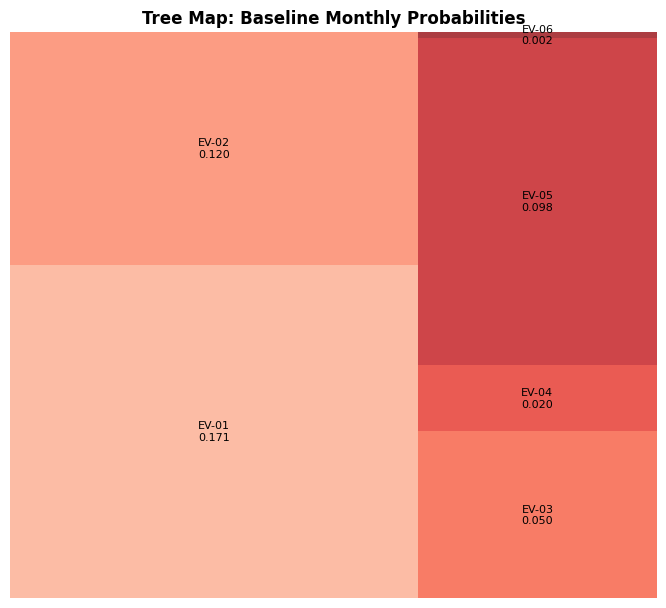

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import numpy as np

# Create the dataset
data = {
    'Event_ID': ['EV-01', 'EV-02', 'EV-03', 'EV-04', 'EV-05', 'EV-06'],
    'Event_Description': ['Radiographic_Progression', 'Symptomatic_Progression', 'Grade_3_AE_Occurs',
                         'Grade_4_AE_Occurs', 'Death_from_Progression', 'Death_from_Toxicity'],
    'Baseline_Monthly_Probability': [0.171, 0.120, 0.050, 0.020, 0.098, 0.002],
    'Treatment_Modifier_HR': [0.47, 0.47, 1.80, 2.50, 0.57, 1.50],
    'Biomarker_Modifier_HR': [0.53, 0.60, 1.0, 1.0, 0.83, 1.0]
}

df = pd.DataFrame(data)

# Create tree maps
fig = plt.figure(figsize=(20, 12))

# Tree Map 1: Baseline Risk Distribution
ax1 = plt.subplot(2, 3, 1)
sizes = df['Baseline_Monthly_Probability']
labels = [f"{row['Event_ID']}\n{row['Baseline_Monthly_Probability']:.3f}"
          for _, row in df.iterrows()]

# Color map based on risk level
colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(sizes)))

# Normalize sizes to fit the plot area
normed_sizes = squarify.normalize_sizes(sizes, 100, 100)

# Compute rectangle positions
rects = squarify.squarify(normed_sizes, 0, 0, 100, 100)

# Plot the tree map
squarify.plot(sizes=sizes, alpha=0.8, color=colors, ax=ax1)

# Add labels manually
for rect, label in zip(rects, labels):
    x, y, dx, dy = rect['x'], rect['y'], rect['dx'], rect['dy']
    ax1.text(x + dx/2, y + dy/2, label, ha='center', va='center', fontsize=8, wrap=True)

ax1.set_title('Tree Map: Baseline Monthly Probabilities', fontweight='bold')
ax1.axis('off')

plt.tight_layout()
plt.show()